<h1> Проект: Обучение с учителем: качество модели </h1>

<h1> Описание проекта: </h1>
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Библиотеки для работы с данными

## Описание данных 

**market_file.csv** - это таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

 - **id** — номер покупателя в корпоративной базе данных.
 - **<p style = 'color: green'>Покупательская активность**</p> — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень»
 - **Тип сервиса** — уровень сервиса, например «премиум» и «стандарт».
 - **Разрешить сообщать** — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
 - **Маркет_актив_6_мес** — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
 - **Маркет_актив_тек_мес** — количество маркетинговых коммуникаций в текущем месяце.
 - **Длительность** — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
 - **Акционные_покупки** — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
 - **Популярная_категория** — самая популярная категория товаров у покупателя за последние 6 месяцев.
 - **Средний_просмотр_категорий_за_визит** — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение 
последнего месяца.
 - **Неоплаченные_продукты_штук_квартал** — общее число неоплаченных товаров в корзине за последние 3 месяца.
 - **Ошибка_сервиса** — число сбоев, которые коснулись покупателя во время посещения сайта.
 - **Страниц_за_визит** — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.


**market_money.csv** - это таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

 - **id** — номер покупателя в корпоративной базе данных.
 - **Период** — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
 - **Выручка** — сумма выручки за период.

**market_time.csv** - это таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

 - **id** — номер покупателя в корпоративной базе данных.
 - **Период** — название периода, во время которого зафиксировано общее время.
 - **минут** — значение времени, проведённого на сайте, в минутах.


**money.csv** - таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

 - **id** — номер покупателя в корпоративной базе данных.
 - **Прибыль** — значение прибыли.

!pip install phik -q

In [1]:
!pip install SHAP -q

!pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Библиотеки для создания моделей
from sklearn.model_selection import train_test_split

#Скейлеры и кодировщики
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.impute import SimpleImputer

#Пайплайны
from sklearn.pipeline import (make_pipeline,
                              Pipeline
                             )
from sklearn.compose import ColumnTransformer

#Метрики
from sklearn.metrics import (
    roc_auc_score,
    f1_score
)
from sklearn.model_selection import RandomizedSearchCV

#Модели
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Библиотека для отбора признаков
import shap

pd.set_option('display.max_columns', None)
pd.set_option('future.no_silent_downcasting', True)


C:\Users\Yanmiki\PycharmProjects\PythonProject\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
try:
    df_market = pd.read_csv('market_file.csv')
    df_market_money = pd.read_csv('market_money.csv')
    df_market_time = pd.read_csv('market_time.csv')
    df_money = pd.read_csv('money.csv', sep = ';', decimal = ',')
except:
    df_market = pd.read_csv('csv_files/market_file.csv')
    df_market_money = pd.read_csv('csv_files/market_money.csv')
    df_market_time = pd.read_csv('csv_files/market_time.csv')
    df_money = pd.read_csv('csv_files/money.csv', sep = ';', decimal = ',')

In [4]:
df_dict = {
    'df_market': df_market,
    'df_market_money': df_market_money,
    'df_market_time': df_market_time,
    'df_money': df_money
}


In [5]:
for name, df in df_dict.items():
    print('-'*50, name, '-'*50)
    print(f'Таблица: {name}', '\n')
    df.info()
    display(df.describe())
    display(df.head())
    if len(list(df.select_dtypes(exclude = 'number').columns)) != 0:
        for column in list(df.select_dtypes(exclude = 'number').columns):
            print(f'Исследуемый столбец: {column}')
            print(df[column].value_counts(), '\n')
    else: 
        print(f'В данной таблице нет столбцов с значениями object: {name}')

-------------------------------------------------- df_market --------------------------------------------------
Таблица: df_market 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

Исследуемый столбец: Покупательская активность
Покупательская активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64 

Исследуемый столбец: Тип сервиса
Тип сервиса
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64 

Исследуемый столбец: Разрешить сообщать
Разрешить сообщать
да     962
нет    338
Name: count, dtype: int64 

Исследуемый столбец: Популярная_категория
Популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64 

-------------------------------------------------- df_market_money --------------------------------------------------
Таблица: df_market_money 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

Исследуемый столбец: Период
Период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
 ame: count, dtype: int64

-------------------------------------------------- df_market_time --------------------------------------------------
Таблица: df_market_time 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

Исследуемый столбец: Период
Период
текущий_месяц       1300
предыдцщий_месяц    1300
 ame: count, dtype: int64

-------------------------------------------------- df_money --------------------------------------------------
Таблица: df_money 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

В данной таблице нет столбцов с значениями object: df_money


**Вывод:**
В данных отсуствуют пропуски, в целом нет проблем, в некоторых местах есть проблемы с значением в категореальных переменных, например, в df_market_time['Период']: предыдцщий_месяц на предыдущий_месяц

## Предобработка данных

In [6]:
for name, df in df_dict.items():
    print(f'Количество дубликатов в {name.upper()}: {df.duplicated().sum()}', '\n')

Количество дубликатов в DF_MARKET: 0 

Количество дубликатов в DF_MARKET_MONEY: 0 

Количество дубликатов в DF_MARKET_TIME: 0 

Количество дубликатов в DF_MONEY: 0 



In [7]:
df_market['Тип сервиса'] = df_market['Тип сервиса'].str.replace('стандартт','стандарт')
df_market_time['Период'] = df_market_time['Период'].str.replace('предыдцщий_месяц','предыдущий_месяц')
df_market_money['Период'] = df_market_money['Период'].str.replace('препредыдущий_месяц','предпредыдущий_месяц')

In [8]:
display(df_market['Тип сервиса'].value_counts())
display(df_market_money['Период'].value_counts())
df_market_time['Период'].value_counts()

Тип сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

Период
предпредыдущий_месяц    1300
текущий_месяц           1300
предыдущий_месяц        1300
Name: count, dtype: int64

Период
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64

In [9]:
# P.S столкнулся с проблемой в df_dict, для последующих операций, поэтому в данном блоке я его перезапишу, чтобы данные были обновлены и для него
df_dict = {
    'df_market': df_market,
    'df_market_money': df_market_money,
    'df_market_time': df_market_time,
    'df_money': df_money
}

**Вывод:** 
- В таблице df_market исправил опечатки: 
    - [ Тип сервиса ]: стандартт на стандарт
- В таблице df_market_time исправил опечатки:
    - [ Период ]: предыдцщий_месяц на предыдущий_месяц
- В таблице df_market_money исправил опечатки:
    - [ Период ]: препредыдущий_месяц на предредыдущий_месяц

- В остальных таблицах проблем нет


## Исследовательский анализ данных

### Общий анализ

                                                   Название: df_market


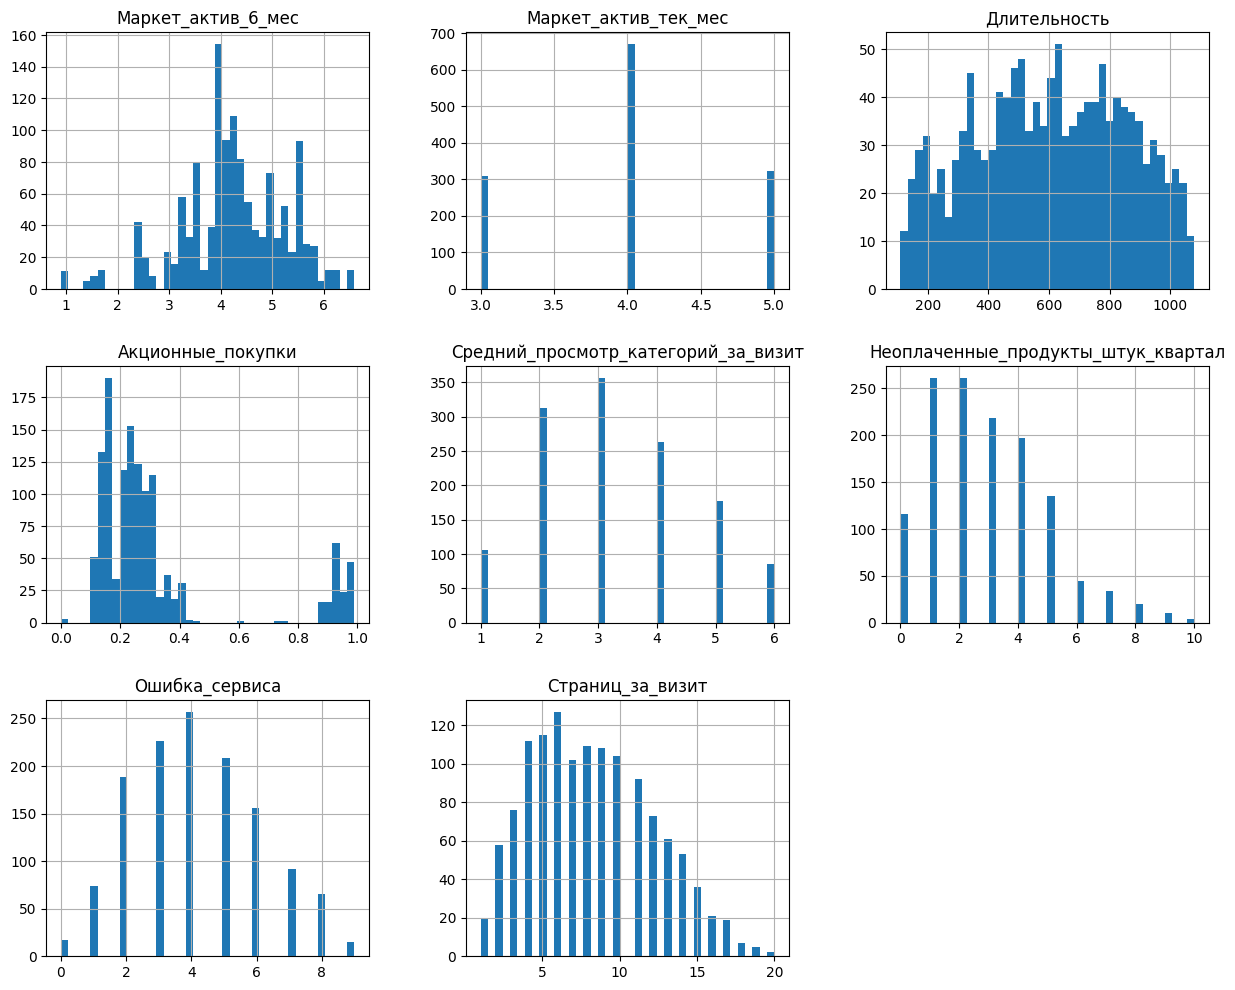

id  Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
count    1300.000000         1300.000000           1300.000000   1300.000000   
mean   215997.500000            4.253769              4.011538    601.898462   
std       375.421985            1.014814              0.696868    249.856289   
min    215348.000000            0.900000              3.000000    110.000000   
25%    215672.750000            3.700000              4.000000    405.500000   
50%    215997.500000            4.200000              4.000000    606.000000   
75%    216322.250000            4.900000              4.000000    806.000000   
max    216647.000000            6.600000              5.000000   1079.000000   

       Акционные_покупки  Средний_просмотр_категорий_за_визит  \
count        1300.000000                           1300.00000   
mean            0.319808                              3.27000   
std             0.249843                              1.35535   
min             0.000000                              1.00000   
25%             0.170000                              2.00000   
50%             0.240000                              3.00000   
75%             0.300000                              4.00000   
max             0.990000                              6.00000   

       Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
count                         1300.000000     1300.000000       1300.000000  
mean                             2.840000        4.185385          8.176923  
std                              1.971451        1.955298          3.978126  
min                              0.000000        0.000000          1.000000  
25%                              1.000000        3.000000          5.000000  
50%                              3.000000        4.000000          8.000000  
75%                              4.000000        6.000000         11.000000  
max                             10.000000        9.000000         20.000000

                                                   Название: df_market_money


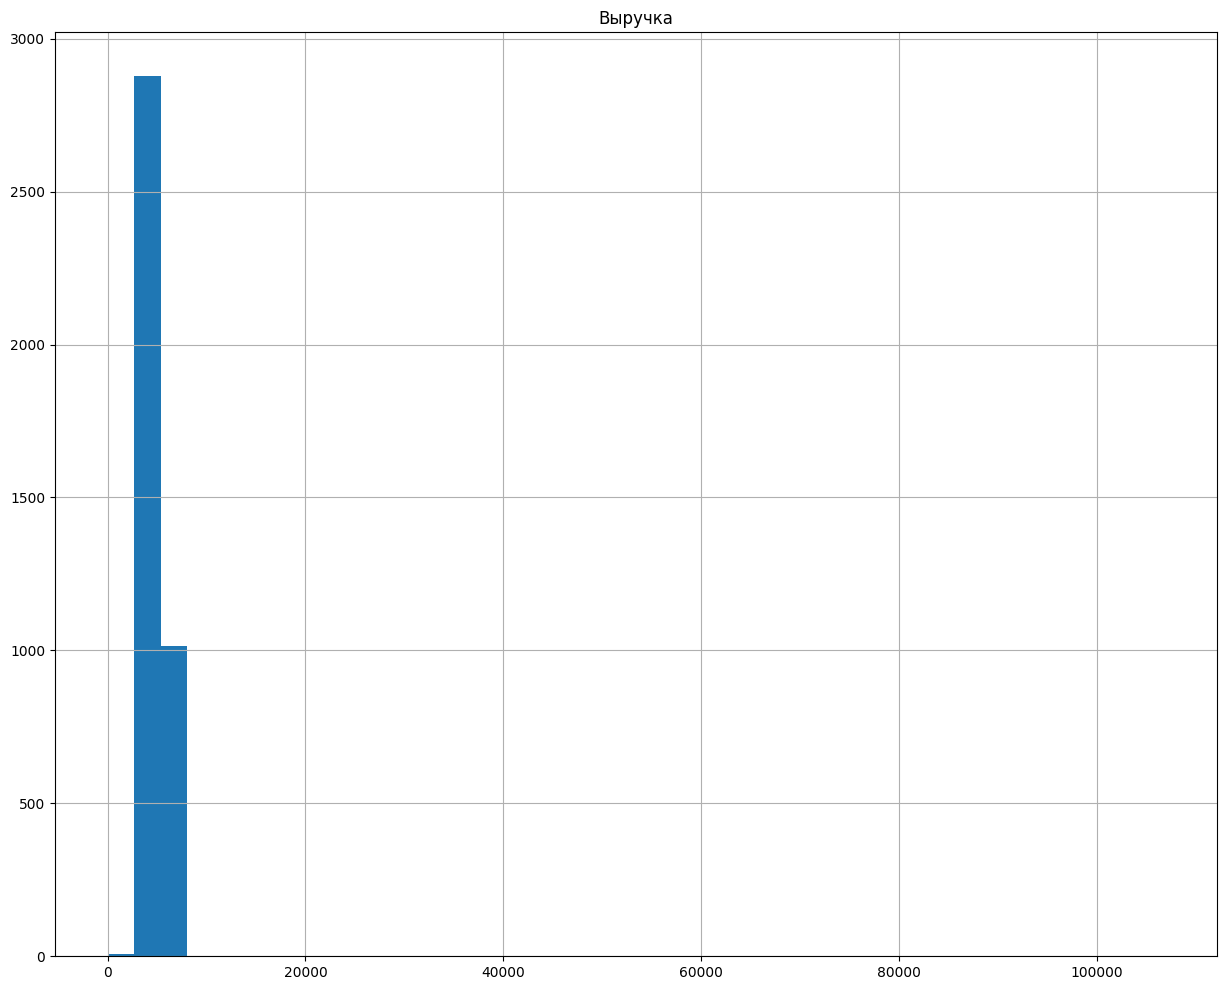

id        Выручка
count    3900.000000    3900.000000
mean   215997.500000    5025.696051
std       375.325686    1777.704104
min    215348.000000       0.000000
25%    215672.750000    4590.150000
50%    215997.500000    4957.500000
75%    216322.250000    5363.000000
max    216647.000000  106862.200000

                                                   Название: df_market_time


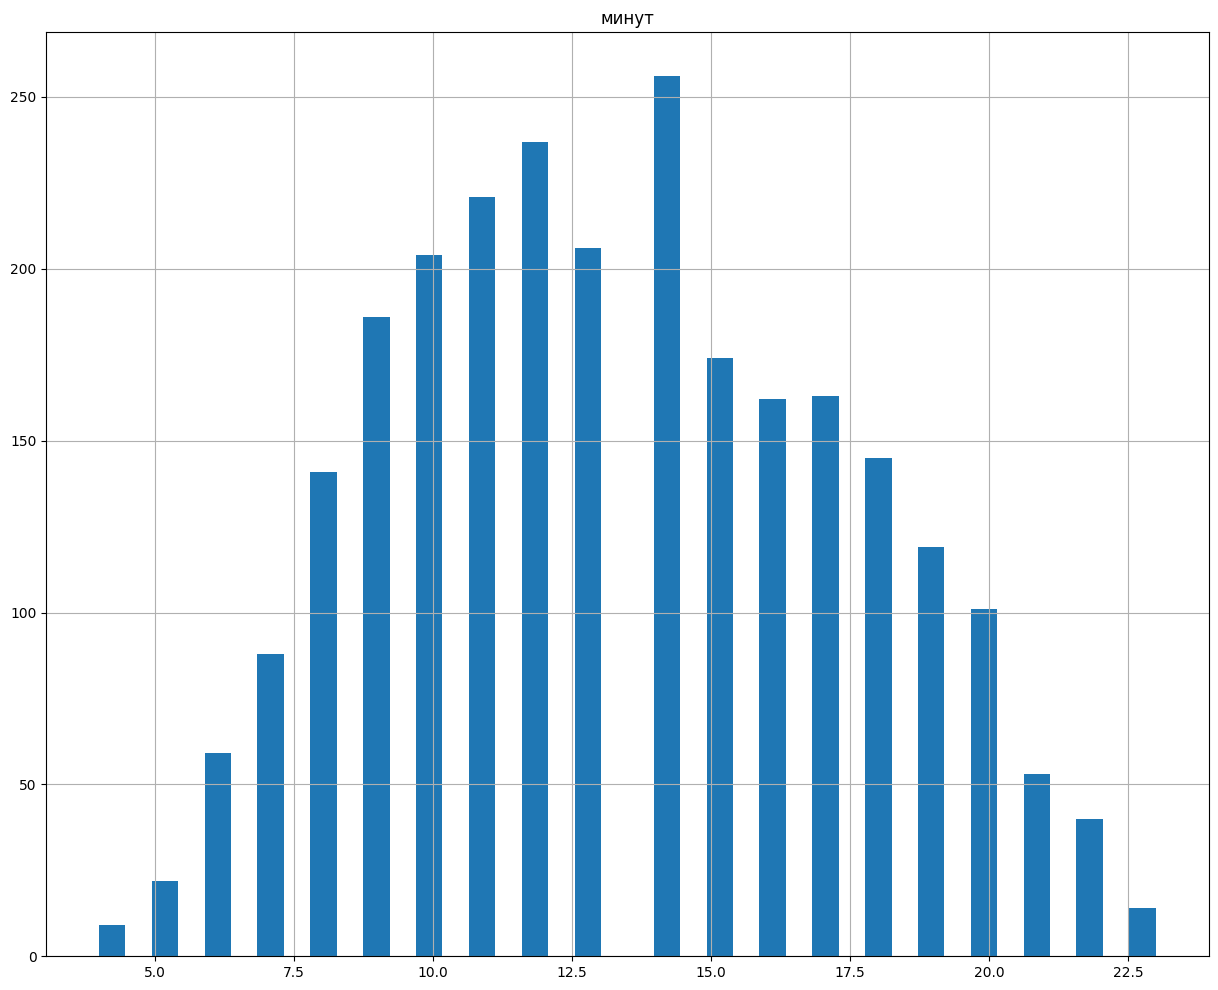

id        минут
count    2600.000000  2600.000000
mean   215997.500000    13.336154
std       375.349754     4.080198
min    215348.000000     4.000000
25%    215672.750000    10.000000
50%    215997.500000    13.000000
75%    216322.250000    16.000000
max    216647.000000    23.000000

                                                   Название: df_money


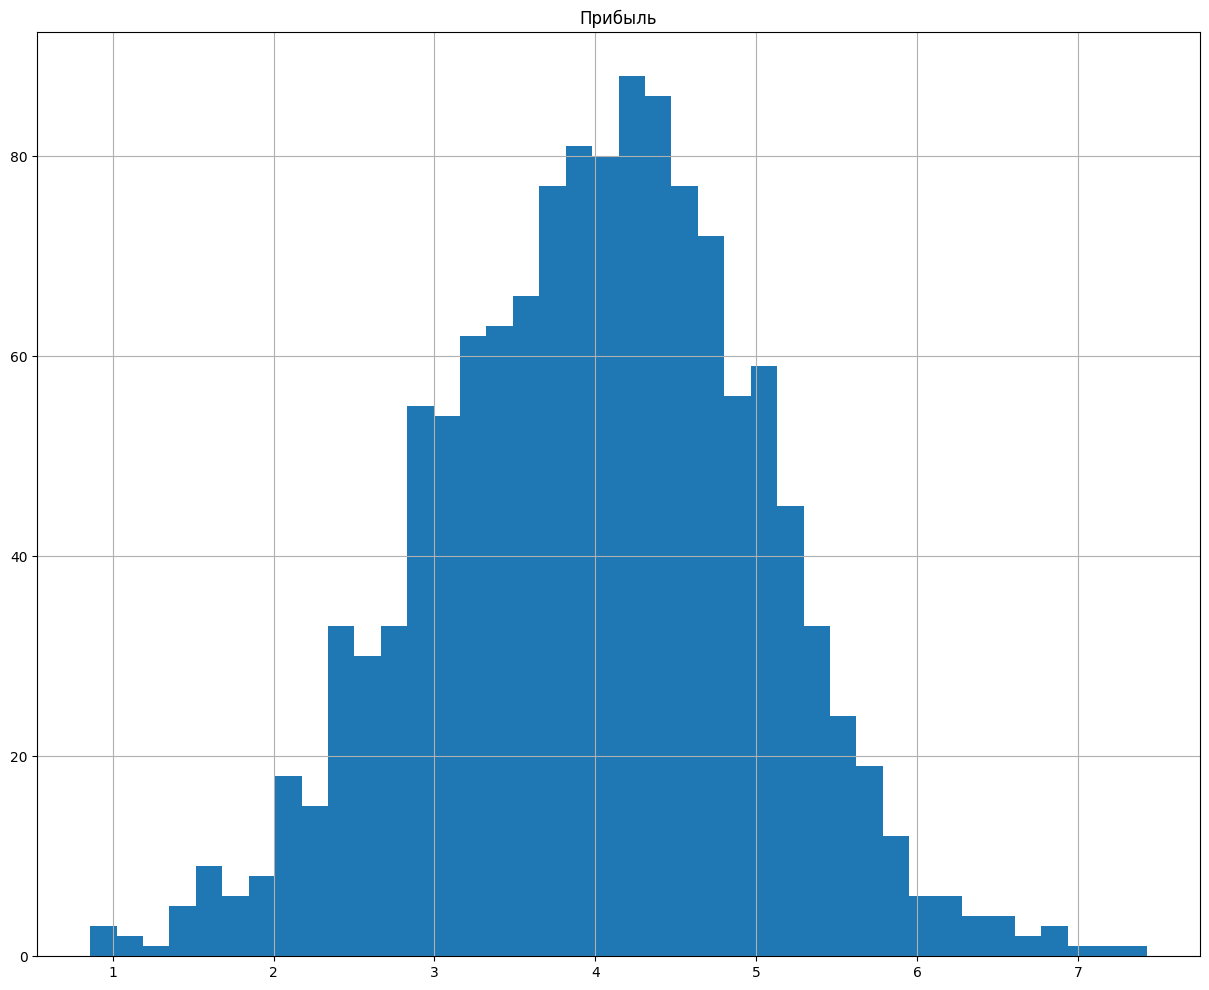

id      Прибыль
count    1300.000000  1300.000000
mean   215997.500000     3.996631
std       375.421985     1.013722
min    215348.000000     0.860000
25%    215672.750000     3.300000
50%    215997.500000     4.045000
75%    216322.250000     4.670000
max    216647.000000     7.430000

In [10]:
for name, df in df_dict.items():
    print(' '*50, f'Название: {name}')
    df.drop('id', axis = 1).hist(bins = 40, figsize = (15, 12));
    plt.show()
    display(df.describe())

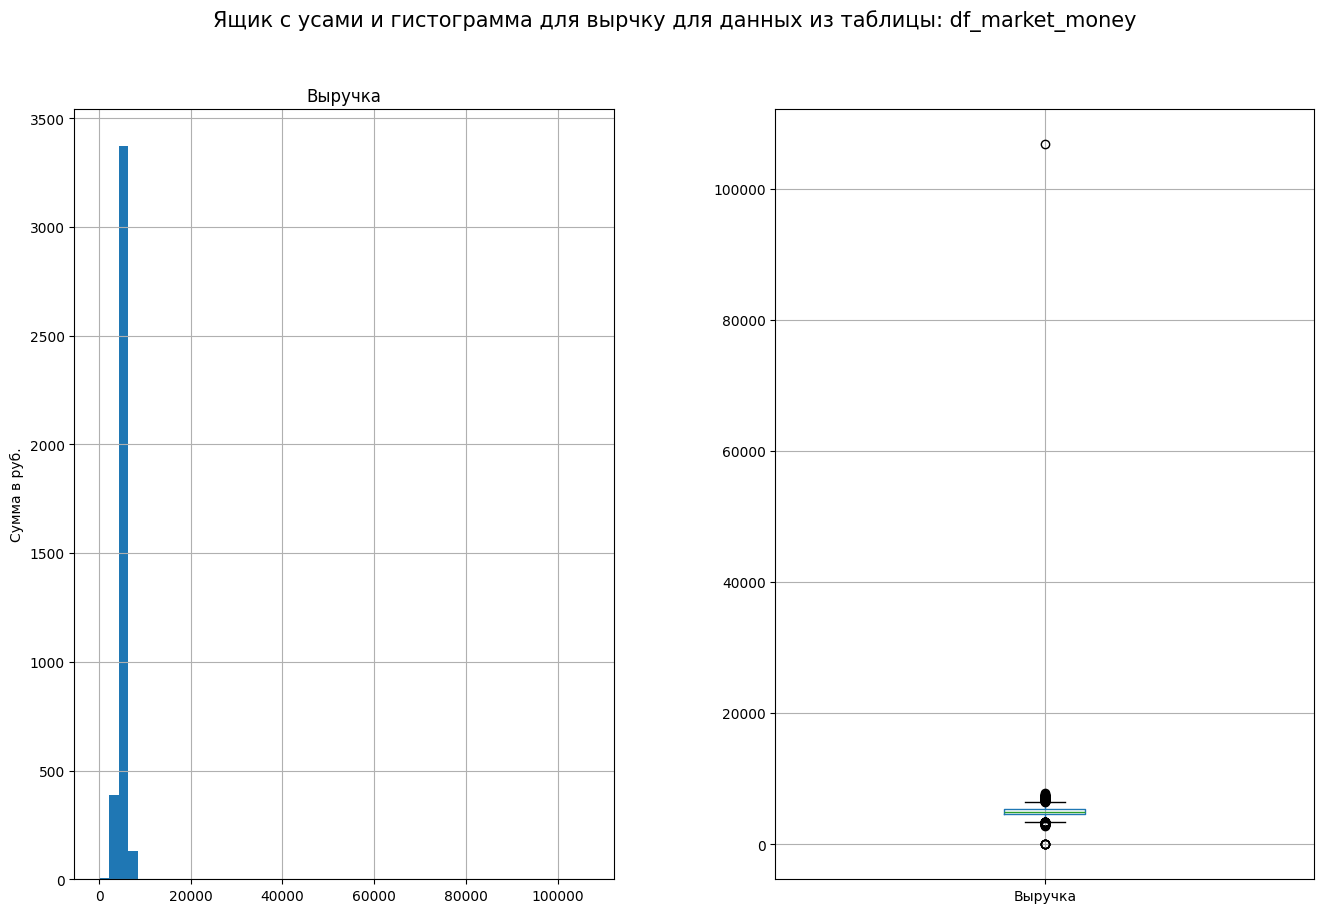

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))
df_market_money.hist('Выручка', bins = 50, ax = axes[0]);
df_market_money.boxplot('Выручка', ax = axes[1]);
axes[0].set_ylabel('Сумма в руб.');
plt.suptitle('Ящик с усами и гистограмма для вырчку для данных из таблицы: df_market_money', fontsize = 15);


Есть значение, которое сильно выбивается из общей выборки, скорее всего это аномалия, изучим её

In [12]:
id_list = list(df_market_money.query('(Выручка == 0) or (Выручка > 10**5)')['id'])
for name, df in df_dict.items():
    print('\n','-'*45, f'Название таблицы: {name}', '-'*45)
    display(df[df['id'].isin(id_list)])



 --------------------------------------------- Название таблицы: df_market ---------------------------------------------


id Покупательская активность Тип сервиса Разрешить сообщать  \
0   215348                 Снизилась     премиум                 да   
9   215357                 Снизилась    стандарт                 да   
11  215359                 Снизилась    стандарт                 да   
32  215380                 Снизилась     премиум                нет   

    Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                  3.4                     5           121               0.00   
9                  3.9                     5           154               0.00   
11                 4.6                     5           110               0.00   
32                 1.7                     4           637               0.94   

              Популярная_категория  Средний_просмотр_категорий_за_визит  \
0                 Товары для детей                                    6   
9   Техника для красоты и здоровья                                    3   
11               Домашний текстиль                                    4   
32  Техника для красоты и здоровья                                    3   

    Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                    2               1                 5  
9                                    3               9                 5  
11                                   2               4                 2  
32                                   2               4                 7


 --------------------------------------------- Название таблицы: df_market_money ---------------------------------------------


id                Период   Выручка
0   215348  предпредыдущий_месяц       0.0
1   215348         текущий_месяц    3293.1
2   215348      предыдущий_месяц       0.0
27  215357         текущий_месяц    5986.3
28  215357  предпредыдущий_месяц       0.0
29  215357      предыдущий_месяц       0.0
33  215359         текущий_месяц    4735.0
34  215359      предыдущий_месяц       0.0
35  215359  предпредыдущий_месяц       0.0
96  215380  предпредыдущий_месяц    5051.0
97  215380      предыдущий_месяц    6077.0
98  215380         текущий_месяц  106862.2


 --------------------------------------------- Название таблицы: df_market_time ---------------------------------------------


id            Период  минут
0   215348     текущий_месяц     14
1   215348  предыдущий_месяц     13
18  215357  предыдущий_месяц     12
19  215357     текущий_месяц      6
22  215359  предыдущий_месяц     13
23  215359     текущий_месяц     11
64  215380  предыдущий_месяц     12
65  215380     текущий_месяц     14


 --------------------------------------------- Название таблицы: df_money ---------------------------------------------


id  Прибыль
0   215348     0.98
9   215357     4.66
11  215359     5.08
32  215380     3.88

In [13]:
for name, df in df_dict.items():
    df.drop(index = df[df['id'].isin(id_list)].index, axis = 0, inplace = True)

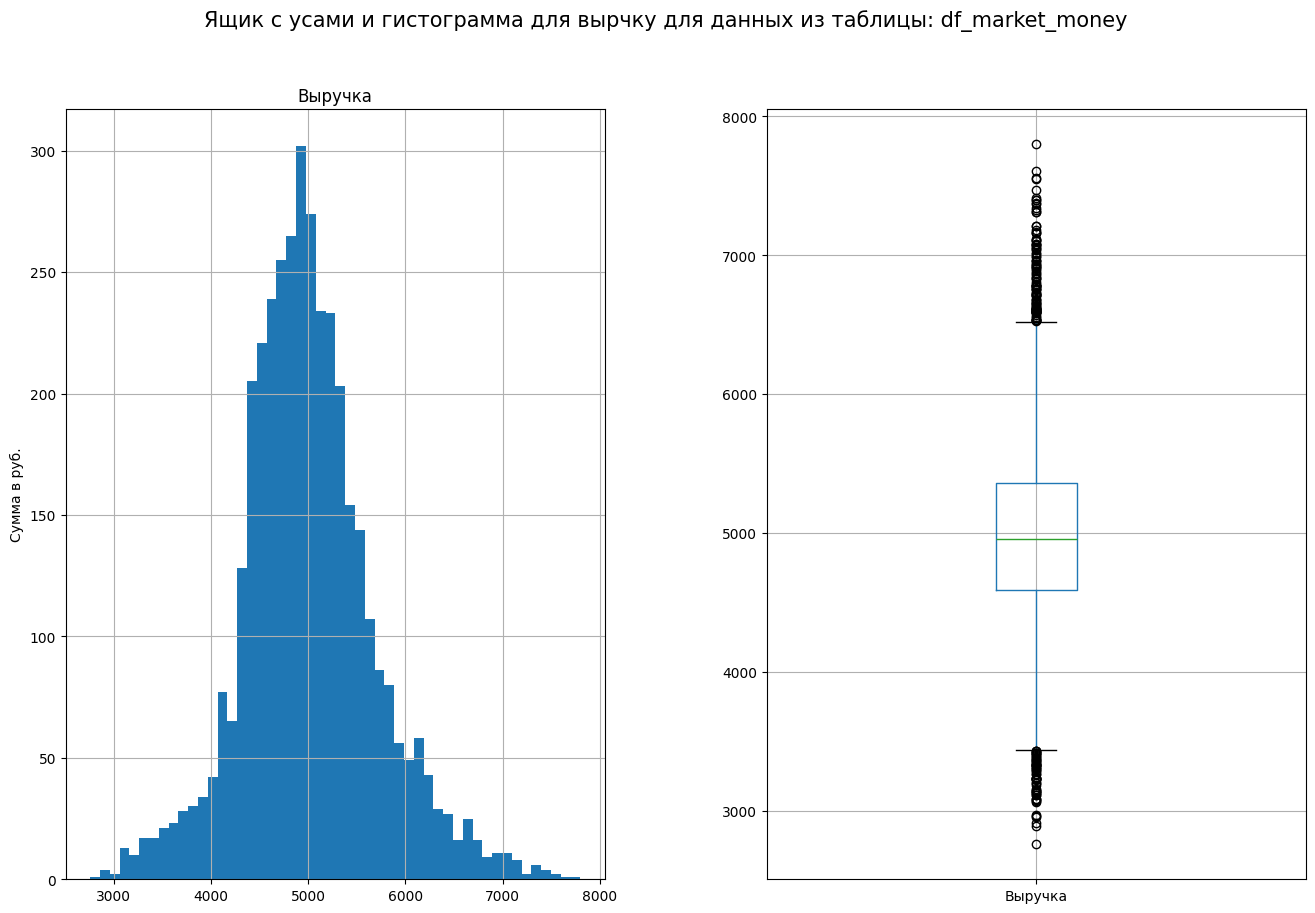

In [14]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))
df_market_money.hist('Выручка', bins = 50, ax = axes[0]);
df_market_money.boxplot('Выручка', ax = axes[1]);
axes[0].set_ylabel('Сумма в руб.');
plt.suptitle('Ящик с усами и гистограмма для вырчку для данных из таблицы: df_market_money', fontsize = 15);

In [15]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3888 entries, 3 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3888 non-null   int64  
 1   Период   3888 non-null   object 
 2   Выручка  3888 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 121.5+ KB


**Вывод:** 
- У гистрограммы наблюдаются один пик, данные в таблицы распределены нормально
- Аномалия убрана, большое значение и нулевое, так как нулевое, скорее всего является новым пользователем 

### Анализ таблиц

In [16]:
df_market.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась    стандарт                нет   
3  215351                 Снизилась    стандарт                 да   
4  215352                 Снизилась    стандарт                нет   
5  215353                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   
5    Домашний текстиль                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2  
5                                   1               1                 4

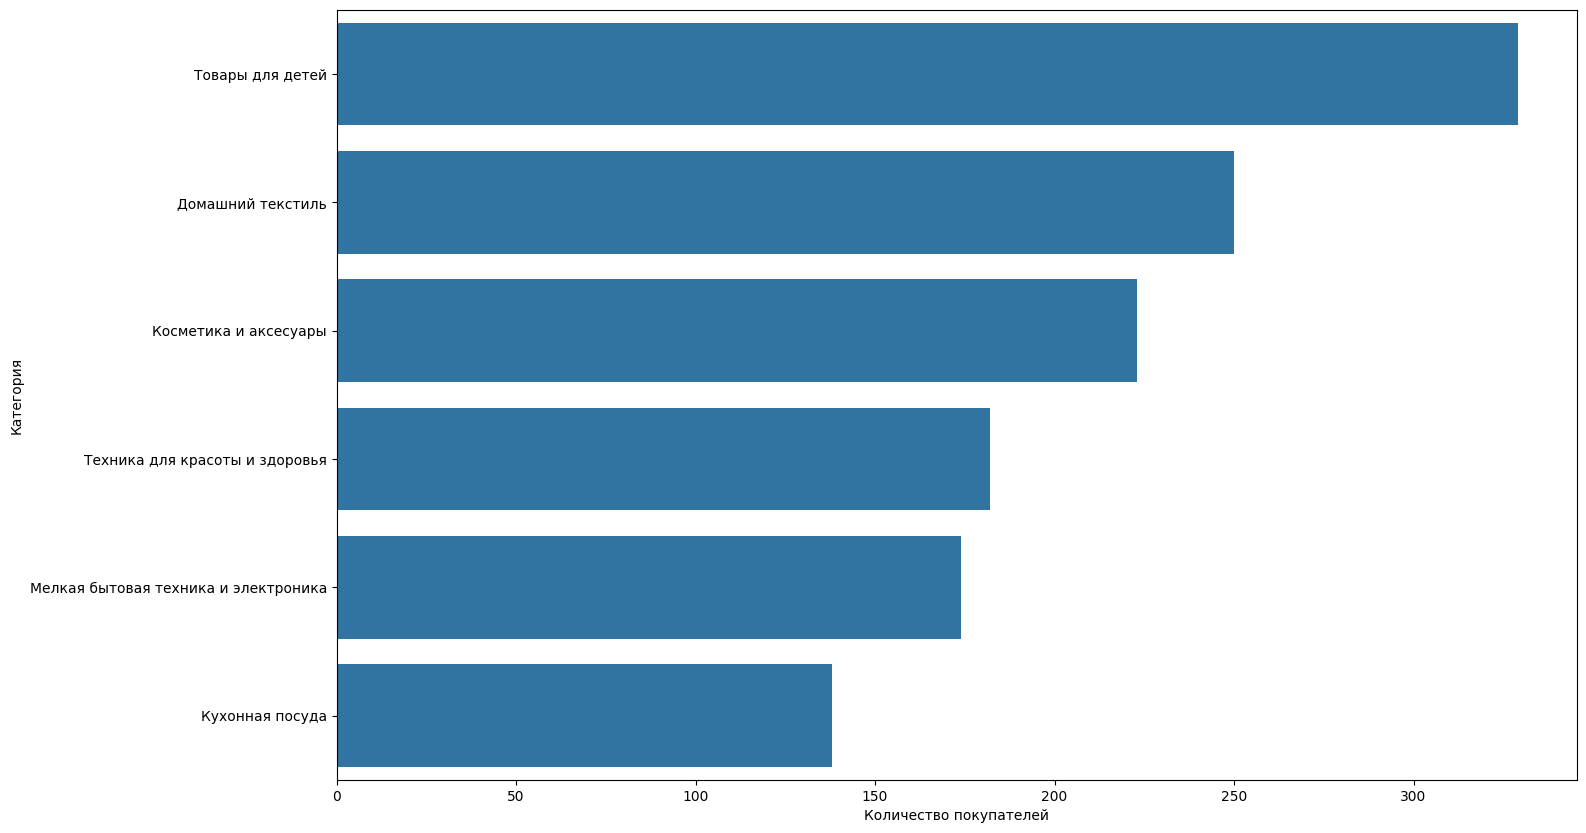

In [17]:
df_market_cat = df_market.pivot_table(index = 'Популярная_категория', values = 'id', aggfunc = 'count').sort_values('id', ascending = False)
plt.figure(figsize = (16, 10))
sns.barplot(data = df_market_cat, y = df_market_cat.index, x = 'id')
plt.ylabel('Категория')
plt.xlabel('Количество покупателей');


**Вывод:** Самая популярная категория **Товары для детей**

In [18]:
df_market_pivoted = df_market.pivot_table(index = ['Популярная_категория', 'Покупательская активность'] , values = 'id', aggfunc = 'count').reset_index()
df_market_pivoted

Популярная_категория Покупательская активность   id
0                      Домашний текстиль           Прежний уровень  149
1                      Домашний текстиль                 Снизилась  101
2                  Косметика и аксесуары           Прежний уровень  118
3                  Косметика и аксесуары                 Снизилась  105
4                        Кухонная посуда           Прежний уровень   72
5                        Кухонная посуда                 Снизилась   66
6   Мелкая бытовая техника и электроника           Прежний уровень  147
7   Мелкая бытовая техника и электроника                 Снизилась   27
8         Техника для красоты и здоровья           Прежний уровень  132
9         Техника для красоты и здоровья                 Снизилась   50
10                      Товары для детей           Прежний уровень  184
11                      Товары для детей                 Снизилась  145

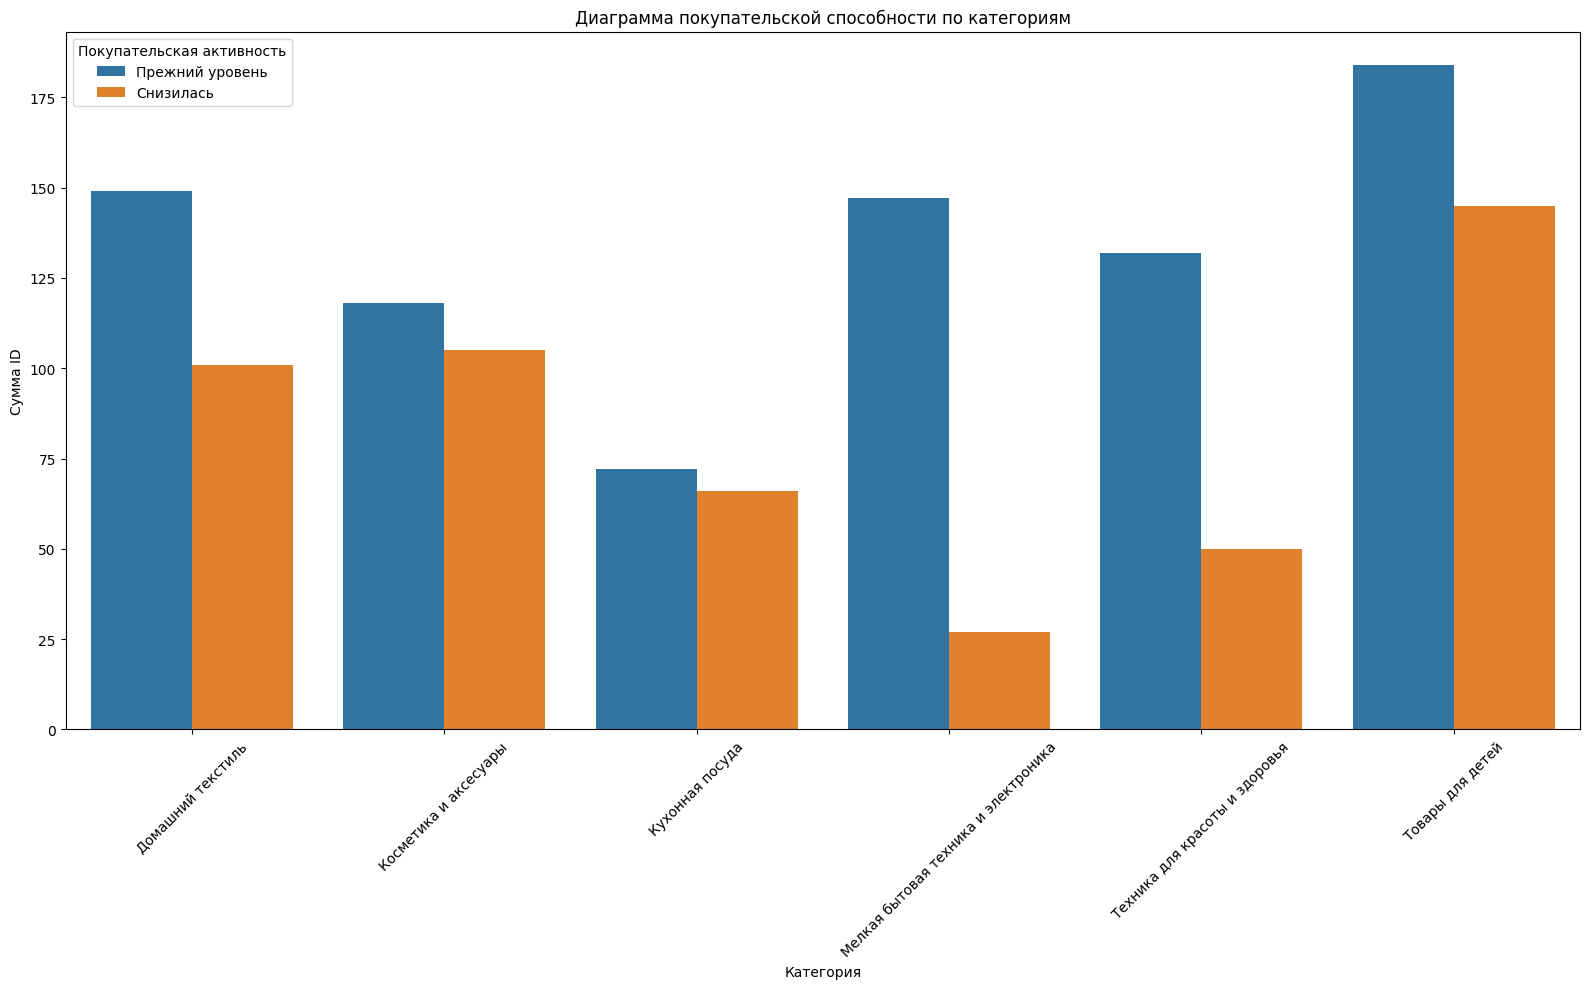

In [19]:
plt.figure(figsize=(16, 10))
sns.barplot(
    data=df_market_pivoted,
    x='Популярная_категория',
    y='id',
    hue='Покупательская активность')
plt.title("Диаграмма покупательской способности по категориям")
plt.xlabel("Категория")
plt.ylabel("Сумма ID")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:** 
- В самой большой категории Товары для детей произошло самое наибольшое снижение активности пользователей
- Самое минимальное снижение произошло в Мелкой бытовой техники и электроники

In [20]:
df_market.pivot_table(index = 'Покупательская активность',
                          columns = 'Тип сервиса',
                          values = 'id',
                          aggfunc = 'count')

Тип сервиса                премиум  стандарт
Покупательская активность                   
Прежний уровень                206       596
Снизилась                      168       326

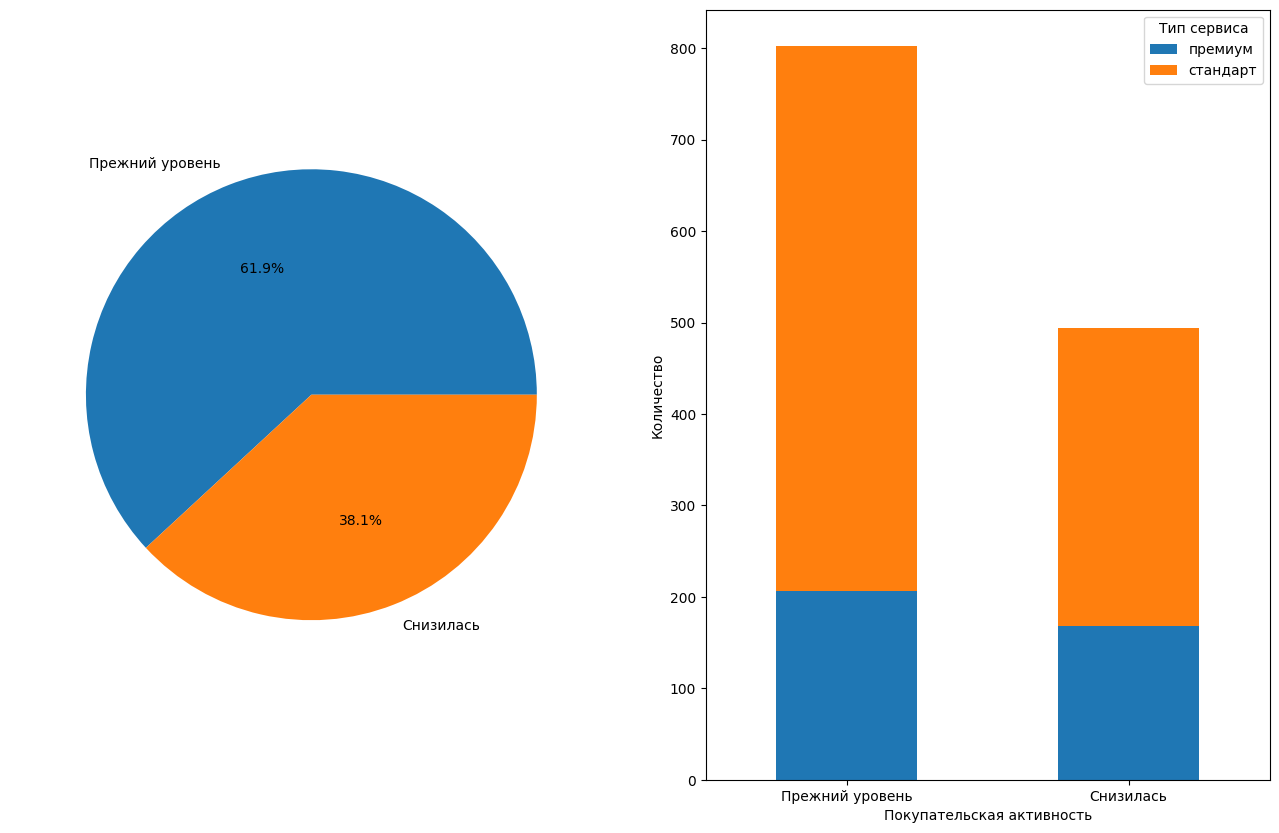

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

df_market['Покупательская активность'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0]);
df_market.pivot_table(index = 'Покупательская активность', columns = 'Тип сервиса', values = 'id', aggfunc = 'count').plot.bar(ax = axes[1], stacked = True,rot = 0);

axes[1].set_ylabel('Количество');
axes[0].set_ylabel(' ');

**Вывод:** 
- Покупательская активность - в целом, меньше 40 процентов снизилась покупательская активность
- Наблюдается дисбаланс, нужно будет это учитывать при создании модели

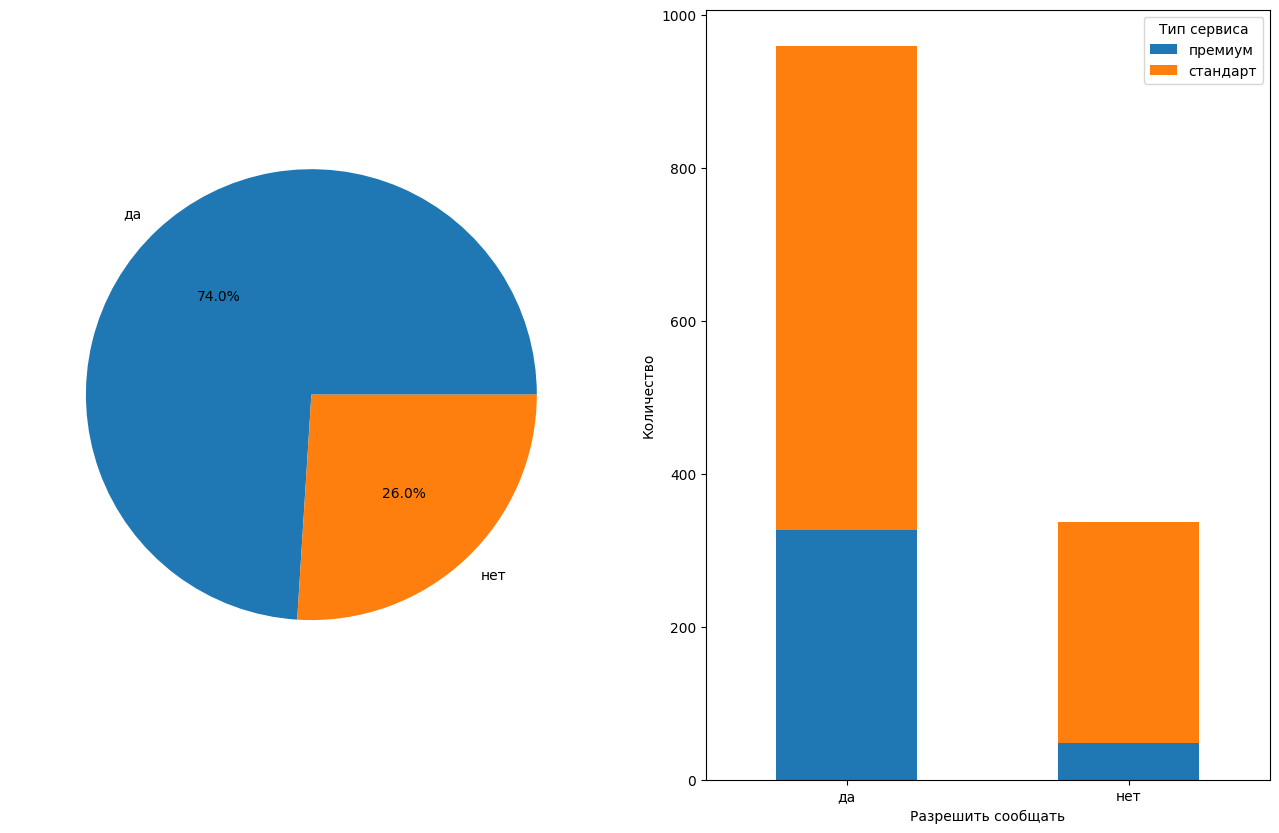

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (16, 10))

df_market['Разрешить сообщать'].value_counts().plot.pie(autopct = '%1.1f%%', ax = axes[0]);
df_market.pivot_table(index = 'Разрешить сообщать', columns = 'Тип сервиса', values = 'id', aggfunc = 'count').plot.bar(ax = axes[1], stacked = True,rot = 0);

axes[1].set_ylabel('Количество');
axes[0].set_ylabel(' ');

**Вывод:** 
- 74 процента пользователей в выборке разрешают сообщать о дополнительных предложений
- Пользователи, которые умеют тип сервиса премиум разрешают сообщаться больше

Медианное взаимодействие с пользователем 4.2


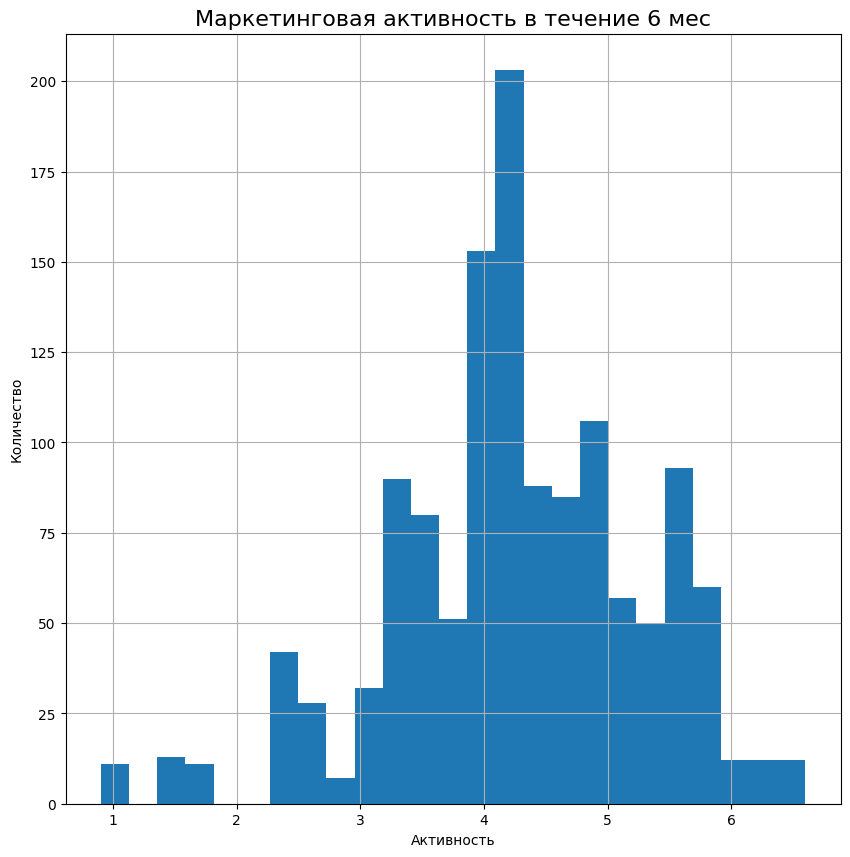

In [23]:
print(f'Медианное взаимодействие с пользователем {df_market["Маркет_актив_6_мес"].median()}')
df_market.hist('Маркет_актив_6_мес', bins = 25, figsize = (10, 10));
plt.title('Маркетинговая активность в течение 6 мес', fontsize = 16);
plt.ylabel('Количество');
plt.xlabel('Активность');

**Вывод:** В среднем взаимодействие с клиентом была 4.2 

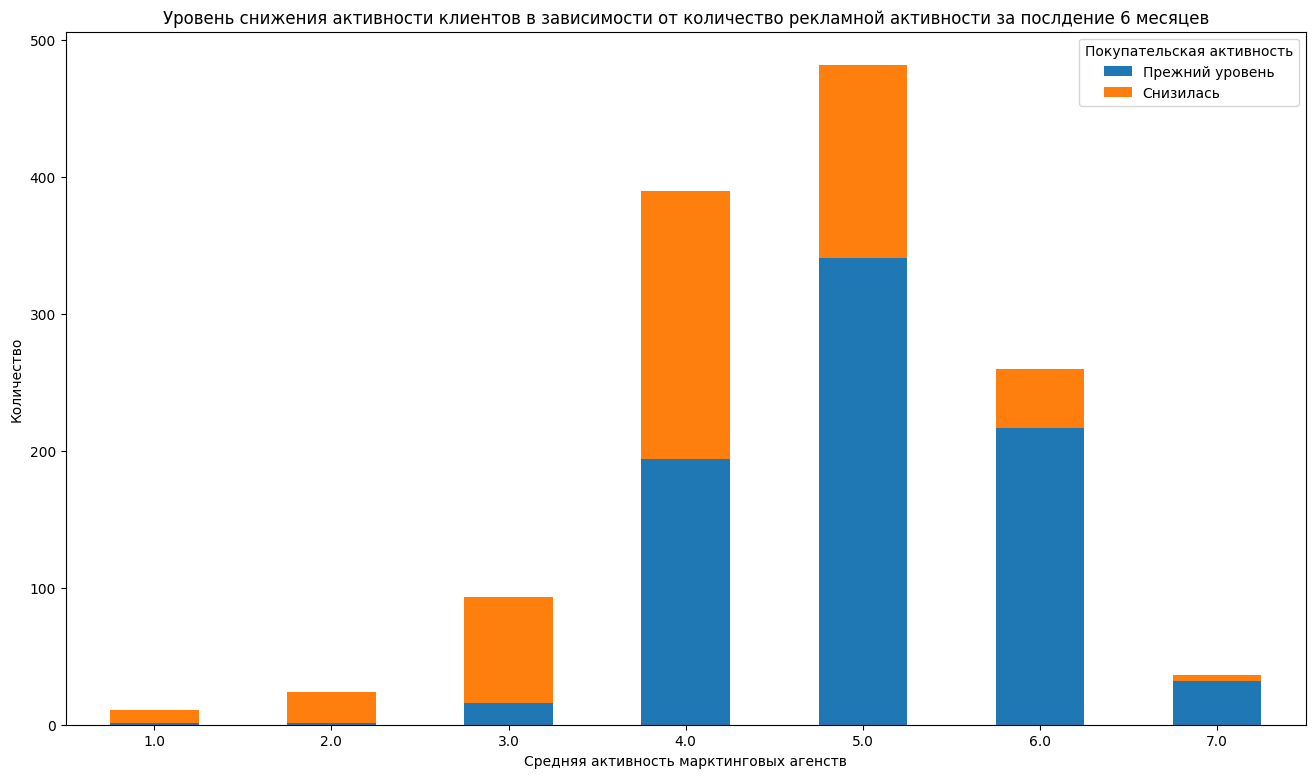

Покупательская активность  Прежний уровень  Снизилась
Маркет_актив_6_мес                                   
1.0                                      1         10
2.0                                      1         23
3.0                                     16         77
4.0                                    194        196
5.0                                    341        141
6.0                                    217         43
7.0                                     32          4

In [24]:
market_activity = df_market.copy()
market_activity['Маркет_актив_6_мес'] = df_market['Маркет_актив_6_мес'].apply(np.ceil)

market_activity = market_activity.pivot_table(index = 'Маркет_актив_6_мес', columns = 'Покупательская активность', values = 'id', aggfunc = 'count' )
market_activity.plot.bar(figsize = (16, 9), rot = 0, stacked = True);
plt.title('Уровень снижения активности клиентов в зависимости от количество рекламной активности за послдение 6 месяцев');
plt.ylabel('Количество');
plt.xlabel('Средняя активность марктинговых агенств');
plt.show()
market_activity

**Вывод:** 
- При среднем взаимодействие 1, 2 и раз в месяц, сильно снижается уровень покуппательской активности, по сравнению с остальными 
- При взаимодействии 5 или 6 раз в месяц активность остаётся прежней больше, чем снижается
- При средней активности в 7 раз в месяц видно, что активность пользователя сохроняется, но об этом сложно судить, так как маленькая выборка 

In [25]:
def histogram(df, column, title = None, bins = 100, ax = None):
    '''
    Небольшая функция для написания просто графика
    '''
    mediana = df[column].median()
    meaned = df[column].mean()
    df[column].hist(bins = bins, figsize = (12, 10), ax = ax);
    plt.axvline(mediana, linestyle = '--', color = 'red', label = f'Медиана: {mediana}');
    plt.axvline(meaned, linestyle = '--', color = 'g', label = f'Среднее: {meaned}');
    plt.ylabel('Количество')
    plt.xlabel(column)
    plt.title(f'Гистограмма {title}', fontsize = 18);
    plt.legend();
    plt.show()
    print(f"Медиана: {mediana} \nСреднее: {meaned}")

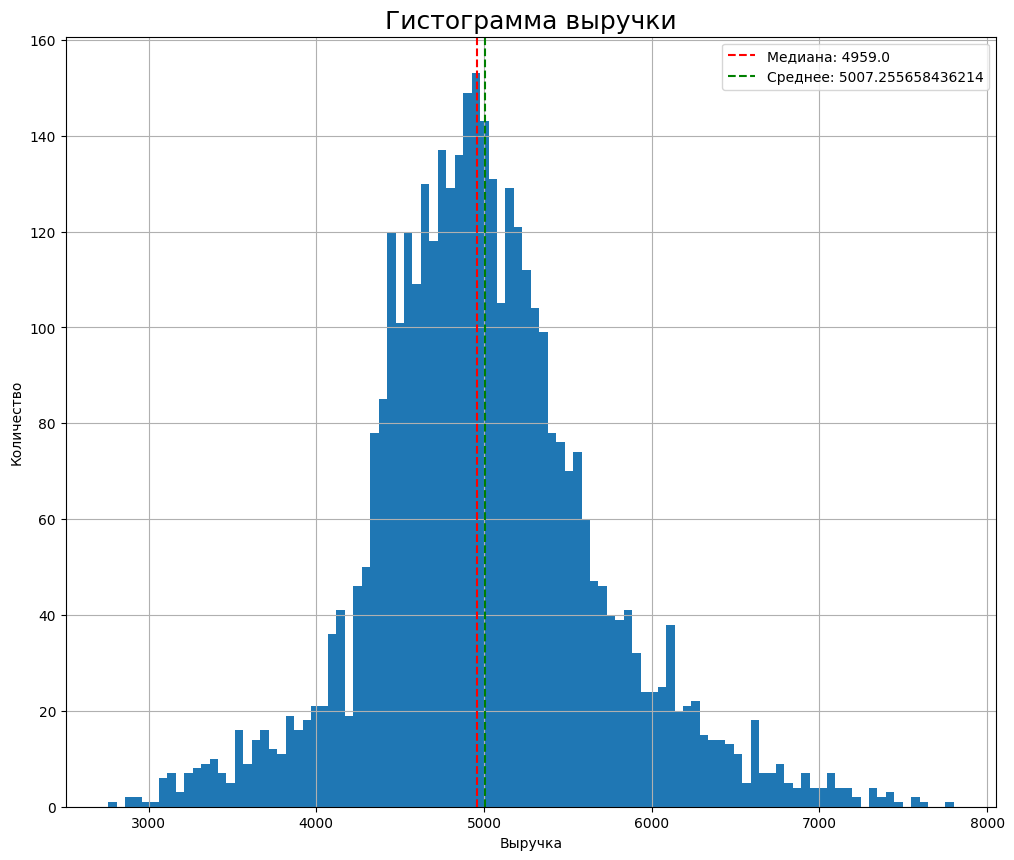

Медиана: 4959.0 
Среднее: 5007.255658436214


In [26]:
histogram(df_market_money, 'Выручка', 'выручки')

**Вывод:** 
- Данные в порядке, соответсвуют нормальному распределению 
- Средняя выручка 5000

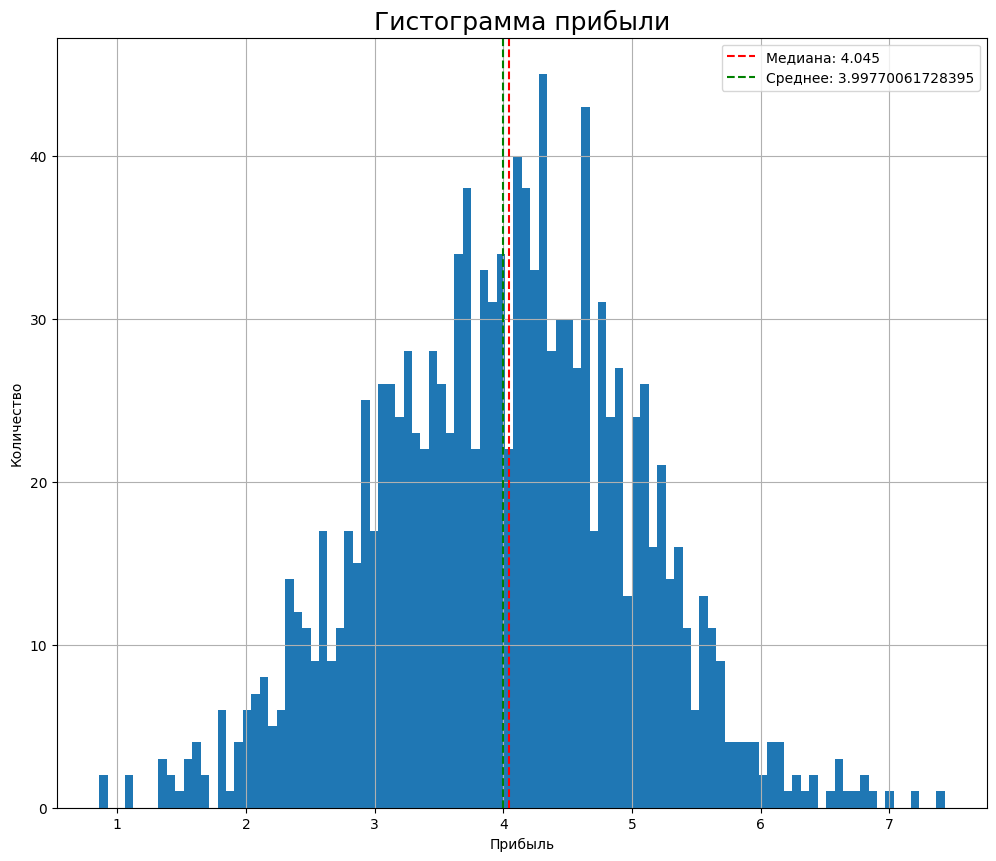

Медиана: 4.045 
Среднее: 3.99770061728395


In [27]:
histogram(df_money, 'Прибыль', 'прибыли')

**Вывод:** 
- Данные в порядке, соответсвуют нормальному распределению 

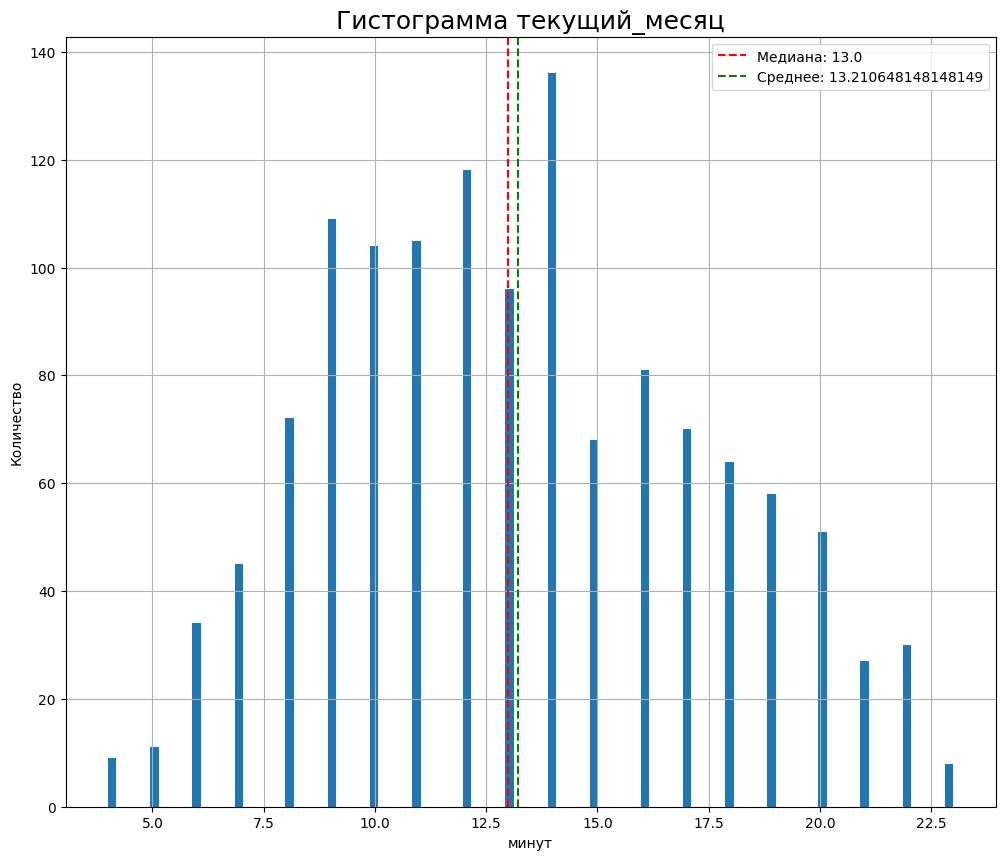

Медиана: 13.0 
Среднее: 13.210648148148149


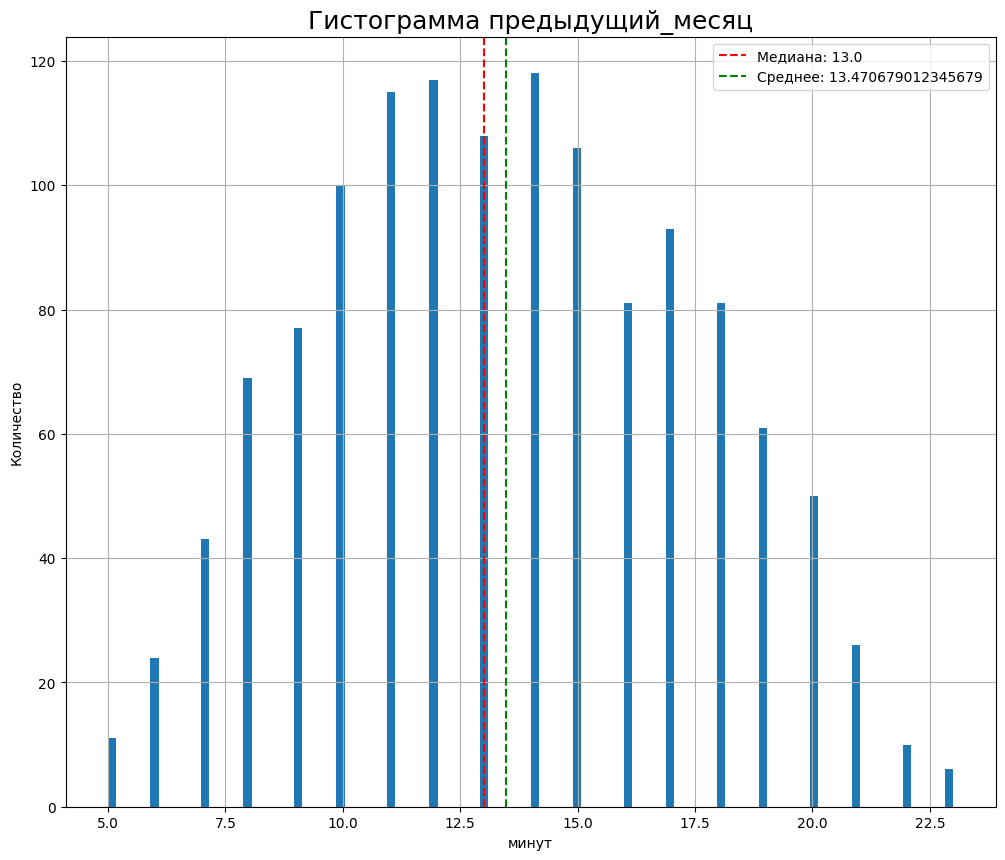

Медиана: 13.0 
Среднее: 13.470679012345679


In [28]:
condition = set(df_market_time['Период'])
for _ in condition:
    histogram(df_market_time.query("Период == @_"), 'минут', title = _)

**Вывод:** 
- Данные в порядке, соответсвуют нормальному распределению 
- Среднее время провождения на сайте 13 минут как в прошлом месяце, так и в этом

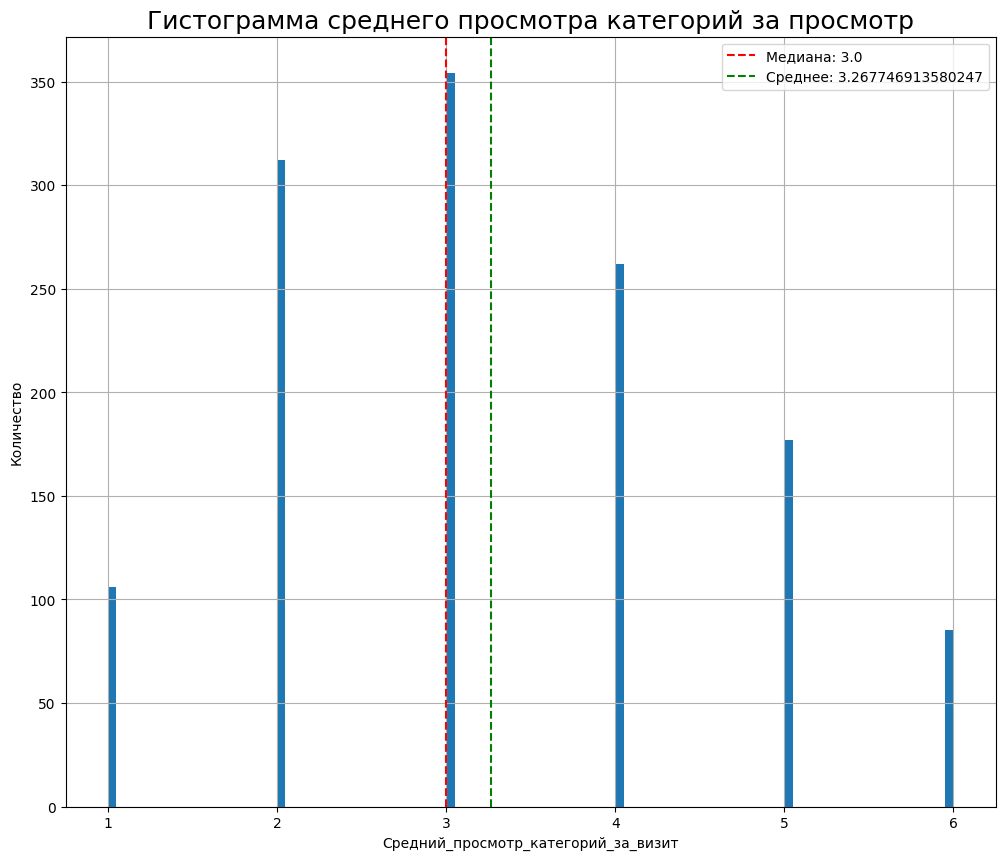

Медиана: 3.0 
Среднее: 3.267746913580247


In [29]:
histogram(df_market, 'Средний_просмотр_категорий_за_визит', 'среднего просмотра категорий за просмотр')

 **Вывод:** 
- Средний просмотр за визит составляет 3
- Распределение стремится к нормальному

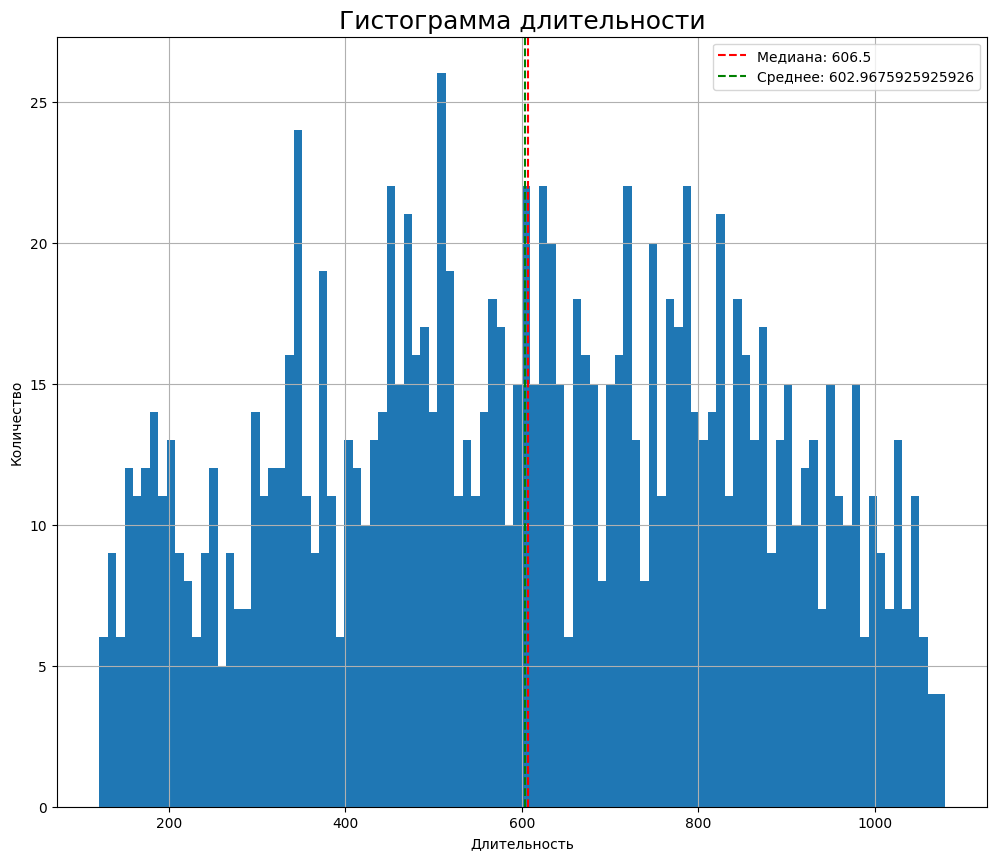

Медиана: 606.5 
Среднее: 602.9675925925926


In [30]:
histogram(df_market, 'Длительность', 'длительности')

**Вывод:** 
- Распределение стремится к нормальному, в целом всё хорошо
- Среднее время 600 секунд ~ 10 минут

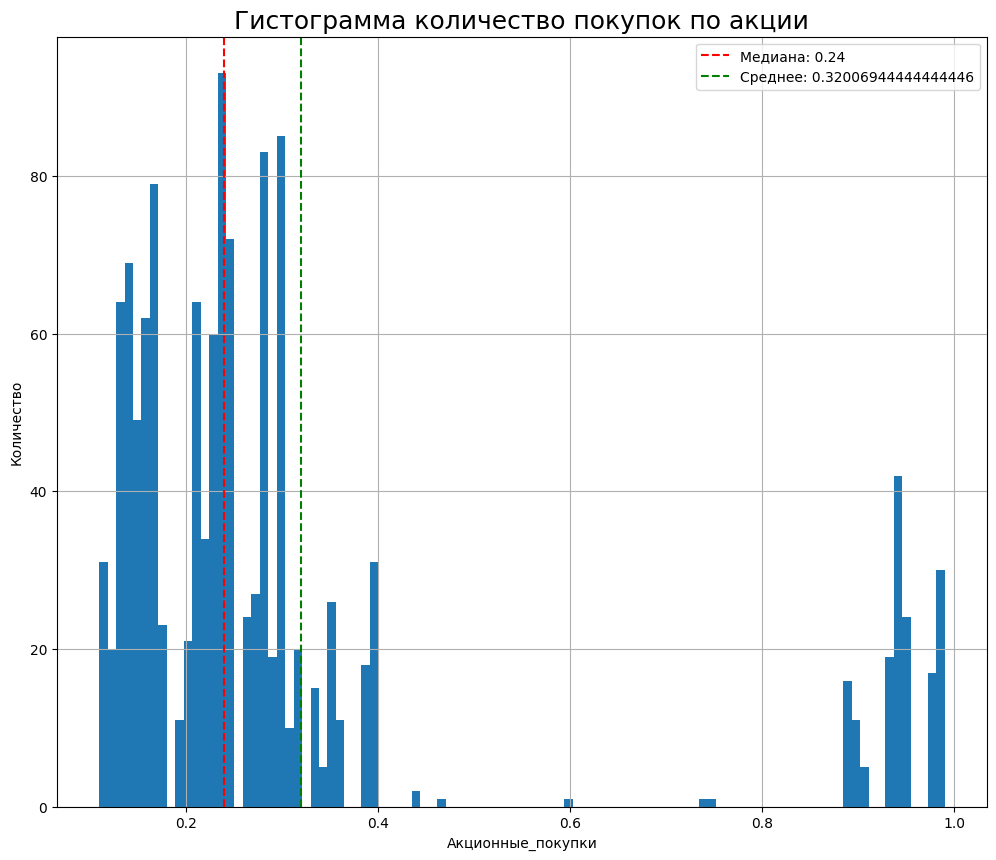

Медиана: 0.24 
Среднее: 0.32006944444444446


In [31]:
histogram(df_market, 'Акционные_покупки', 'количество покупок по акции')

**Вывод:**
- На гистограмме видно два пика, говорит о том, что клиенты деляться на два основных типа, кто-то старается брать практичесски всё по акции, а кому-то все равно
- Для моделей надо будет разделить это на две категории

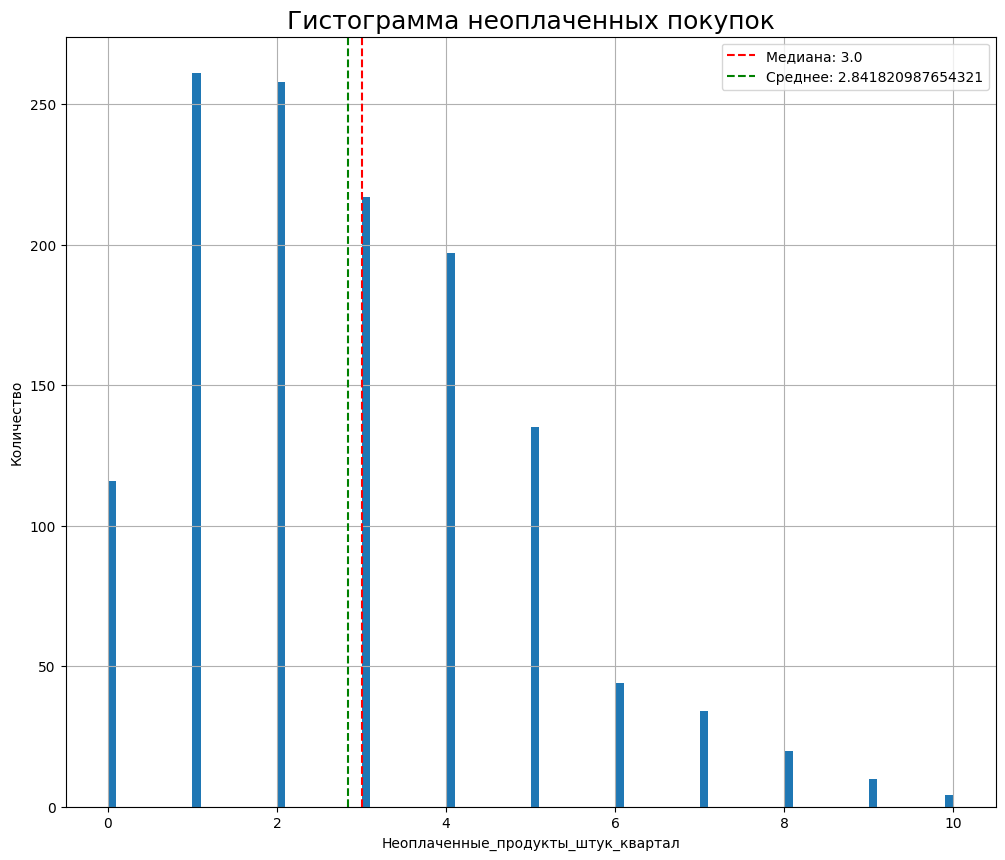

Медиана: 3.0 
Среднее: 2.841820987654321


In [32]:
histogram(df_market, 'Неоплаченные_продукты_штук_квартал', 'неоплаченных покупок')

**Вывод:** 
- Распределение стремится к нормальному, но пик чуточку сдвинут влево
- Больше всего не оформлено по одному или двум товарам, среднее показывает, что по три товара
- В целом для модели проблем с данными не будет

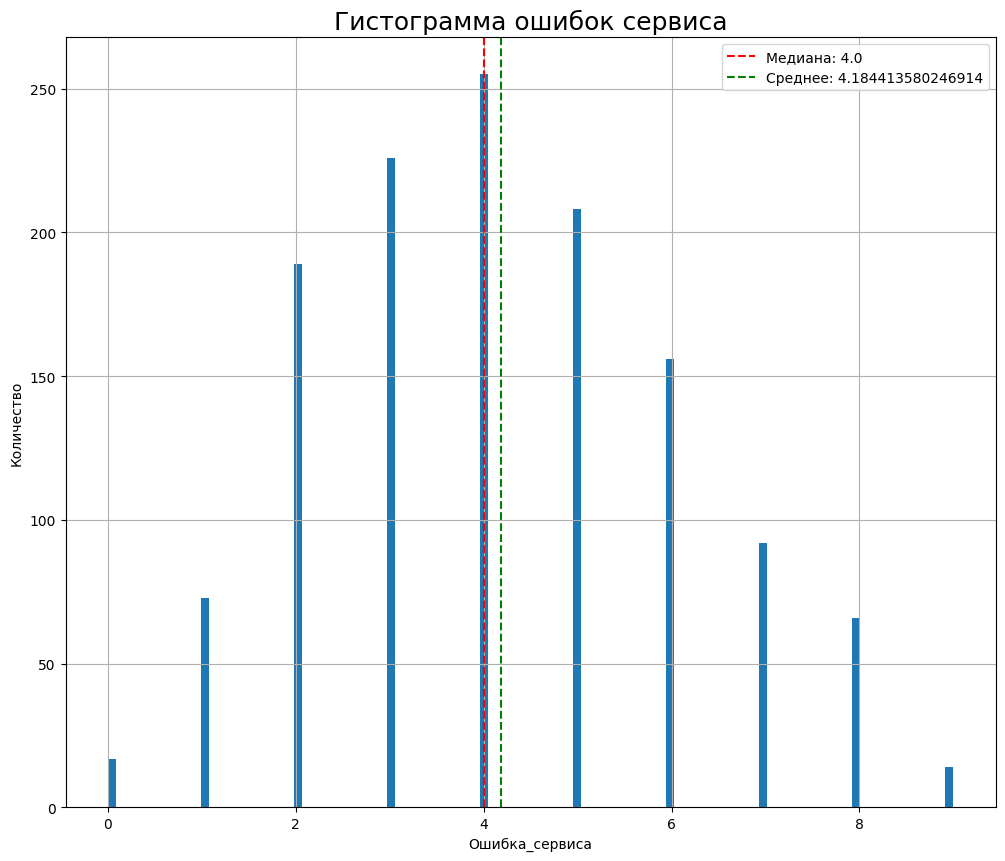

Медиана: 4.0 
Среднее: 4.184413580246914


In [33]:
histogram(df_market, 'Ошибка_сервиса','ошибок сервиса')

**Вывод:** 
- Распределение стремится к нормальному
- В среднем по 4 ошибки
- Достаточно важный признак, скорее всего, так как от этого зависит комфорт пользователя

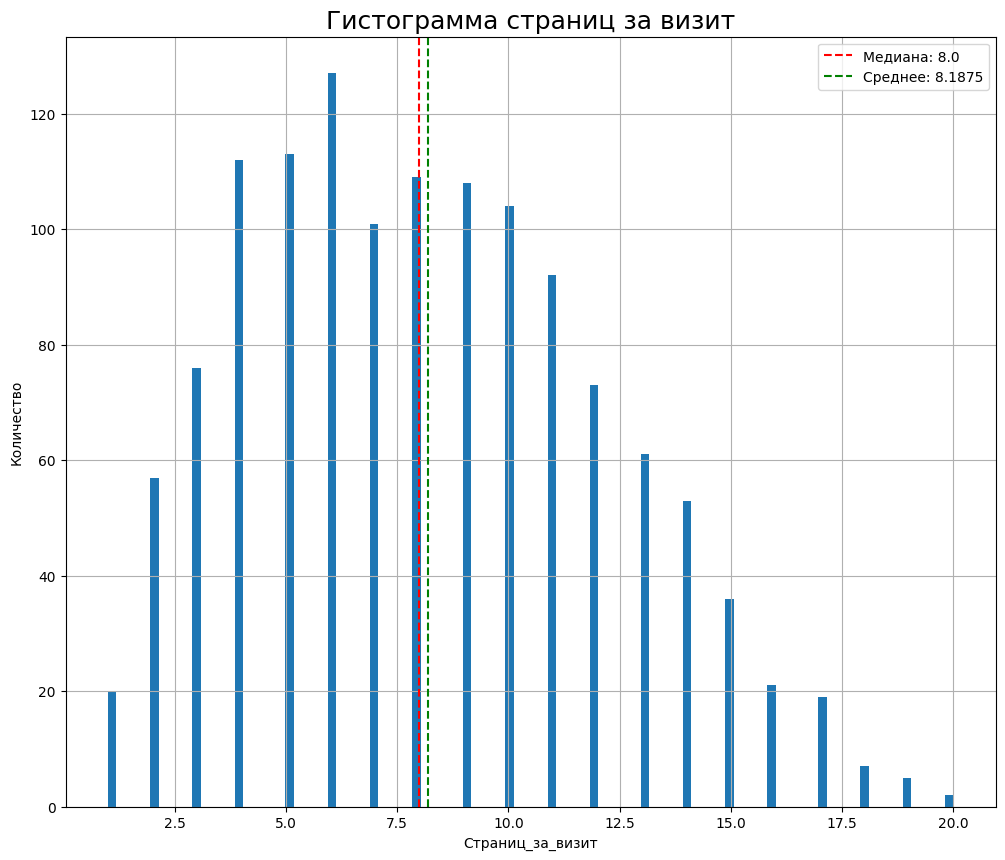

Медиана: 8.0 
Среднее: 8.1875


In [34]:
histogram(df_market, 'Страниц_за_визит', 'страниц за визит')

**Вывод:**
- Распределение нормальное
- В среднем посещают по 8 страниц, хотя на гистгорамме видно, что больше всего посетили по 6 сайтов за визит
- В целом для модели проблем с данными не будет

**Вывод по блоку:**

- Страниц_за_визит

    - В среднем посещают по 8 страниц, больше всего посещают по 6 страниц. Распределение нормальное, хоть и чуточку смещенно влево

- Ошибка_сервиса
 
    - В среднем по 4 ошибки на пользователя, важный признак будет при обучении, комофорт пользователя зависит от этого, из-за этого пользователь может уйти к конкурентам
    
- Неоплаченные_продукты_штук_квартал

    - Распределение стремится к нормальному, но пик чуточку сдвинут влево
    - Больше всего не оформлено по одному или двум товарам, среднее показывает, что по три товара

- Вывод: Акционные_покупки

    - На гистограмме видно два пика, говорит о том, что клиенты деляться на два основных типа, кто-то старается брать практичесски всё по акции, а кому-то все равно
    - Для моделей надо будет разделить это на две категории

- Средний_просмотр_категорий_за_визит

    - Средний просмотр за визит составляет 3

- При среднем взаимодействие 1, 2 и раз в месяц, сильно снижается уровень покуппательской активности, по сравнению с остальными. При взаимодействии 5 или 6 раз в месяц активность остаётся прежней больше, чем снижается.При средней активности в 7 раз в месяц видно, что активность пользователя сохроняется, но об этом сложно судить, так как маленькая выборка.

- 74 процента пользователей в выборке разрешают сообщать о дополнительных предложений
- Самая популярная категория Товары для детей
- В самой большой категории Товары для детей произошло самое наибольшое снижение активности пользователей
- Самое минимальное снижение произошло в Мелкой бытовой техники и электроники

- Аномалия была убрана
- В данных были убраны строчки, где пользователи были не активны

## Объединение таблиц

In [35]:
df_market

df_market_time_pivot = df_market_time.pivot_table(index = 'id', columns = 'Период')
df_market_time_pivot.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
df_market_time_pivot = df_market_time_pivot.reset_index()

df_market_money_pivot = df_market_money.pivot_table(index = 'id', columns = 'Период')
df_market_money_pivot.columns = ['предпредыдущий_месяцй_выручка','предыдущий_месяц_выручка','текущий_месяц_выручка']
df_market_money_pivot = df_market_money_pivot.reset_index()

df_merged = df_market.merge(df_market_time_pivot, how = 'left', on = 'id').merge(df_market_money_pivot, how = 'left', on = 'id')
df_merged

id Покупательская активность Тип сервиса Разрешить сообщать  \
0     215349                 Снизилась     премиум                 да   
1     215350                 Снизилась    стандарт                нет   
2     215351                 Снизилась    стандарт                 да   
3     215352                 Снизилась    стандарт                нет   
4     215353                 Снизилась    стандарт                 да   
...      ...                       ...         ...                ...   
1291  216643           Прежний уровень    стандарт                 да   
1292  216644           Прежний уровень    стандарт                нет   
1293  216645           Прежний уровень    стандарт                 да   
1294  216646           Прежний уровень    стандарт                 да   
1295  216647           Прежний уровень     премиум                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
0                    4.4                     4           819   
1                    4.9                     3           539   
2                    3.2                     5           896   
3                    5.1                     3          1064   
4                    3.3                     4           762   
...                  ...                   ...           ...   
1291                 6.6                     3           318   
1292                 5.1                     4           454   
1293                 4.1                     3           586   
1294                 6.3                     5           645   
1295                 4.0                     5           906   

      Акционные_покупки            Популярная_категория  \
0                  0.75                Товары для детей   
1                  0.14               Домашний текстиль   
2                  0.99                Товары для детей   
3                  0.94                Товары для детей   
4                  0.26               Домашний текстиль   
...                 ...                             ...   
1291               0.24  Техника для красоты и здоровья   
1292               0.21               Домашний текстиль   
1293               0.20               Домашний текстиль   
1294               0.12  Техника для красоты и здоровья   
1295               0.94  Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
0                                       4                                   4   
1                                       5                                   2   
2                                       5                                   0   
3                                       3                                   2   
4                                       4                                   1   
...                                   ...                                 ...   
1291                                    5                                   3   
1292                                    6                                   2   
1293                                    3                                   2   
1294                                    3                                   3   
1295                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  минут_предыдущий_месяц  \
0                  2                 5                    12.0   
1                  1                 5                     8.0   
2                  6                 4                    11.0   
3                  3                 2                     8.0   
4                  1                 4                    10.0   
...              ...               ...                     ...   
1291               3                11                    14.0   
1292               3                 9                    12.0   
1293               5                 7                    12.0   
1294               5  

**Вывод:** Объединил все таблицы в одну, кроме df_money

## Корреляционный анализ

In [36]:
df_no_id = df_merged.drop('id', axis = 1)
columns = df_no_id.select_dtypes(include = 'object').columns.tolist() 
df_no_id.phik_matrix()

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'предпредыдущий_месяцй_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка']


Покупательская активность  Тип сервиса  \
Покупательская активность                             1.000000     0.129961   
Тип сервиса                                           0.129961     1.000000   
Разрешить сообщать                                    0.000000     0.289989   
Маркет_актив_6_мес                                    0.544831     0.089911   
Маркет_актив_тек_мес                                  0.000000     0.045261   
Длительность                                          0.099901     0.401411   
Акционные_покупки                                     0.506277     0.030010   
Популярная_категория                                  0.299721     0.070810   
Средний_просмотр_категорий_за_визит                   0.539607     0.185392   
Неоплаченные_продукты_штук_квартал                    0.505656     0.120027   
Ошибка_сервиса                                        0.224154     0.079515   
Страниц_за_визит                                      0.749889     0.102594   
минут_предыдущий_месяц                                0.685138     0.131814   
минут_текущий_месяц                                   0.576770     0.000000   
предпредыдущий_месяцй_выручка                         0.497393     0.069704   
предыдущий_месяц_выручка                              0.224638     0.000000   
текущий_месяц_выручка                                 0.197214     0.124216   

                                     Разрешить сообщать  Маркет_актив_6_мес  \
Покупательская активность                      0.000000            0.544831   
Тип сервиса                                    0.289989            0.089911   
Разрешить сообщать                             1.000000            0.000000   
Маркет_актив_6_мес                             0.000000            1.000000   
Маркет_актив_тек_мес                           0.052617            0.079855   
Длительность                                   0.253831            0.000000   
Акционные_покупки                              0.012198            0.279578   
Популярная_категория                           0.073684            0.150328   
Средний_просмотр_категорий_за_визит            0.070359            0.206808   
Неоплаченные_продукты_штук_квартал             0.195982            0.289421   
Ошибка_сервиса                                 0.021839            0.142402   
Страниц_за_визит                               0.042134            0.396769   
минут_предыдущий_месяц                         0.038387            0.363949   
минут_текущий_месяц                            0.000000            0.330601   
предпредыдущий_месяцй_выручка                  0.000000            0.315331   
предыдущий_месяц_выручка                       0.080842            0.155476   
текущий_месяц_выручка                          0.060907            0.039795   

                                     Маркет_актив_тек_мес  Длительность  \
Покупательская активность                        0.000000      0.099901   
Тип сервиса                                      0.045261      0.401411   
Разрешить сообщать                               0.052617      0.253831   
Маркет_актив_6_мес                               0.079855      0.000000   
Маркет_актив_тек_мес                             1.000000      0.174228   
Длительность                                     0.174228      1.000000   
Акционные_покупки                                0.000000      0.000000   
Популярная_категория                             0.136243      0.000000   
Средний_просмотр_категорий_за_визит              0.246632      0.186722   
Неоплаченные_продукты_штук_квартал               0.144187      0.192611   
Ошибка_сервиса                                   0.116930      0.175608   
Страниц_за_визит                                 0.000000      0.122495   
минут_предыдущий_месяц                           0.107974      0.026448   
минут_текущий_месяц                              0.061425      0.101481   
предпредыдущий_месяцй_выручка                    0.000000      0.1

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'предпредыдущий_месяцй_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка']


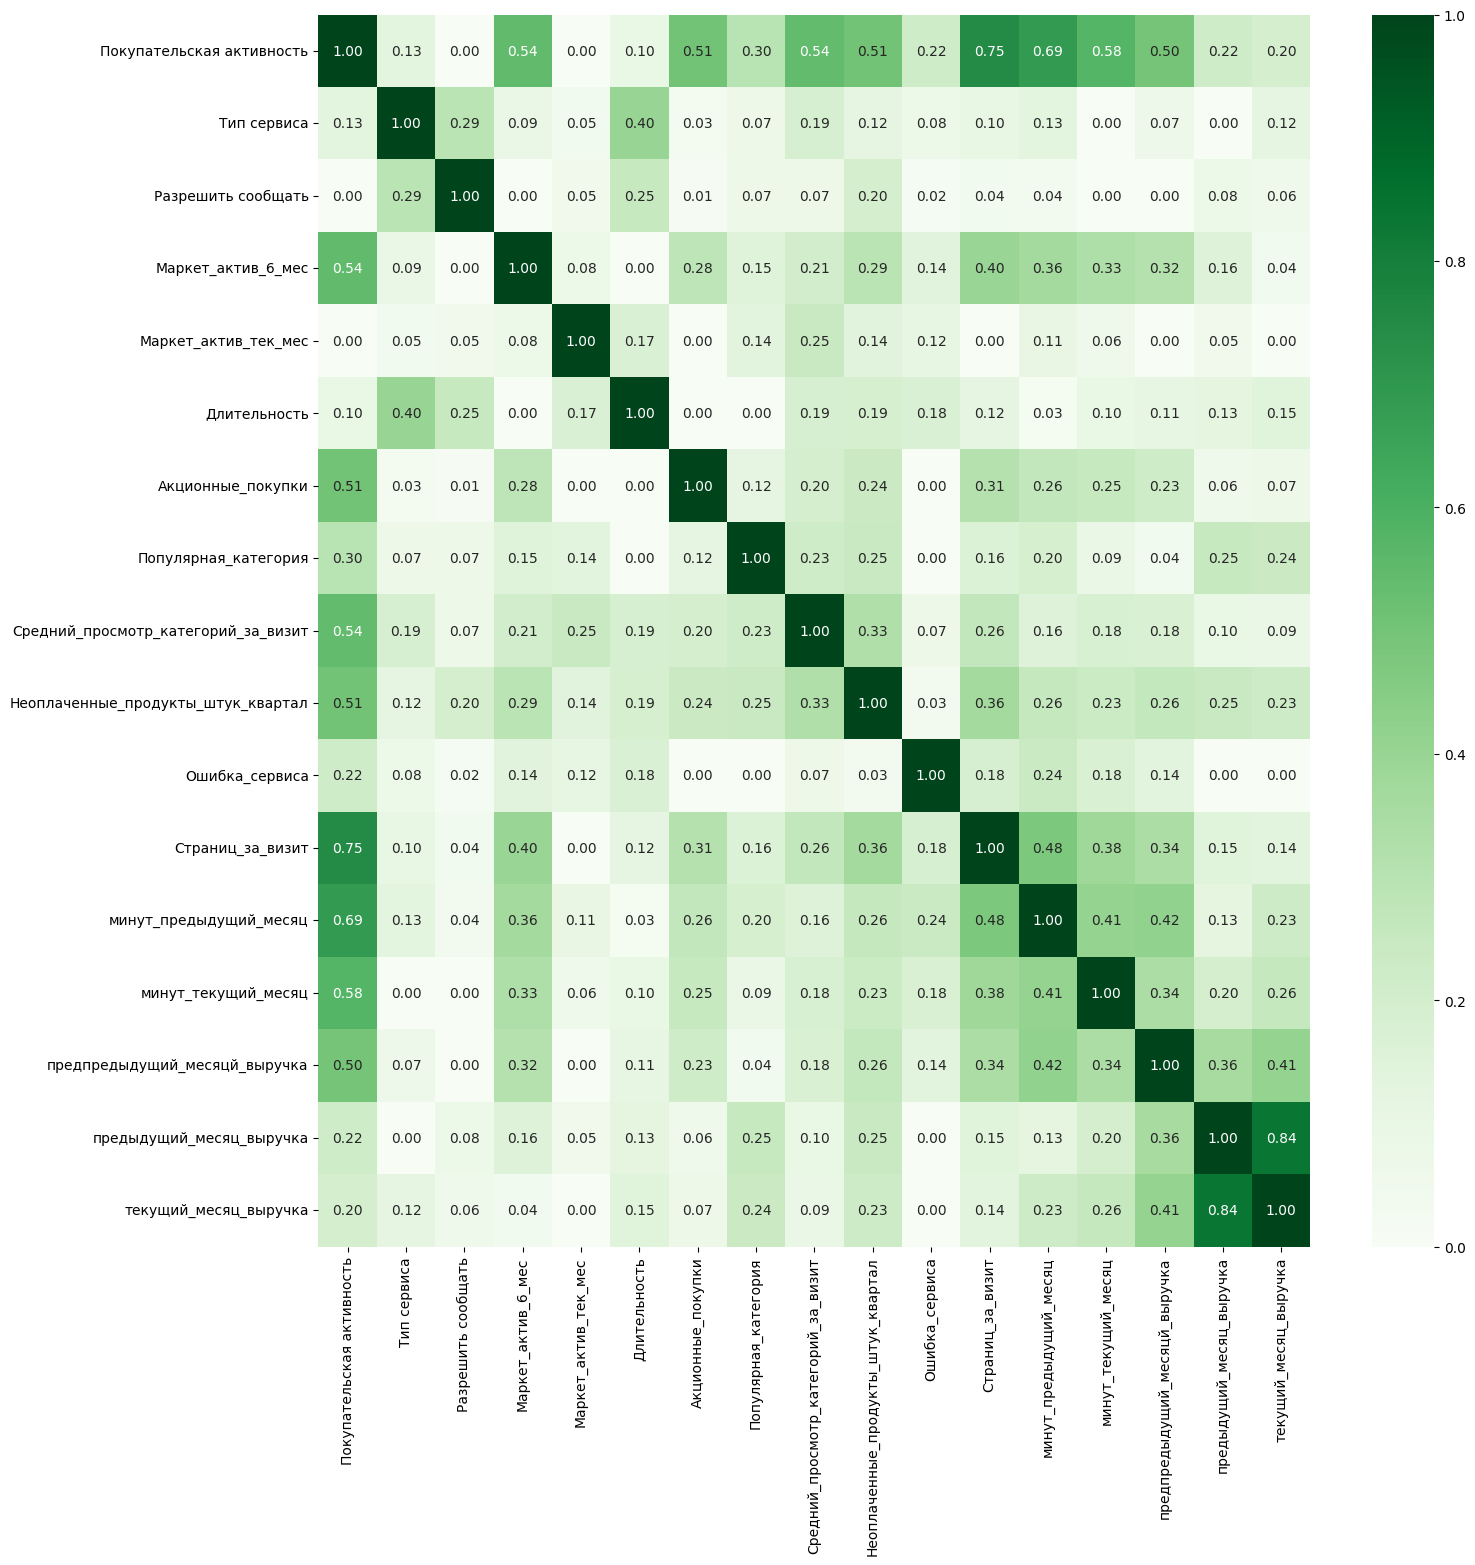

In [37]:
plt.figure(figsize = (16, 16))
sns.heatmap(df_no_id.phik_matrix(), annot = True, cmap = "Greens", fmt = '.2f');

interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'предпредыдущий_месяцй_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка']


C:\Users\Yanmiki\PycharmProjects\PythonProject\.venv\Lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская активность for analysis 1. Dropping this column
  warnings.warn(


interval columns not set, guessing: ['Маркет_актив_6_мес', 'Маркет_актив_тек_мес', 'Длительность', 'Акционные_покупки', 'Средний_просмотр_категорий_за_визит', 'Неоплаченные_продукты_штук_квартал', 'Ошибка_сервиса', 'Страниц_за_визит', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'предпредыдущий_месяцй_выручка', 'предыдущий_месяц_выручка', 'текущий_месяц_выручка']


C:\Users\Yanmiki\PycharmProjects\PythonProject\.venv\Lib\site-packages\phik\data_quality.py:82: UserWarning: Not enough unique value for variable Покупательская активность for analysis 1. Dropping this column
  warnings.warn(


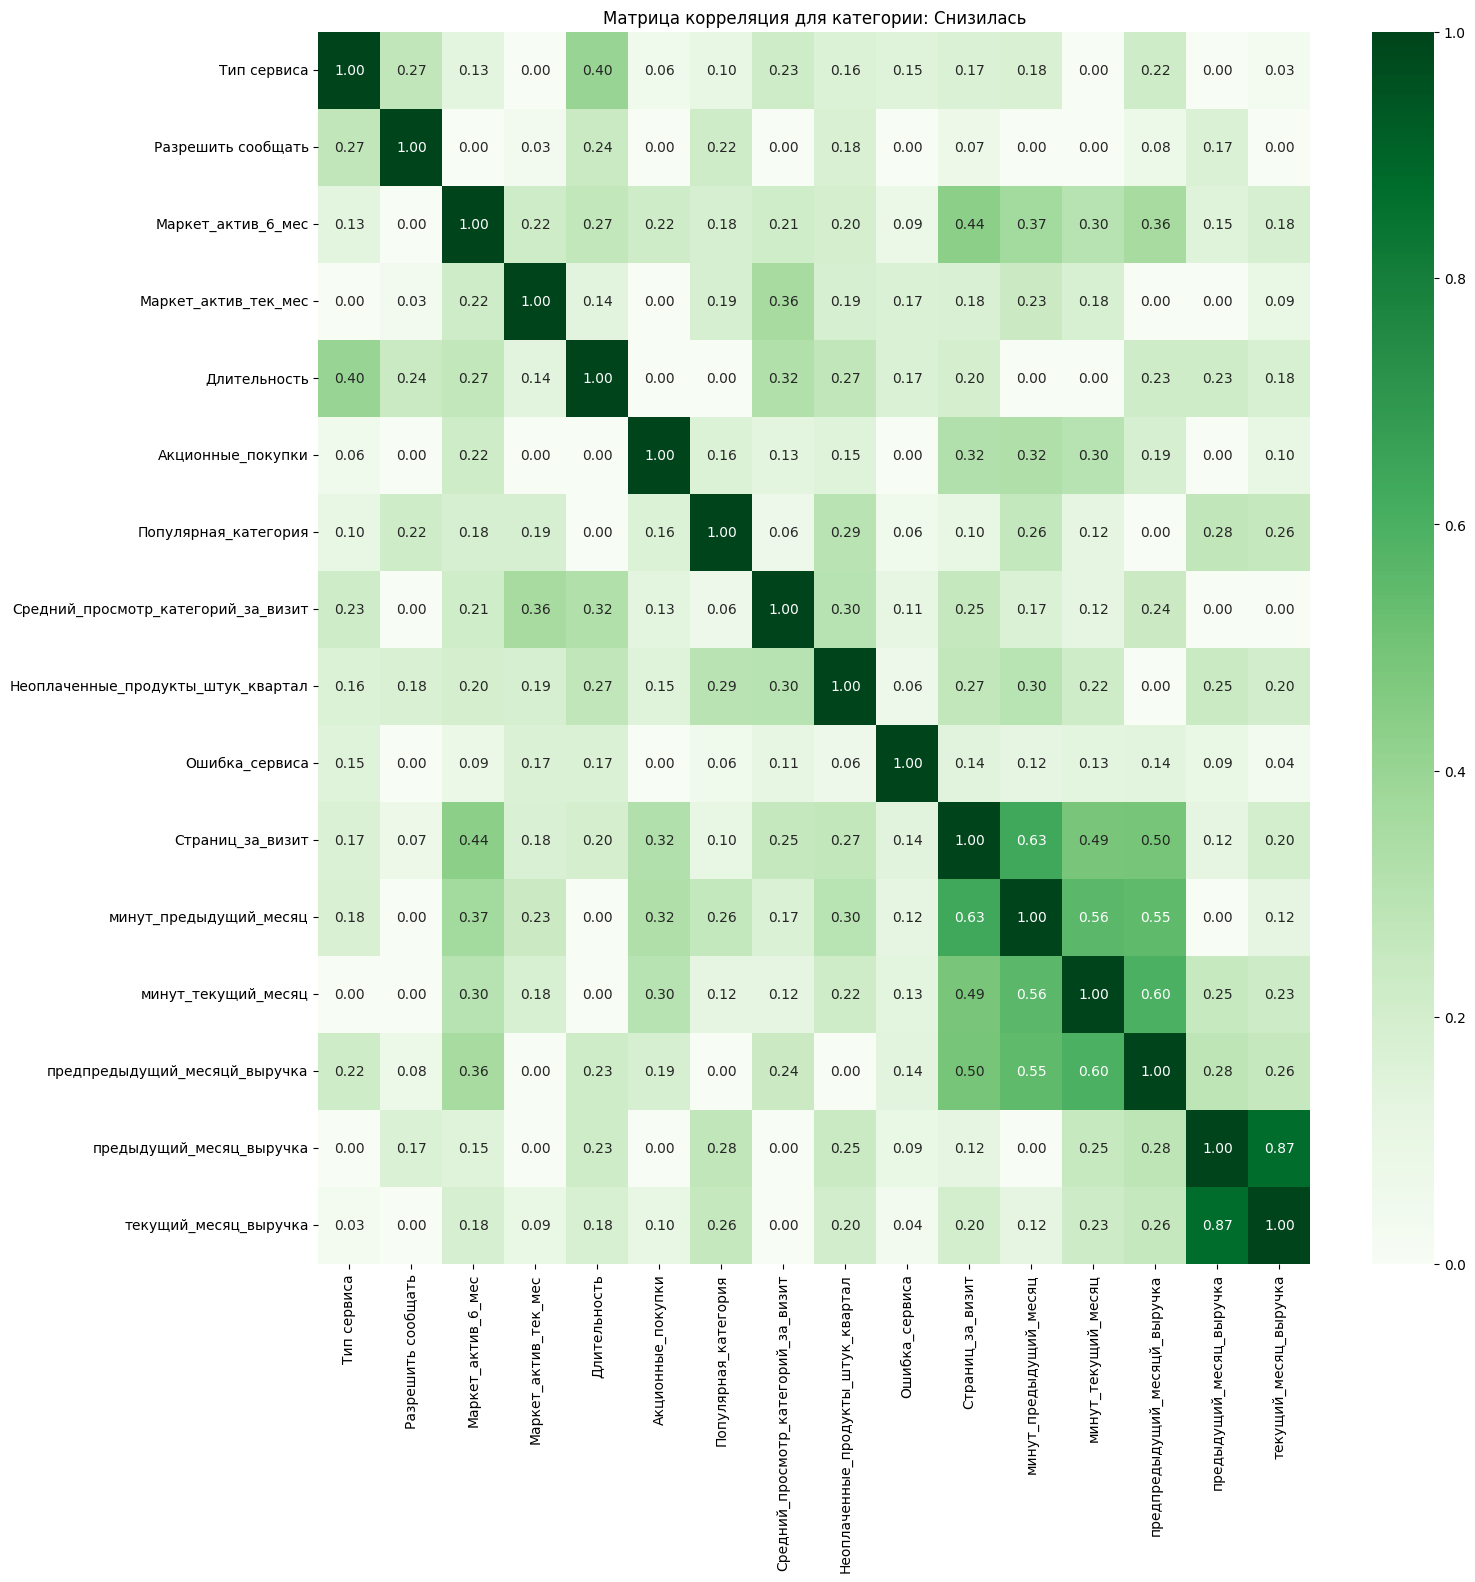

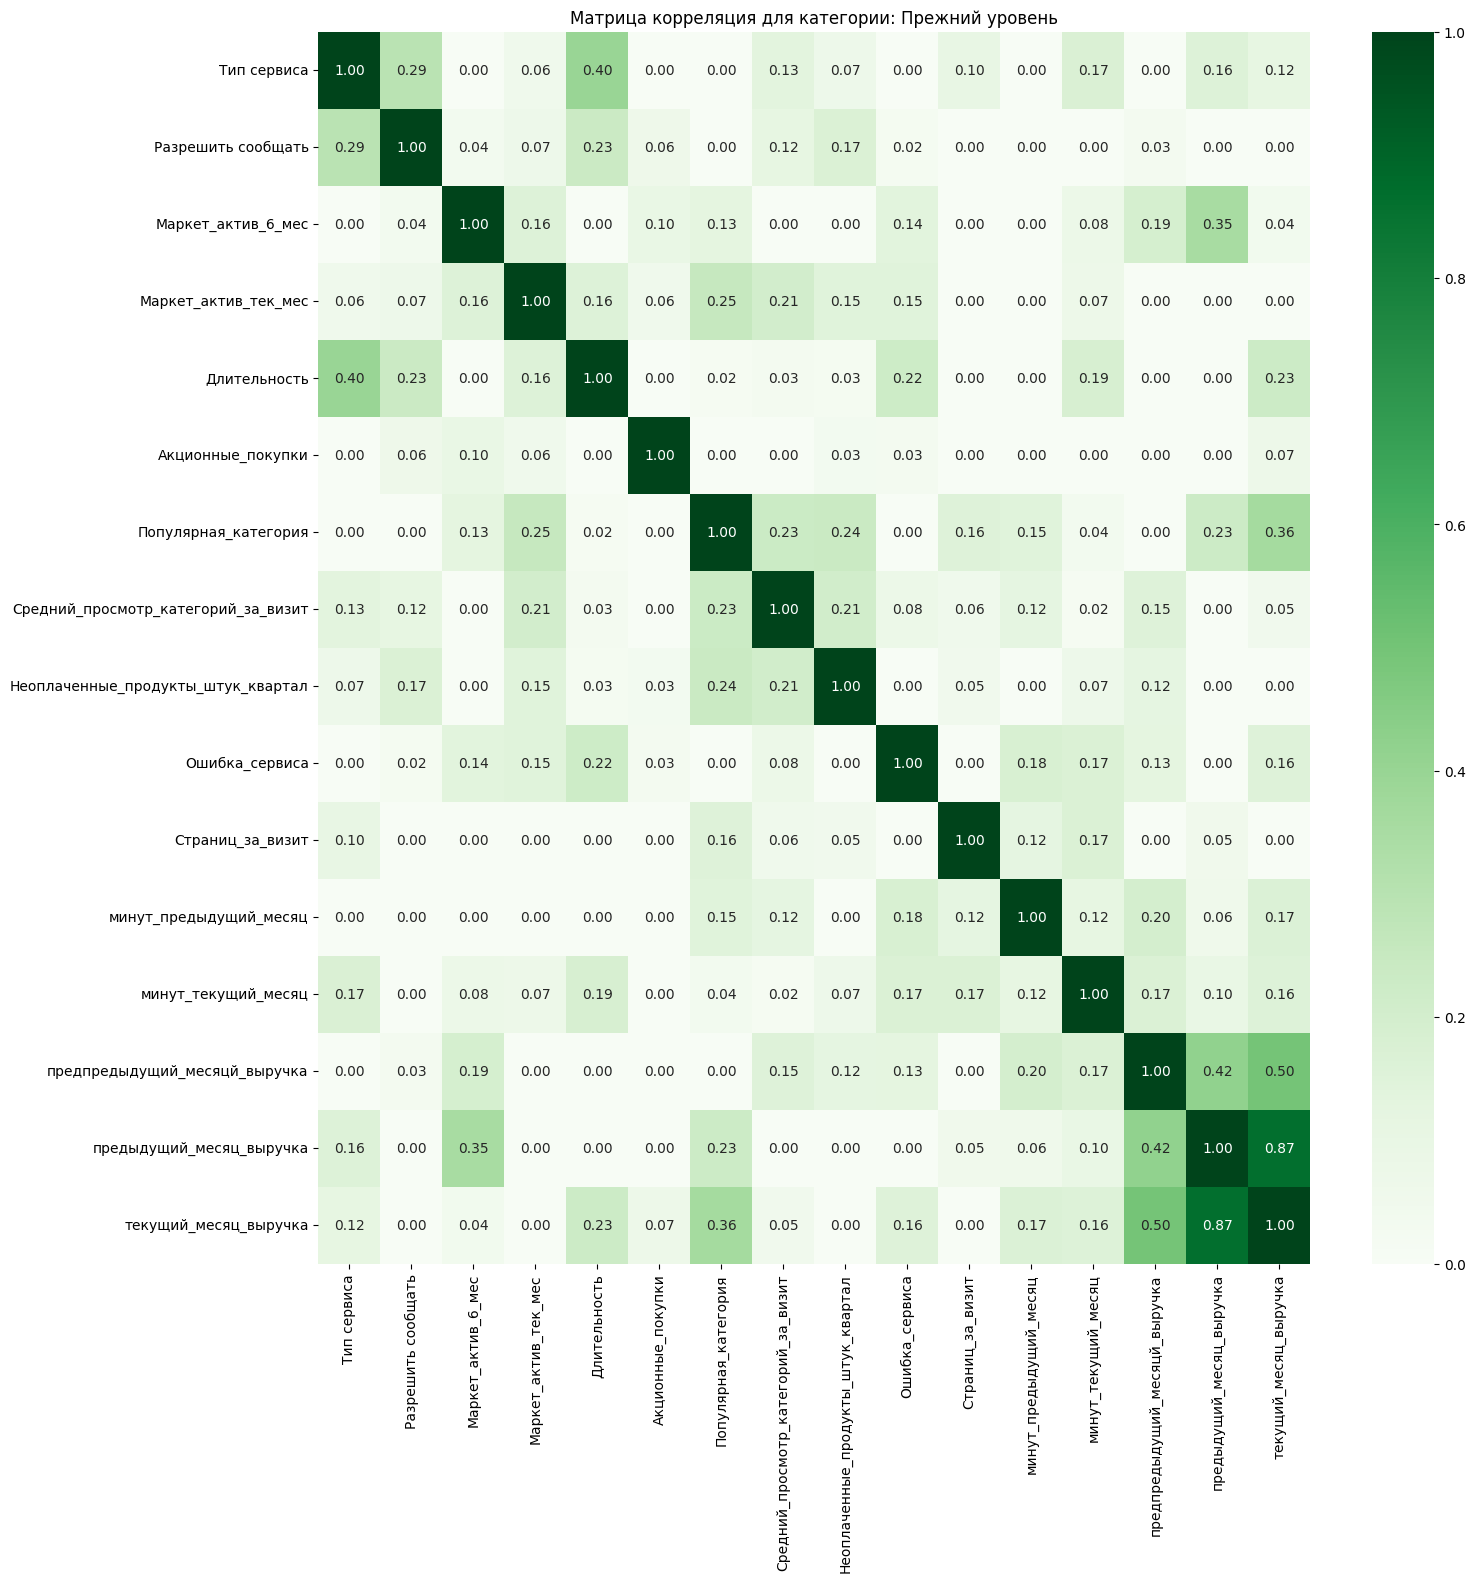

In [38]:
for i in ['Снизилась', 'Прежний уровень']:
    df_no_id = df_merged[df_merged['Покупательская активность'] == i].drop('id', axis = 1)
    columns = df_no_id.select_dtypes(include = 'object').columns.tolist() 
    plt.figure(figsize = (16, 16))
    plt.title('Матрица корреляция для категории: '+i)
    sns.heatmap(df_no_id.phik_matrix(), annot = True, cmap = "Greens", fmt = '.2f');

In [39]:
df_no_id

Покупательская активность Тип сервиса Разрешить сообщать  \
396            Прежний уровень    стандарт                нет   
397            Прежний уровень     премиум                 да   
398            Прежний уровень    стандарт                 да   
399            Прежний уровень    стандарт                 да   
400            Прежний уровень    стандарт                нет   
...                        ...         ...                ...   
1291           Прежний уровень    стандарт                 да   
1292           Прежний уровень    стандарт                нет   
1293           Прежний уровень    стандарт                 да   
1294           Прежний уровень    стандарт                 да   
1295           Прежний уровень     премиум                 да   

      Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
396                  4.3                     4           534   
397                  5.8                     5           624   
398                  4.8                     5           634   
399                  4.1                     4           957   
400                  4.0                     4           475   
...                  ...                   ...           ...   
1291                 6.6                     3           318   
1292                 5.1                     4           454   
1293                 4.1                     3           586   
1294                 6.3                     5           645   
1295                 4.0                     5           906   

      Акционные_покупки                  Популярная_категория  \
396                0.18                       Кухонная посуда   
397                0.30        Техника для красоты и здоровья   
398                0.21                      Товары для детей   
399                0.17        Техника для красоты и здоровья   
400                0.30  Мелкая бытовая техника и электроника   
...                 ...                                   ...   
1291               0.24        Техника для красоты и здоровья   
1292               0.21                     Домашний текстиль   
1293               0.20                     Домашний текстиль   
1294               0.12        Техника для красоты и здоровья   
1295               0.94        Техника для красоты и здоровья   

      Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
396                                     3                                   1   
397                                     4                                   3   
398                                     4                                   5   
399                                     5                                   2   
400                                     3                                   3   
...                                   ...                                 ...   
1291                                    5                                   3   
1292                                    6                                   2   
1293                                    3                                   2   
1294                                    3                                   3   
1295                                    4                                   5   

      Ошибка_сервиса  Страниц_за_визит  минут_предыдущий_месяц  \
396                4                10                    13.0   
397                6                14                    14.0   
398                3                10                    13.0   
399                6                 9                    14.0   
400                7                 7                    13.0   
...              ...               ...                     ...   
1291               3                11                    14.0   
1292               3                 9                    12.0   
1293               5                 7                    12.0   
1294               5                 7   

**Вывод по блоку:**
- Наблюдается хорошая корреляция между целевым признаком(Покупательская активность) и неколькоми колонками: 
    - Маркет_актив_6_мес
    - Акционные_покупки
    - Средний_просмотр_категорий_за_визит
    - Неоплаченные_продукты_штук_квартал
    - Страниц_за_визит
    - минут_предыдущий_месяц
    - минут_текущий_месяц 
    - предпредыдущий_месяцй_выручка
- Сильно высокой коллениарности нет
- Мультиколлинеарности  оттсуствует 

### Доп анализ по типу активности

In [40]:
df_down = df_merged[df_merged['Покупательская активность'] == 'Снизилась']
df_normal = df_merged[df_merged['Покупательская активность'] == 'Прежний уровень']

In [41]:
df_down.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215349                 Снизилась     премиум                 да   
1  215350                 Снизилась    стандарт                нет   
2  215351                 Снизилась    стандарт                 да   
3  215352                 Снизилась    стандарт                нет   
4  215353                 Снизилась    стандарт                 да   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    4   
1    Домашний текстиль                                    5   
2     Товары для детей                                    5   
3     Товары для детей                                    3   
4    Домашний текстиль                                    4   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   минут_предыдущий_месяц  минут_текущий_месяц  предпредыдущий_месяцй_выручка  \
0                    12.0                 10.0                         4472.0   
1                     8.0                 13.0                         4826.0   
2                    11.0                 13.0                         4793.0   
3                     8.0                 11.0                         4594.0   
4                    10.0                 10.0                         5124.0   

   предыдущий_месяц_выручка  текущий_месяц_выручка  
0                    5216.0                 4971.6  
1                    5457.5                 5058.4  
2                    6158.0                 6610.4  
3                    5807.5                 5872.5  
4                    4738.5                 5388.5

In [42]:

df_normal.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
396  215748           Прежний уровень    стандарт                нет   
397  215749           Прежний уровень     премиум                 да   
398  215750           Прежний уровень    стандарт                 да   
399  215751           Прежний уровень    стандарт                 да   
400  215752           Прежний уровень    стандарт                нет   

     Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  \
396                 4.3                     4           534   
397                 5.8                     5           624   
398                 4.8                     5           634   
399                 4.1                     4           957   
400                 4.0                     4           475   

     Акционные_покупки                  Популярная_категория  \
396               0.18                       Кухонная посуда   
397               0.30        Техника для красоты и здоровья   
398               0.21                      Товары для детей   
399               0.17        Техника для красоты и здоровья   
400               0.30  Мелкая бытовая техника и электроника   

     Средний_просмотр_категорий_за_визит  Неоплаченные_продукты_штук_квартал  \
396                                    3                                   1   
397                                    4                                   3   
398                                    4                                   5   
399                                    5                                   2   
400                                    3                                   3   

     Ошибка_сервиса  Страниц_за_визит  минут_предыдущий_месяц  \
396               4                10                    13.0   
397               6                14                    14.0   
398               3                10                    13.0   
399               6                 9                    14.0   
400               7                 7                    13.0   

     минут_текущий_месяц  предпредыдущий_месяцй_выручка  \
396                 13.0                         4552.0   
397                 17.0                         4928.0   
398                 14.0                         4730.0   
399                 12.0                         4769.0   
400                  8.0                         4635.0   

     предыдущий_месяц_выручка  текущий_месяц_выручка  
396                    5083.0                 5673.2  
397                    5190.0                 5092.5  
398                    3319.0                 4672.3  
399                    5340.0                 5021.5  
400                    5188.5                 5798.2

In [43]:
def histogram(df, column, title=None, bins=100, ax=None):
    '''
    Функция для построения гистограммы с линиями медианы и среднего
    '''
    mediana = df[column].median()
    meaned = df[column].mean()
    df[column].hist(bins=bins, ax=ax)
    ax.axvline(mediana, linestyle='--', color='red', label=f'Медиана: {mediana:.2f}')
    ax.axvline(meaned, linestyle='--', color='green', label=f'Среднее: {meaned:.2f}')
    ax.set_ylabel('Количество')
    ax.set_xlabel(column)
    ax.set_title(f'Гистограмма {title}', fontsize=16)
    ax.legend()
    
def subploted(df1, df2, column, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 9))
    histogram(df1, column, title1, bins=20, ax=axes[0])
    histogram(df2, column, title2, bins=20, ax=axes[1])
    plt.tight_layout()  # Добавляем для избежания наложения графиков
    plt.show()

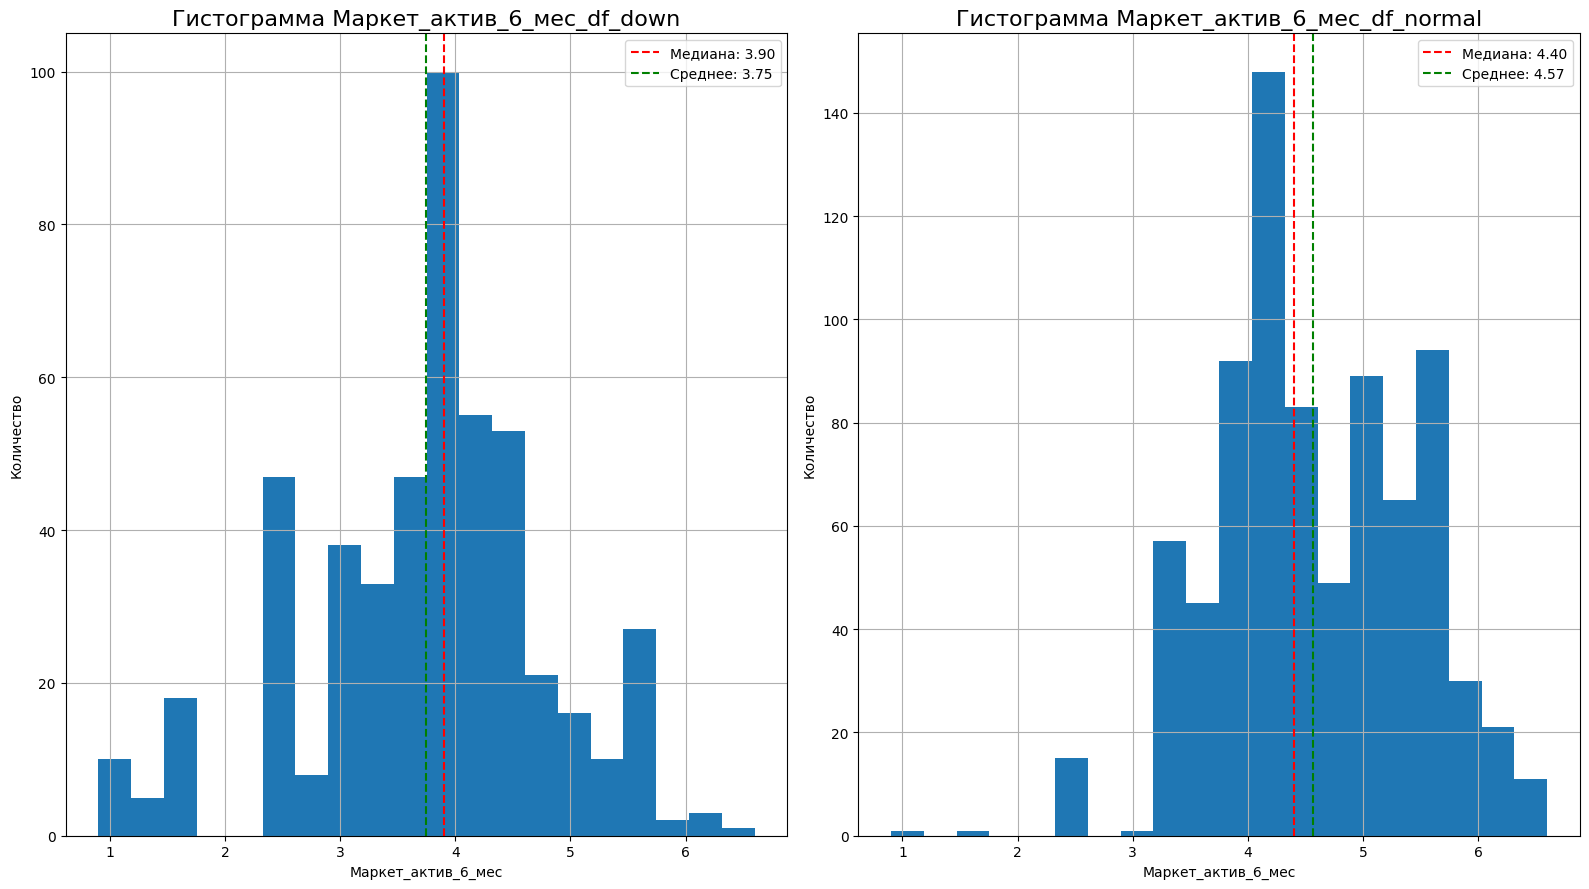

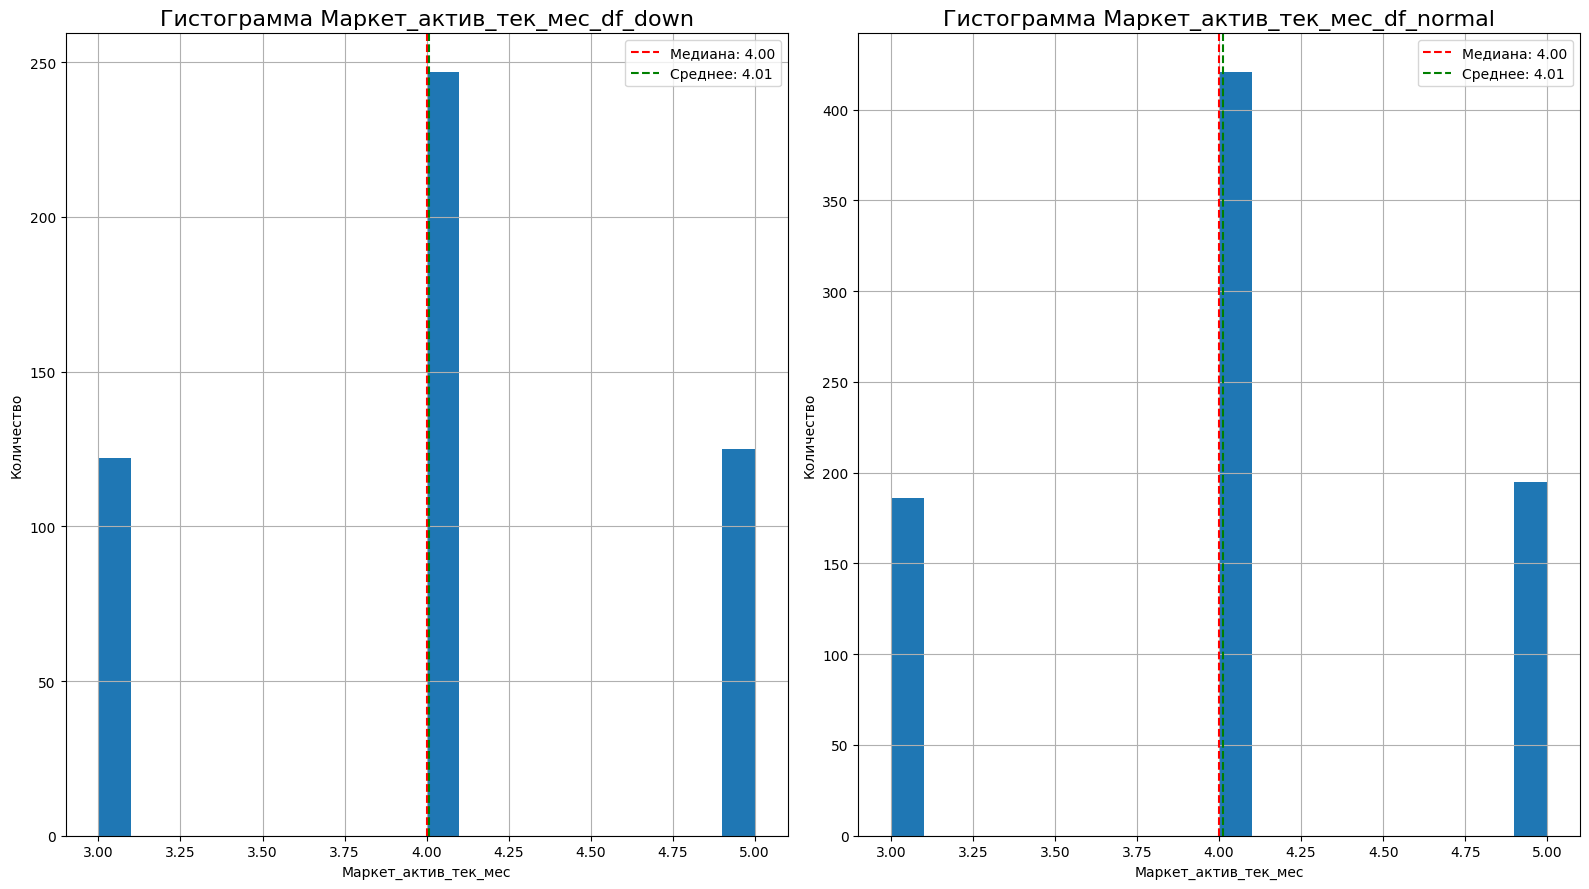

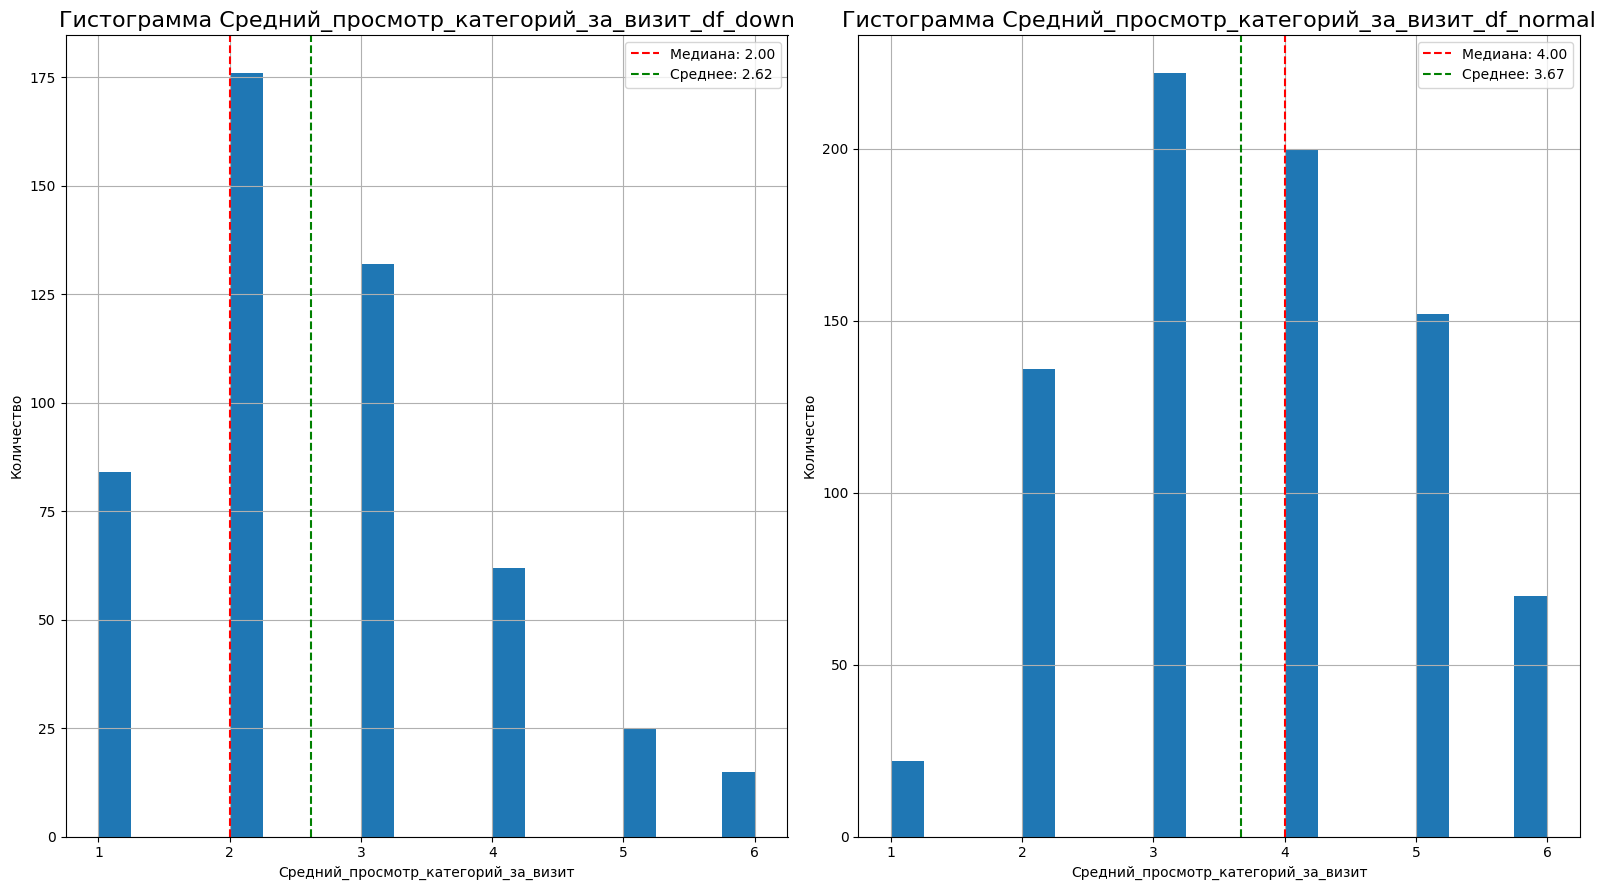

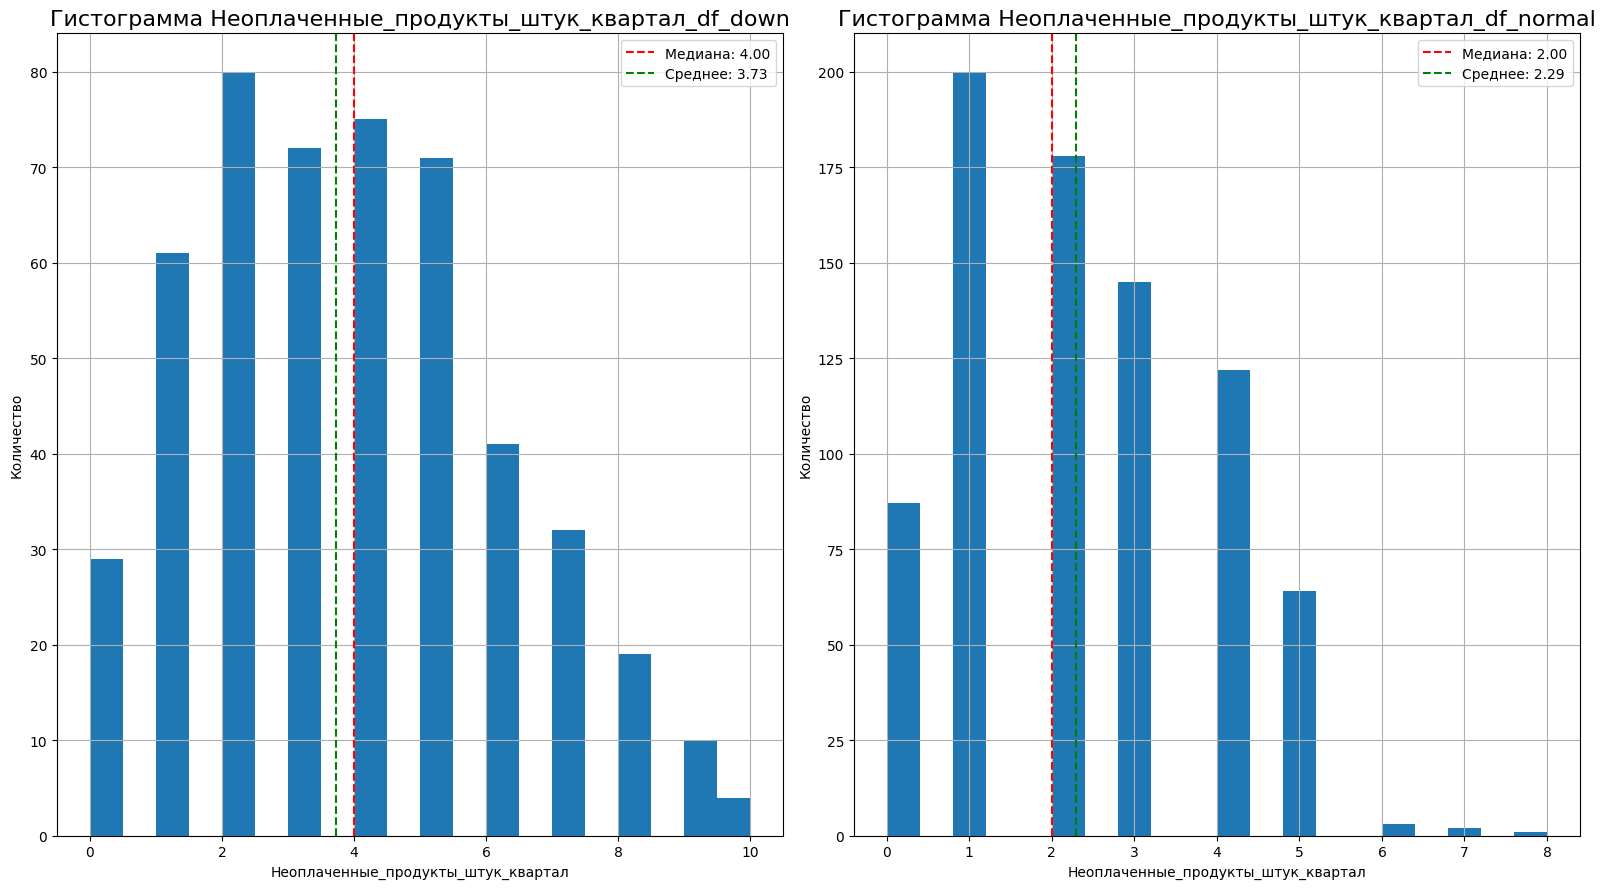

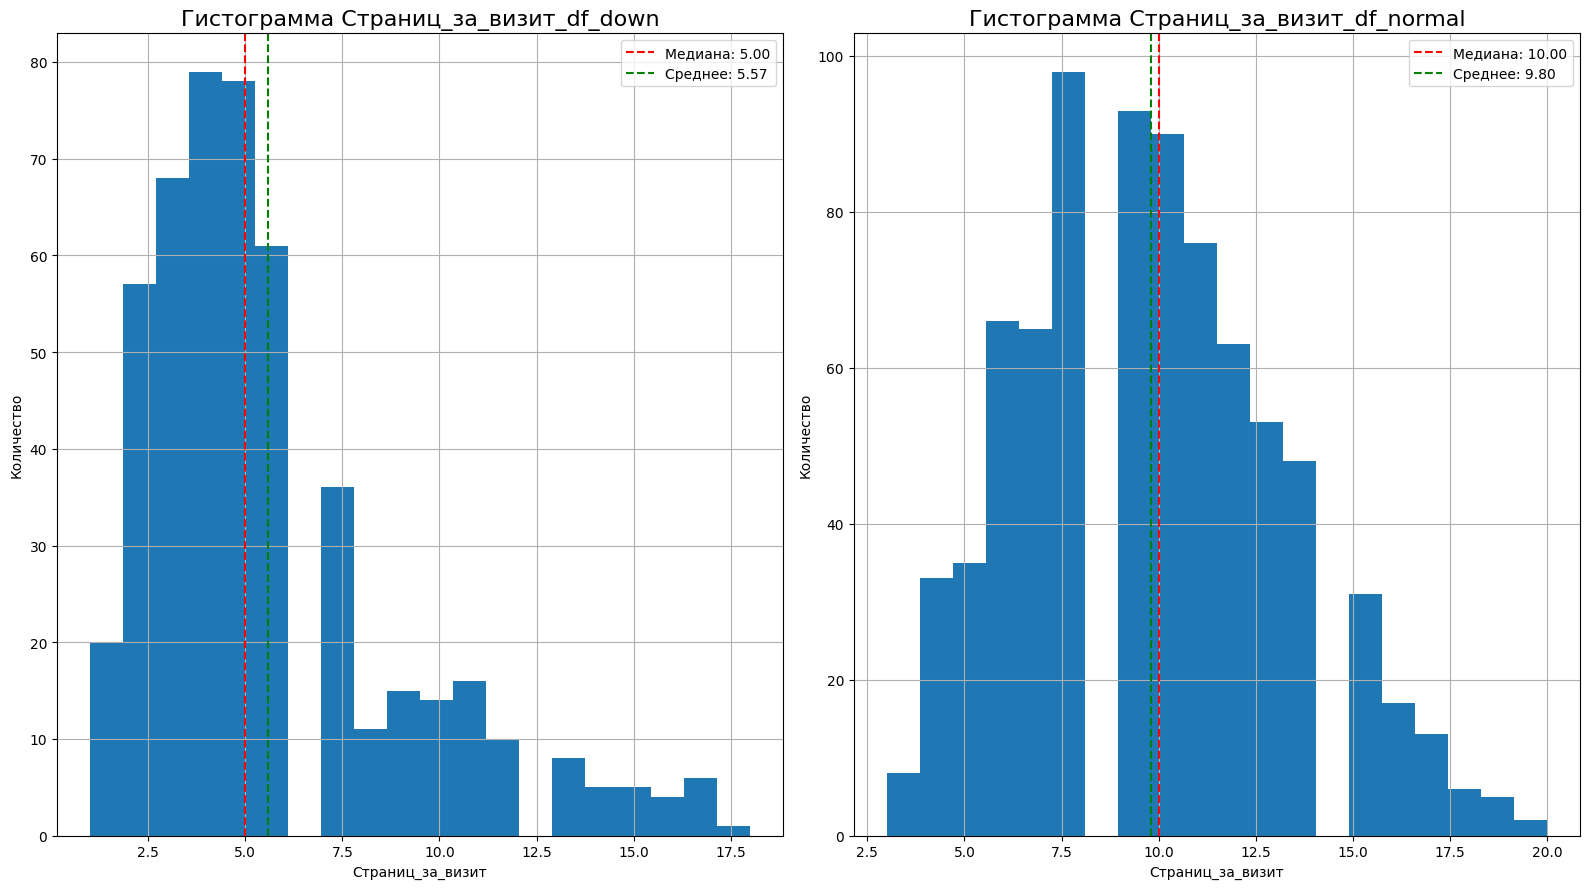

In [44]:
for column in ['Маркет_актив_6_мес', 
               'Маркет_актив_тек_мес', 
               'Средний_просмотр_категорий_за_визит', 
               'Неоплаченные_продукты_штук_квартал', 
               'Страниц_за_визит']:
    title1 = column + '_df_down'
    title2 = column + '_df_normal'
    subploted(df_down, df_normal, column, title1, title2)

**Вывод по блоку:**
- Наблюдается хорошая корреляция между целевым признаком(Покупательская активность) и неколькоми колонками: 
    - Маркет_актив_6_мес
    - Акционные_покупки
    - Средний_просмотр_категорий_за_визит
    - Неоплаченные_продукты_штук_квартал
    - Страниц_за_визит
    - минут_предыдущий_месяц
    - минут_текущий_месяц 
    - предпредыдущий_месяцй_выручка
- Сильно высокой коллениарности нет
- Мультиколлинеарности  оттсуствует 

**Анализ покупателя по типу активности**

`Маркет_актив_6_мес`
- Прежняя активность: средняя активность составляет 4.75 
- Снизилась активность: средняя активность составляет 3.9


`Маркет_актив_тек_мес`:
- В текузем месяце примерно одинаковая маркетинговая активность

`Средний_просмотр_категорий_за_визит` 
- Прежняя активность: Просматривают по 3-4 категории за визит, в большем случае по 4
- Снизилась активность: Такие пользователи просматриваю по 2-3 категории, но в большем случае по 2

`Неоплаченные_продукты_штук_квартал`
- Прежняя активность: Пользователи в целом у пользователей по 2 неоплаченных товаров
- Снизилась активность: У этих пользователей достаточно много неоплаченных покупок, есть те, у кого даже по 10, но в среднем по 4

`Страниц_за_визит`
- Прежняя активность: Пользователи данного сегмента просматривают по 10 страниц
- Снизилась активность: Пользователи просматривают в среднем по 5 страниц, в 2 раза меньше, чем с прежней активностью

## Использование пайплайнов

In [45]:
RANDOM_STATE = 42 #Отвечаем на главный вопрос жизни)

In [46]:
# Преобразуем признак акционные покупки в категориальный, так как у нас люди делятся на две группы
df_merged['Акционные_покупки'] = df_merged['Акционные_покупки'].apply(lambda x: 'больше_по_акции' if x > 0.5 else 'любые_покупки')
df_merged['Покупательская активность'] = df_merged['Покупательская активность'].apply(lambda x: 1 if x=='Прежний уровень' else 0)

In [47]:
display(df_merged['Акционные_покупки'].value_counts())
df_merged['Покупательская активность'].value_counts()

Акционные_покупки
любые_покупки      1129
больше_по_акции     167
Name: count, dtype: int64

Покупательская активность
1    802
0    494
Name: count, dtype: int64

In [48]:
df_merged = df_merged.set_index('id')
X = df_merged.drop('Покупательская активность', axis = 1)
y = df_merged['Покупательская активность']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE, test_size = 0.25)

In [50]:
ohe_columns = ['Тип сервиса', 'Разрешить сообщать', 'Акционные_покупки']
num_columns = X_train.select_dtypes(include = 'number').columns.to_list()
ord_columns = ['Популярная_категория']

In [51]:
ohe_pipeline = Pipeline([
    ('ohe', OneHotEncoder(drop = 'first', handle_unknown = 'ignore', sparse_output = False))
]
)
ohe_pipeline # Я вывожу pipeline, чтобы посмотреть как это выглядит, так как через визуалицию воспринимаю чуточку лучше

Pipeline(steps=[('ohe',
                 OneHotEncoder(drop='first', handle_unknown='ignore',
                               sparse_output=False))])

In [52]:
num_pipeline = Pipeline([
    ('num', MinMaxScaler())
]
)
num_pipeline

Pipeline(steps=[('num', MinMaxScaler())])

In [53]:
ord_pipeline = Pipeline([
    ('simpleImputer_befor_ord', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')),                  
    ('ord', OrdinalEncoder(categories = [['Домашний текстиль','Косметика и аксесуары', 'Кухонная посуда', 'Мелкая бытовая техника и электроника', 'Техника для красоты и здоровья', 'Товары для детей']], handle_unknown='use_encoded_value', unknown_value=np.nan)),
    ('simpleImputer_after_ord', SimpleImputer(missing_values = np.nan, strategy = 'most_frequent'))
]
)
ord_pipeline

Pipeline(steps=[('simpleImputer_befor_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['Домашний текстиль',
                                             'Косметика и аксесуары',
                                             'Кухонная посуда',
                                             'Мелкая бытовая техника и '
                                             'электроника',
                                             'Техника для красоты и здоровья',
                                             'Товары для детей']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])

In [54]:
preprocessor_pipeline  = ColumnTransformer([
    ('ord', ord_pipeline, ord_columns),
    ('num', num_pipeline, num_columns),
    ('ohe', ohe_pipeline, ohe_columns)
],
    remainder = 'passthrough'

)
preprocessor_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('ord',
                                 Pipeline(steps=[('simpleImputer_befor_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Домашний '
                                                                              'текстиль',
                                                                              'Косметика '
                                                                              'и '
                                                                              'аксесуары',
                                                                              'Кухонная '
                                                                              'посуда',
                                                                              'Мелкая '
                                                                              'бытовая '
                                                                              'техника '
                                                                              'и '
                                                                              'электроника',
                                                                              'Техника '
                                                                              'для '
                                                                              'красоты '
                                                                              'и '
                                                                              'здоровья',
                                                                              'Товары '
                                                                              'для '
                                                                              'детей']]...
                                  'Неоплаченные_продукты_штук_квартал',
                                  'Ошибка_сервиса', 'Страниц_за_визит',
                                  'минут_предыдущий_месяц',
                                  'минут_текущий_месяц',
                                  'предпредыдущий_месяцй_выручка',
                                  'предыдущий_месяц_выручка',
                                  'текущий_месяц_выручка']),
                                ('ohe',
                                 Pipeline(steps=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Тип сервиса', 'Разрешить сообщать',
                                  'Акционные_покупки'])])

In [55]:
final_pipeline = Pipeline([
    ('preprocessor', preprocessor_pipeline),
    ('models', DecisionTreeClassifier(random_state = RANDOM_STATE))
]
)
final_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_befor_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['Домашний '
                                                                                               'текстиль',
                                                                                               'Косметика '
                                                                                               'и '
                                                                                               'аксесуары',
                                                                                               'Кухонная '
                                                                                               'посуда',
                                                                                               'Мелкая '
                                                                                               'бытовая '
                                                                                               'техника '
                                                                                               'и '
                                                                                               'электроника',
                                                                                               'Техника '
                                                                                               'для '
                                                                                               'красоты '
                                                                                               'и '
                                                                                               '...
                                                   'Страниц_за_визит',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц',
                                                   'предпредыдущий_месяцй_выручка',
                                                   'предыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать',
                                                   'Акционные_покупки'])])),
                ('models', DecisionTreeClassifier(random_state=42))])

In [56]:
param_grid = [
    {
        'models': [DecisionTreeClassifier(random_state = RANDOM_STATE)],
        'models__max_depth': range(2,11),
        'models__max_features': range(2,11),
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), 'passthrough']
    }, 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 31),
        'preprocessor__num' :[MinMaxScaler(), StandardScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state = RANDOM_STATE)],
        'models__degree': range(1,10),
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        
    },
    {
        'models': [LogisticRegression(random_state = RANDOM_STATE, solver = 'liblinear', penalty = 'l1')],
        'models__C': range(1,10),
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), 'passthrough']
    },
    {
        'models': [RandomForestClassifier(random_state = RANDOM_STATE)],
        'models__n_estimators': range(25, 100),
        'models__max_depth': range(2,11),
        'models__max_features': range(2,11),
        'preprocessor__num': [MinMaxScaler(), StandardScaler(), 'passthrough']
    }
]

In [57]:
randomized_search = RandomizedSearchCV(
    final_pipeline,
    param_grid,
    n_jobs = -1,
    cv = 5, 
    random_state = RANDOM_STATE,
    scoring = 'roc_auc'
)

In [58]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ord',
                                                                               Pipeline(steps=[('simpleImputer_befor_ord',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ord',
                                                                                                OrdinalEncoder(categories=[['Домашний '
                                                                                                                            'текстиль',
                                                                                                                            'Косметика '
                                                                                                                            'и '
                                                                                                                            'аксесуары',
                                                                                                                            'Кухонная '
                                                                                                                            'посуда',
                                                                                                                            'Мелкая '
                                                                                                                            'бытовая '
                                                                                                                            'техника '
                                                                                                                            'и '
                                                                                                                            'электр...
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [MinMaxScaler(),
                                                               StandardScaler(),
                                                               'passthrough']},
                                        {'models': [RandomForestClassifier(random_state=42)],
                                         'models__max_depth': range(2, 11),
                                         'models__max_features': range(2, 11),
                                         'models__n_estimators': range(25, 100),
                                         'preprocessor__num': [MinMaxScaler(),
                                                               StandardScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [59]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)


Лучшая модель и её параметры:

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_befor_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['Домашний '
                                                                                               'текстиль',
                                                                                               'Косметика '
                                                                                               'и '
                                                                                               'аксесуары',
            

In [60]:
y_pred = randomized_search.predict(X_test)
y_proba = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика f1_score: {f1_score(y_test, y_pred):.2f}')
print(f'Метрика roc_auc: {roc_auc_score(y_test, y_proba):.2f}')

Метрика f1_score: 0.91
Метрика roc_auc: 0.91


**Вывод:** 
- У модели достаточно хорошие метрики(Самая важная метрика здесь является roc_auc_score, так как она не зависит от дисбаланса классов, в нашей задаче присутствует дисбаланс, поэтому судям в основном по ROC_AUC):
    - f1: 0.91
    - roc_auc: 0.91
- Модель хорошо обучилась на тренрировочной выборке, благодаря методу RandomSearchCV была выбрана наилучшая модель
``RandomForestClassifier(max_depth=8, max_features=10, n_estimators=51, random_state=42)``

## Анализ важности признаков

In [61]:
model = randomized_search.best_estimator_.named_steps['models']
model

RandomForestClassifier(max_depth=9, max_features=7, n_estimators=59,
                       random_state=42)

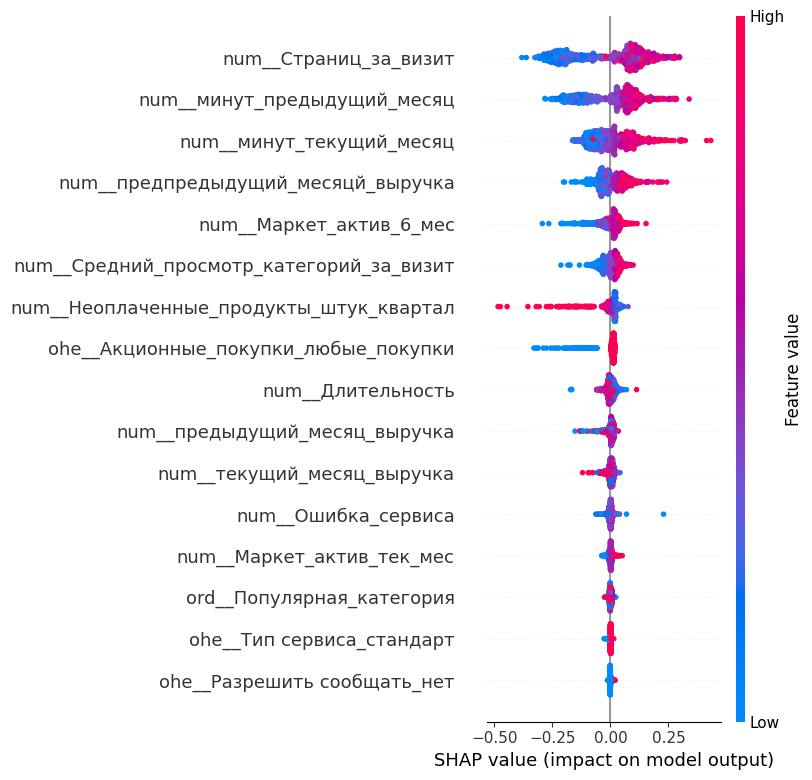

In [62]:
preprocessor_to_use = randomized_search.best_estimator_.named_steps['preprocessor']
columns_feature = preprocessor_to_use.get_feature_names_out().tolist() # Формируем список имён признаков после трансформации
X_train_transformed = preprocessor_to_use.transform(X_train)
X_test_transformed = preprocessor_to_use.transform(X_test)
explainer = shap.TreeExplainer(model) # Explainer для деревьев
shap_values = explainer.shap_values(X_train_transformed)
shap_class_1 = shap_values[:, :, 1] # Берём первый класс
shap.summary_plot(shap_class_1, X_train_transformed, feature_names=columns_feature)

In [63]:
model_best_pipe = randomized_search.best_estimator_
model_best_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_befor_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(categories=[['Домашний '
                                                                                               'текстиль',
                                                                                               'Косметика '
                                                                                               'и '
                                                                                               'аксесуары',
                                                                                               'Кухонная '
                                                                                               'посуда',
                                                                                               'Мелкая '
                                                                                               'бытовая '
                                                                                               'техника '
                                                                                               'и '
                                                                                               'электроника',
                                                                                               'Техника '
                                                                                               'для '
                                                                                               'красоты '
                                                                                               'и '
                                                                                               '...
                                                   'минут_текущий_месяц',
                                                   'предпредыдущий_месяцй_выручка',
                                                   'предыдущий_месяц_выручка',
                                                   'текущий_месяц_выручка']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Тип сервиса',
                                                   'Разрешить сообщать',
                                                   'Акционные_покупки'])])),
                ('models',
                 RandomForestClassifier(max_depth=9, max_features=7,
                                        n_estimators=59, random_state=42))])

**Вывод:** 
-- Интерпретация по признакам

--- `num_Страниц за визит`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Чем больше страниц пользователь просматривает за один визит, тем больше вероятность положительного исхода (например, высокой выручки). Однако есть случаи, когда большое количество просмотренных страниц может иметь негативное влияние.

--- `num_минут предыдущий месяц`
- **SHAP value**: Преобладают положительные значения SHAP.  
- **Interpretation**: Больше времени, проведенного на платформе в предыдущем месяце, положительно влияет на предсказание модели.

--- `num_минут текущий месяц`
- **SHAP value**: Преобладают положительные значения SHAP.  
- **Interpretation**: Похоже на предыдущий признак: больше времени в текущем месяце также положительно влияет на предсказание.

--- `num_предыдущий месяц выручка`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Выручка в предыдущем месяце имеет важное значение для предсказания. Высокая выручка в прошлом месяце обычно предполагает высокую выручку в текущем месяце.

--- `num_Маркет актив 6 мес`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Активность на маркете за последние 6 месяцев положительно влияет на предсказание.

--- `num_Средний просмотр категорий за визит`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Чем больше среднее количество просмотренных категорий за визит, тем выше вероятность положительного исхода.

--- `num_Неоплаченные продукты штук квартал`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Больше неоплаченных продуктов в квартале может быть связано с повышенной вероятностью положительного исхода, возможно из-за большого интереса к продуктам.

--- `ohe_Акционные покупки любые покупки`
- **SHAP value**: Преобладают положительные значения SHAP.  
- **Interpretation**: Покупки по акциям или любые другие покупки положительно влияют на предсказание.

--- `num_Длительность`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Длительность (возможно, время использования сервиса или другой метрики) имеет важное значение для предсказания.

--- `num_текущий месяц выручка`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Выручка в текущем месяце имеет важное значение для предсказания.

--- `num_Ошибки сервиса`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают отрицательные.  
- **Interpretation**: Больше ошибок сервиса негативно влияет на предсказание. Это логично, так как проблемы с сервисом могут привести к снижению доверия клиентов и, соответственно, к снижению выручки.

--- `num_Маркет актив тек мес`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Активность на маркете в текущем месяце положительно влияет на предсказание.

--- `ord_Популярная категория`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Популярные категории товаров или услуг положительно влияют на предсказание.

--- `ohe_Тип сервиса стандарт`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают положительные.  
- **Interpretation**: Стандартный тип сервиса имеет важное значение для предсказания.

--- `ohe_Разрешить сообщать нет`
- **SHAP value**: Распределение SHAP values имеет как положительные, так и отрицательные значения, но преобладают отрицательные.  
- **Interpretation**: Отсутствие разрешения на отправку сообщений негативно влияет на предсказание. Возможно, это связано с меньшей коммуникацией с клиентами.

-- Выводы

--- Важные положительные признаки:
- `num_Страниц за визит`  
- `num_минут предыдущий месяц`  
- `num_минут текущий месяц`  
- `num_предыдущий месяц выручка`  
- `num_Маркет актив 6 мес`  
- `num_Средний просмотр категорий за визит`  
- `num_Неоплаченные продукты штук квартал`  
- `ohe_Акционные покупки любые покупки`  
- `num_Длительность`  
- `num_текущий месяц выручка`  
- `num_Маркет актив тек мес`  
- `ord_Популярная категория`  
- `ohe_Тип сервиса стандарт`  

--- Важные негативные признаки:
- `num_Ошибки сервиса`  
- `ohe_Разрешить сообщать нет`  

-- Рекомендации

1. **Улучшение качества сервиса**  
   Снижение числа ошибок (`num_Ошибки сервиса`) может существенно повысить качество предсказаний и, возможно, увеличить выручку.

2. **Активизация клиентов**  
   Увеличение времени на сайте (`num_минут предыдущий месяц`, `num_минут текущий месяц`), числа просмотренных страниц (`num_Страниц за визит`) и активности на маркете (`num_Маркет актив 6 мес`, `num_Маркет актив тек мес`) может положительно повлиять на результаты.

3. **Коммуникация с клиентами**  
   Разрешение на отправку сообщений (`ohe_Разрешить сообщать нет`) может улучшить взаимодействие с клиентами и повысить эффективность маркетинговых кампаний.

4. **Акции и популярные категории**  
   Продвижение акционных товаров (`ohe_Акционные покупки любые покупки`) и популярных категорий (`ord_Популярная категория`) может стимулировать продажи.



<br>Как можно использовать модель для принятия бизнес решения?</br>
<br>Можно спрогнозировать с помощью модели клиентов, у которых может снизится покупательская активность, таким образом, им можно будет предложить какие-то бонусы, чтобы их уровень покупательской активности сохранился или даже вырос</br>

## Сегментация

In [64]:
X_train_proba = model_best_pipe.predict_proba(X_train)[:,0]
X_test_proba = model_best_pipe.predict_proba(X_test)[:,0]

In [65]:
X_train_ = X_train.copy()
X_test_ = X_test.copy()
X_train_['вероятность снижения'] = X_train_proba
X_test_['вероятность снижения'] = X_test_proba

In [66]:
X_full = pd.concat([X_train_, X_test_])

In [79]:
X_full.head()

Тип сервиса Разрешить сообщать  Маркет_актив_6_мес  \
id                                                          
216580    стандарт                 да                 4.3   
215897    стандарт                 да                 3.9   
215618    стандарт                нет                 4.1   
215679    стандарт                нет                 5.5   
216150    стандарт                 да                 4.3   

        Маркет_актив_тек_мес  Длительность Акционные_покупки  \
id                                                             
216580                     4           514     любые_покупки   
215897                     4           627     любые_покупки   
215618                     5           657     любые_покупки   
215679                     3           712   больше_по_акции   
216150                     4           283     любые_покупки   

       Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                 
216580    Домашний текстиль                                    3   
215897     Товары для детей                                    3   
215618     Товары для детей                                    2   
215679    Домашний текстиль                                    2   
216150      Кухонная посуда                                    3   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
216580                                   3               3                 9   
215897                                   3               7                 8   
215618                                   6               2                 4   
215679                                   0               6                11   
216150                                   4               5                14   

        минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                    
216580                    19.0                 13.0   
215897                    17.0                 12.0   
215618                    10.0                  7.0   
215679                    18.0                 18.0   
216150                    10.0                 10.0   

        предпредыдущий_месяцй_выручка  предыдущий_месяц_выручка  \
id                                                                
216580                         4818.0                    5400.0   
215897                         4460.0                    5004.5   
215618                         4441.0                    5612.5   
215679                         5315.0                    4541.0   
216150                         4979.0                    5789.0   

        текущий_месяц_выручка  вероятность снижения  
id                                                   
216580                 6034.4              0.072699  
215897                 5606.4              0.503928  
215618                 6103.9              0.999692  
215679                 5341.8              0.693611  
216150                 6621.0              0.072927

In [68]:
df_money.set_index('id', inplace = True)

In [69]:
df_after_predict = X_full.join(df_money)
df_after_predict.head()

Тип сервиса Разрешить сообщать  Маркет_актив_6_мес  \
id                                                          
216580    стандарт                 да                 4.3   
215897    стандарт                 да                 3.9   
215618    стандарт                нет                 4.1   
215679    стандарт                нет                 5.5   
216150    стандарт                 да                 4.3   

        Маркет_актив_тек_мес  Длительность Акционные_покупки  \
id                                                             
216580                     4           514     любые_покупки   
215897                     4           627     любые_покупки   
215618                     5           657     любые_покупки   
215679                     3           712   больше_по_акции   
216150                     4           283     любые_покупки   

       Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                 
216580    Домашний текстиль                                    3   
215897     Товары для детей                                    3   
215618     Товары для детей                                    2   
215679    Домашний текстиль                                    2   
216150      Кухонная посуда                                    3   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
216580                                   3               3                 9   
215897                                   3               7                 8   
215618                                   6               2                 4   
215679                                   0               6                11   
216150                                   4               5                14   

        минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                    
216580                    19.0                 13.0   
215897                    17.0                 12.0   
215618                    10.0                  7.0   
215679                    18.0                 18.0   
216150                    10.0                 10.0   

        предпредыдущий_месяцй_выручка  предыдущий_месяц_выручка  \
id                                                                
216580                         4818.0                    5400.0   
215897                         4460.0                    5004.5   
215618                         4441.0                    5612.5   
215679                         5315.0                    4541.0   
216150                         4979.0                    5789.0   

        текущий_месяц_выручка  вероятность снижения  Прибыль  
id                                                            
216580                 6034.4              0.072699     4.41  
215897                 5606.4              0.503928     6.24  
215618                 6103.9              0.999692     2.77  
215679                 5341.8              0.693611     3.99  
216150                 6621.0              0.072927     4.13

In [70]:
def scatter_proba(column):
    plt.figure(figsize = (12, 10))
    sns.set_style('whitegrid')
    sns.scatterplot(data = df_after_predict, x = 'вероятность снижения', y = 'Прибыль', hue = column);
    plt.title(f'Диаграмма рассеения в зависимости прибыли от вероятности для {column}');

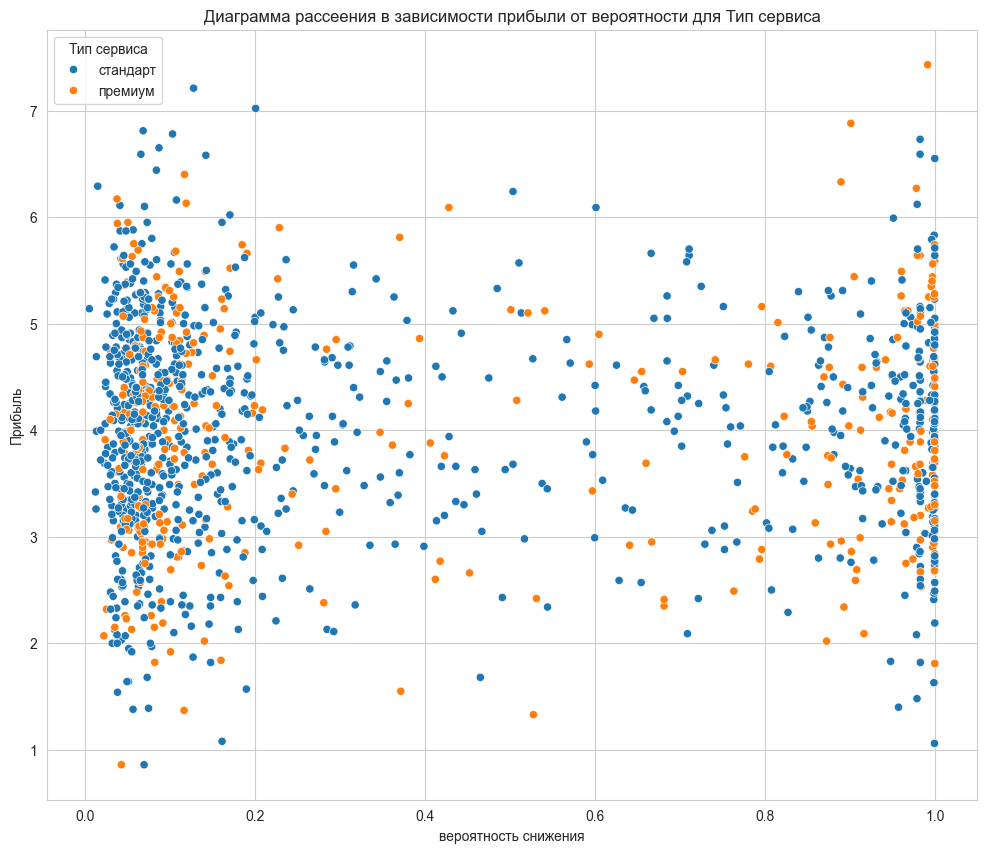

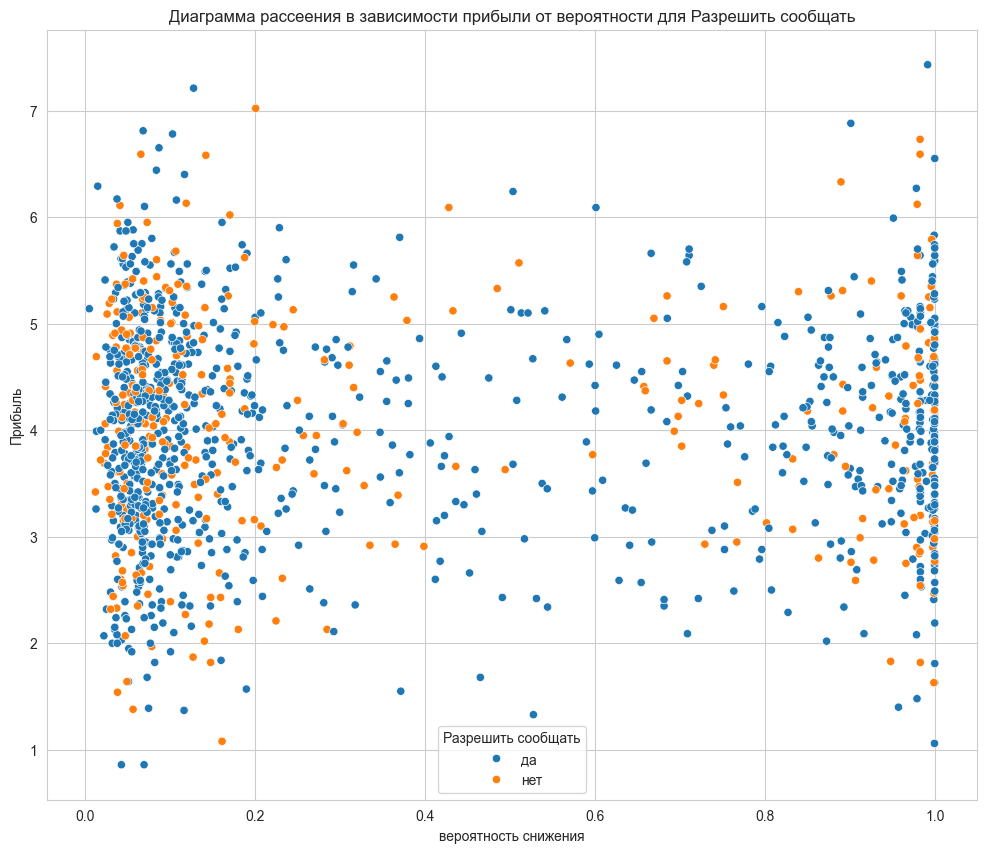

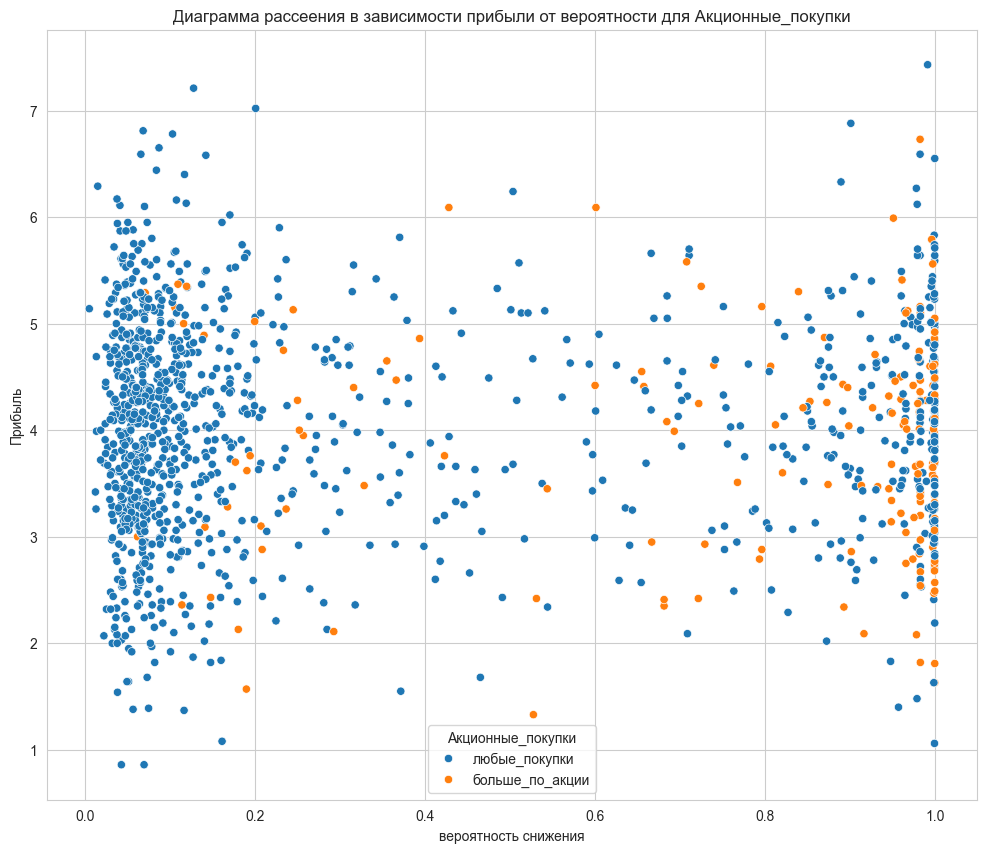

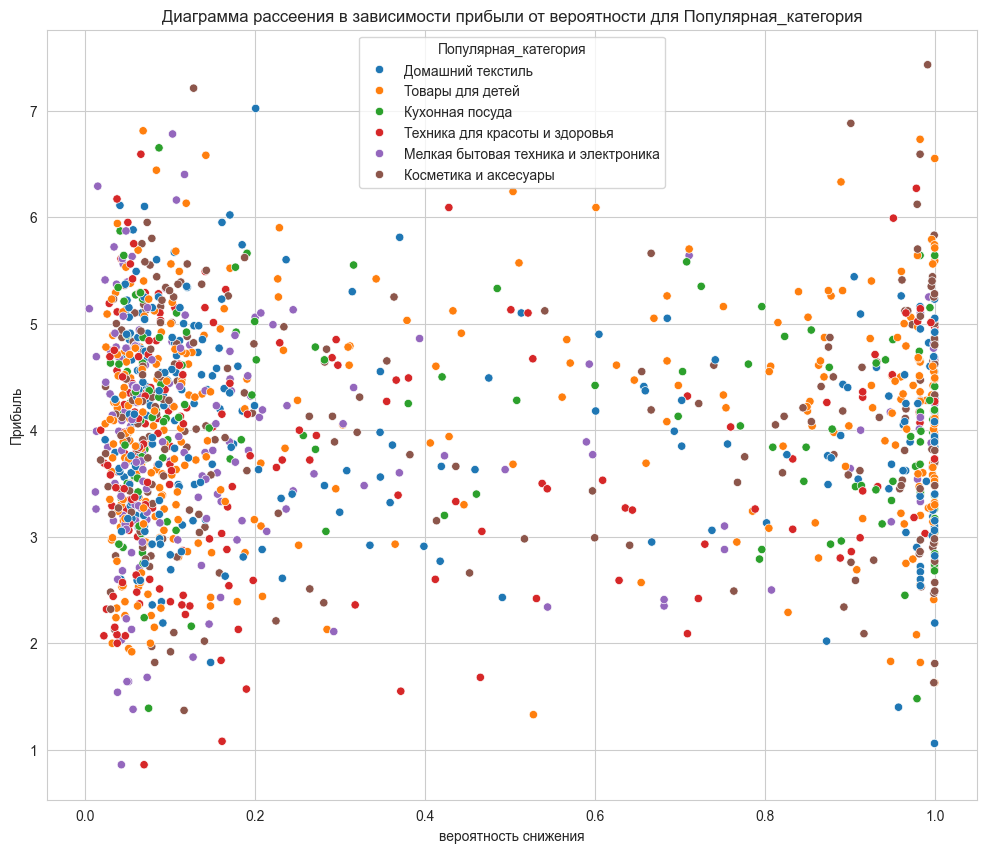

In [71]:
for column in df_after_predict.select_dtypes(exclude = 'number').columns.to_list():
    scatter_proba(column)

На графике с Акционные_покупки видно, что есть чёткое разделение на две группы, с учётом этого совершим сегментацию

In [72]:
df_segment = df_after_predict[(df_after_predict['вероятность снижения'] > 0.8) & (df_after_predict['Акционные_покупки'] =='больше_по_акции')]
df_segment

Тип сервиса Разрешить сообщать  Маркет_актив_6_мес  \
id                                                          
215717    стандарт                 да                 4.8   
215481    стандарт                 да                 3.8   
215612     премиум                нет                 4.4   
215644     премиум                 да                 3.5   
215493    стандарт                 да                 4.0   
...            ...                ...                 ...   
215655    стандарт                 да                 3.9   
215634     премиум                 да                 2.6   
215499    стандарт                 да                 3.4   
215487    стандарт                 да                 4.8   
215641     премиум                 да                 4.1   

        Маркет_актив_тек_мес  Длительность Акционные_покупки  \
id                                                             
215717                     4           507   больше_по_акции   
215481                     3           844   больше_по_акции   
215612                     3           255   больше_по_акции   
215644                     5           929   больше_по_акции   
215493                     5           881   больше_по_акции   
...                      ...           ...               ...   
215655                     4           819   больше_по_акции   
215634                     4           780   больше_по_акции   
215499                     4           842   больше_по_акции   
215487                     3           627   больше_по_акции   
215641                     4           666   больше_по_акции   

                  Популярная_категория  Средний_просмотр_категорий_за_визит  \
id                                                                            
215717           Косметика и аксесуары                                    2   
215481                Товары для детей                                    3   
215612               Домашний текстиль                                    3   
215644  Техника для красоты и здоровья                                    3   
215493                 Кухонная посуда                                    3   
...                                ...                                  ...   
215655                Товары для детей                                    1   
215634           Косметика и аксесуары                                    2   
215499  Техника для красоты и здоровья                                    2   
215487           Косметика и аксесуары                                    5   
215641                Товары для детей                                    2   

        Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  \
id                                                                             
215717                                   0               4                 3   
215481                                   8               4                 2   
215612                                   5               7                 7   
215644                                   3               4                 5   
215493                                   5               6                 5   
...                                    ...             ...               ...   
215655                                   9               4                 2   
215634                                   7               3                 6   
215499                                   8               8                 3   
215487                                   2               6                 5   
215641                                   3               7                 6   

        минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                    
215717                     8.0                  8.0   
215481                    10.0                 11.0   
215612                     8.0                 12.0   
215644                    13.0      

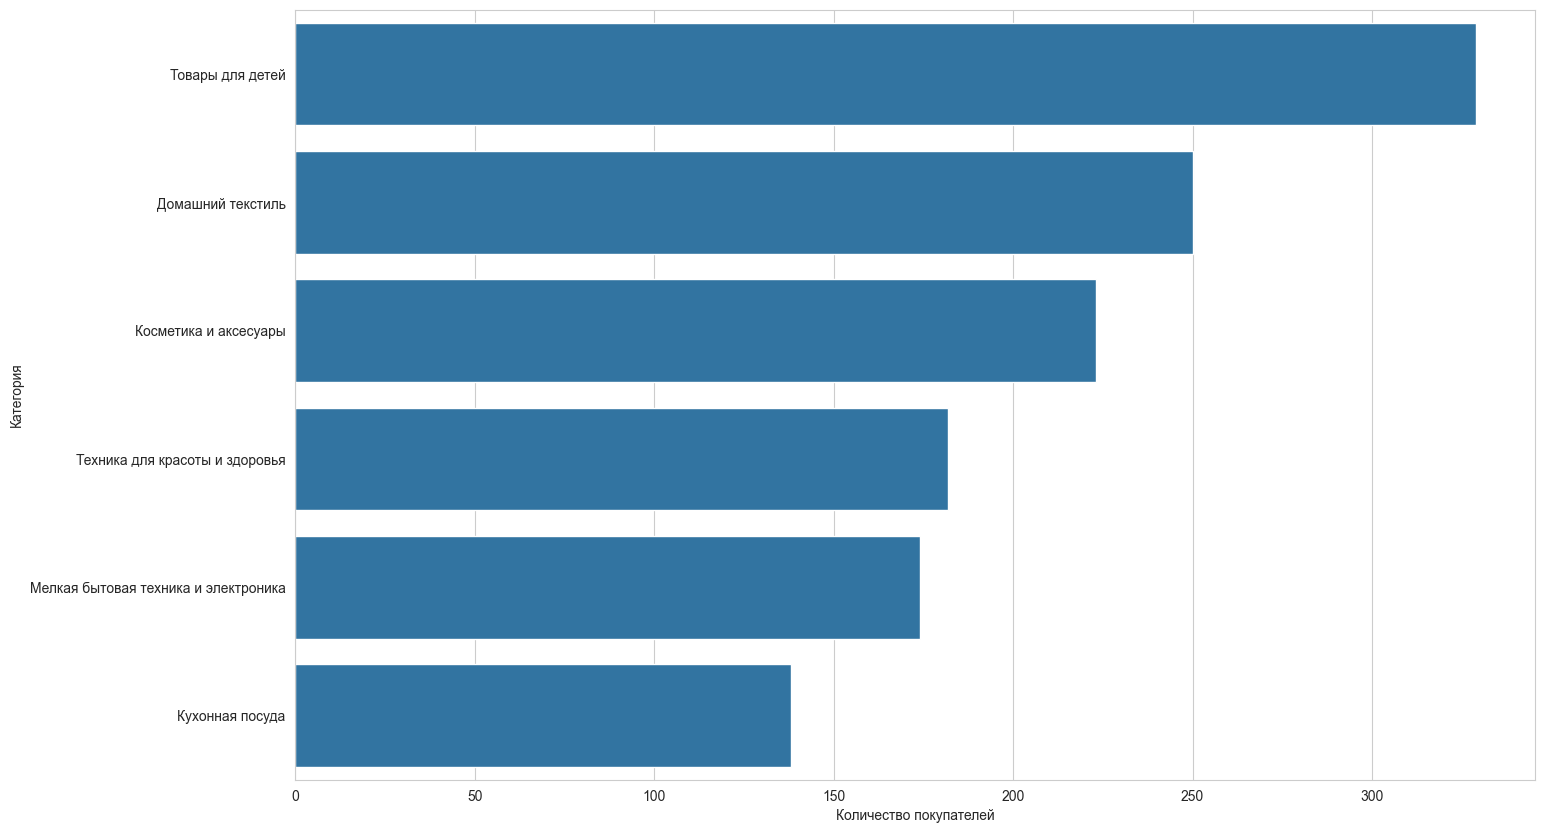

In [73]:
df_market_cat_segment = df_segment.reset_index().pivot_table(index = 'Популярная_категория', values = 'id', aggfunc = 'count').sort_values('id', ascending = False)
plt.figure(figsize = (16, 10))
sns.barplot(data = df_market_cat, y = df_market_cat.index, x = 'id')
plt.ylabel('Категория')
plt.xlabel('Количество покупателей');

Тип сервиса
стандарт    0.642857
премиум     0.357143
Name: proportion, dtype: float64

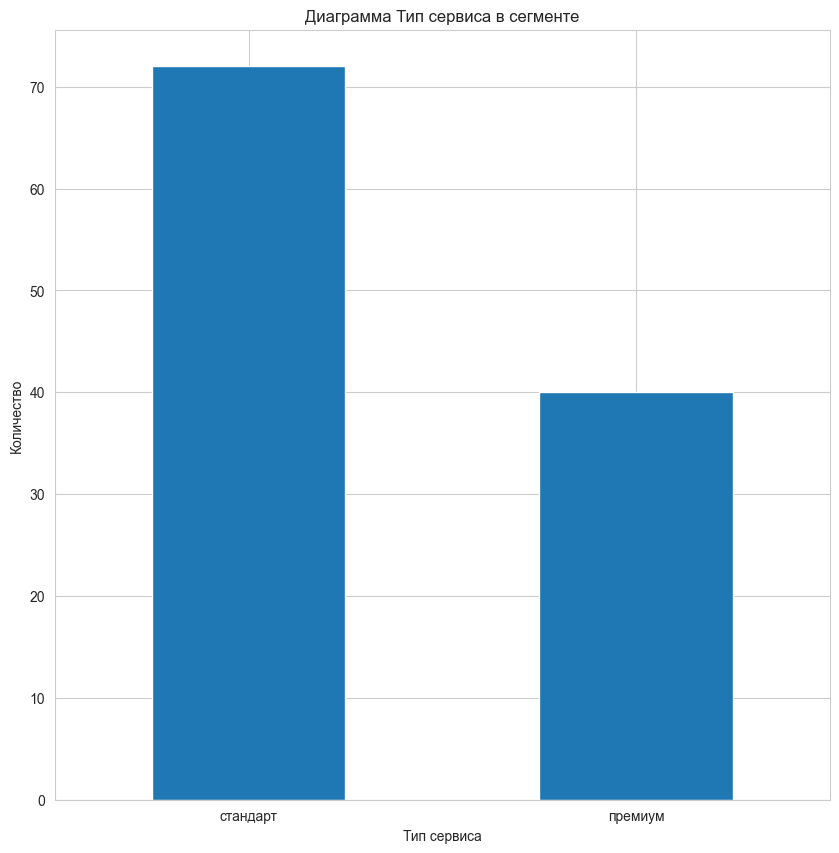

In [74]:
df_segment.value_counts('Тип сервиса').plot.bar(figsize = (10, 10), rot = 0);
plt.ylabel('Количество');
plt.title('Диаграмма Тип сервиса в сегменте');
df_segment.value_counts('Тип сервиса', normalize = True)

In [75]:

segment_list = ['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Страниц_за_визит']

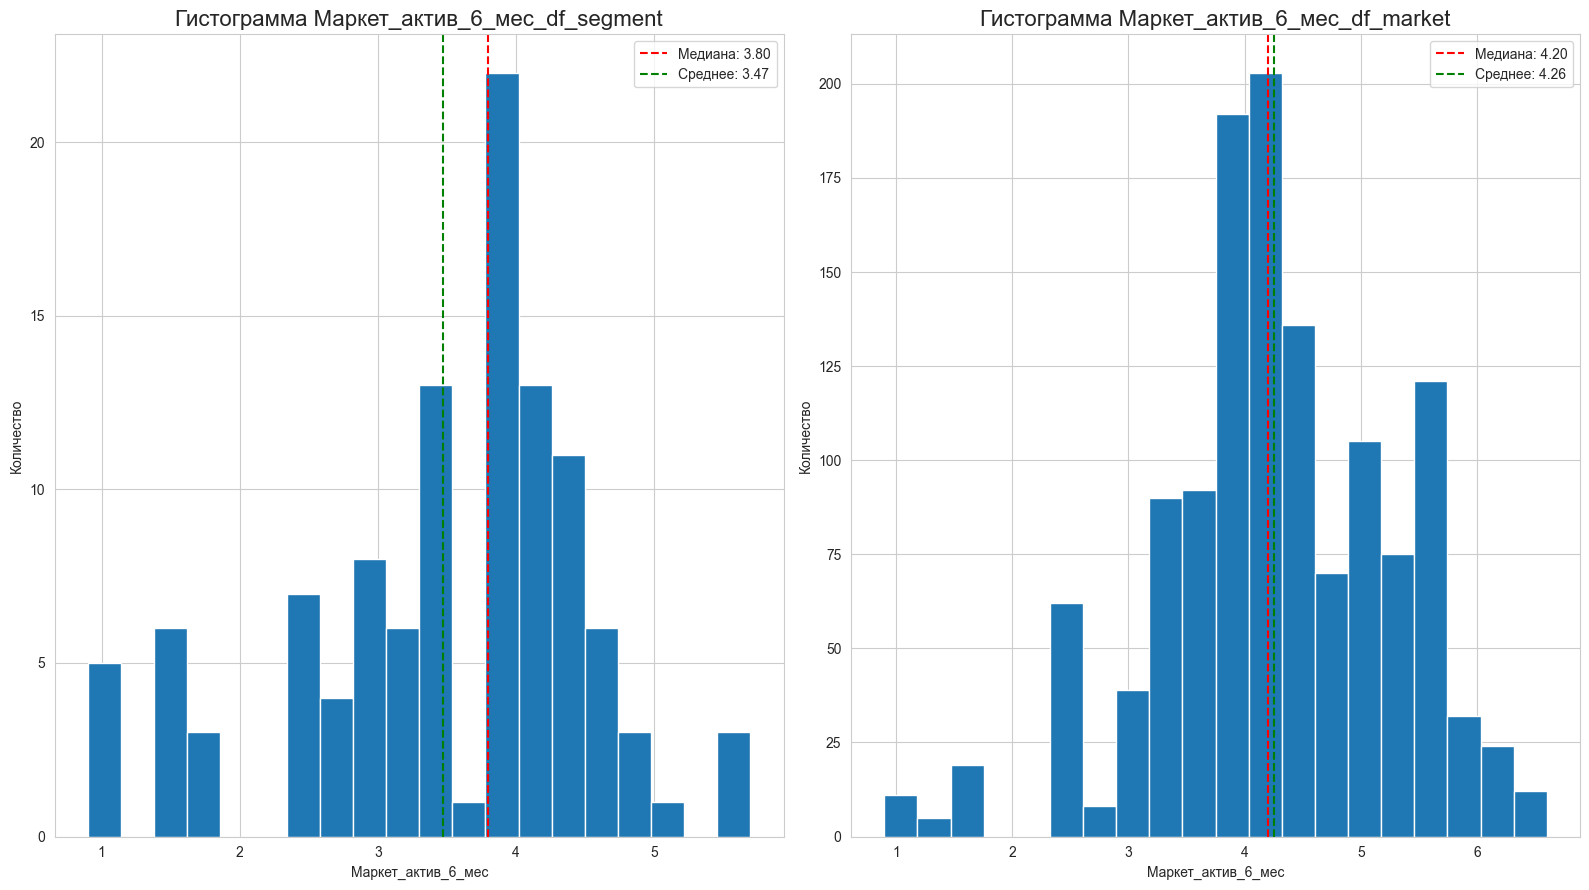

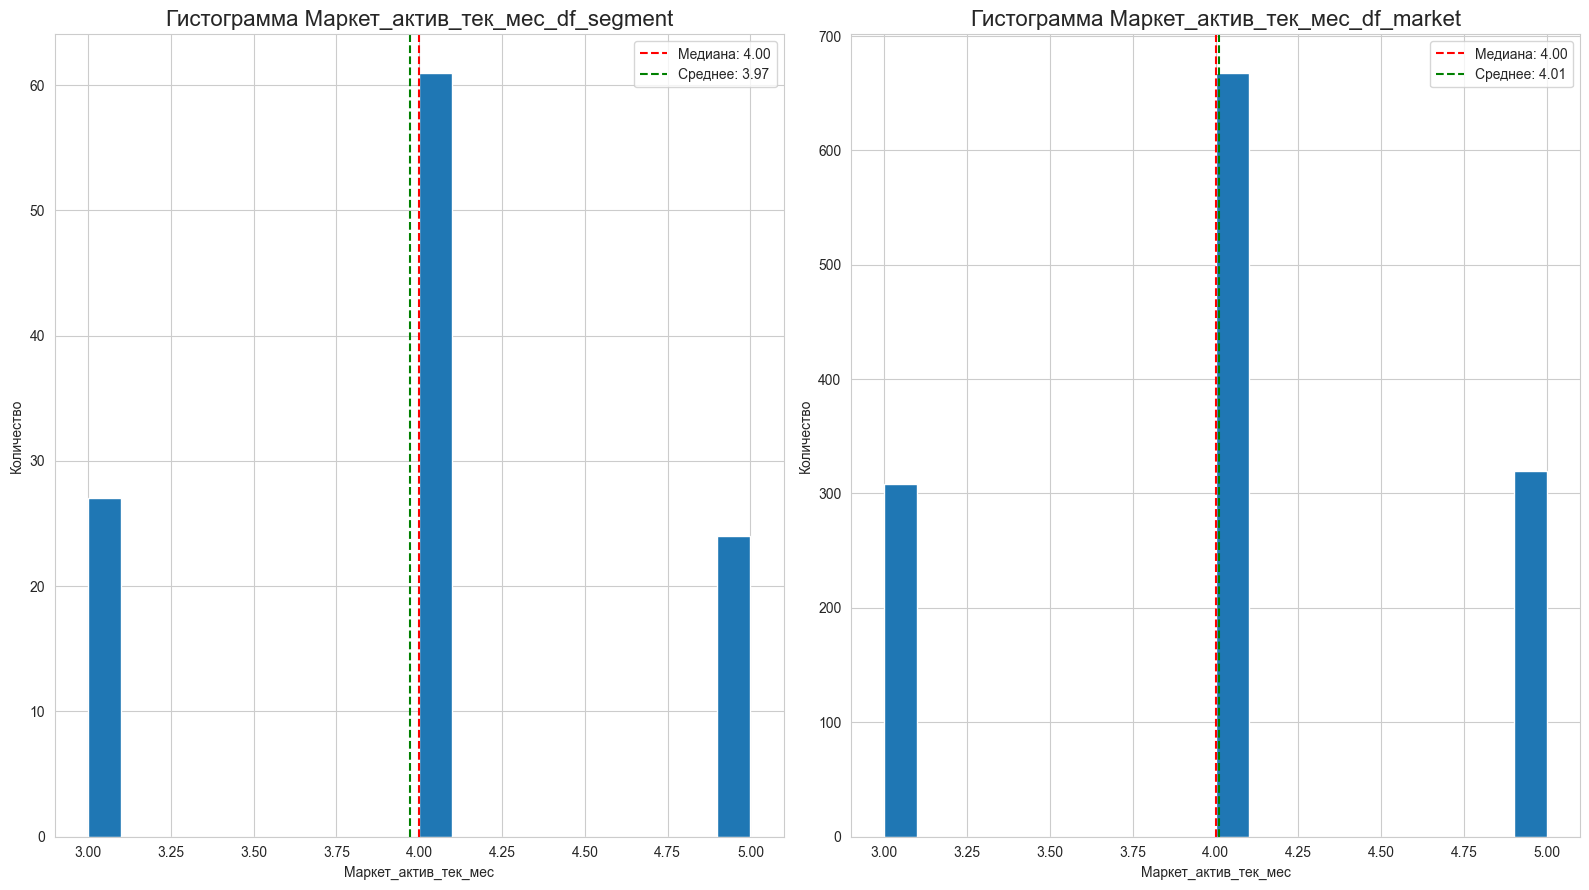

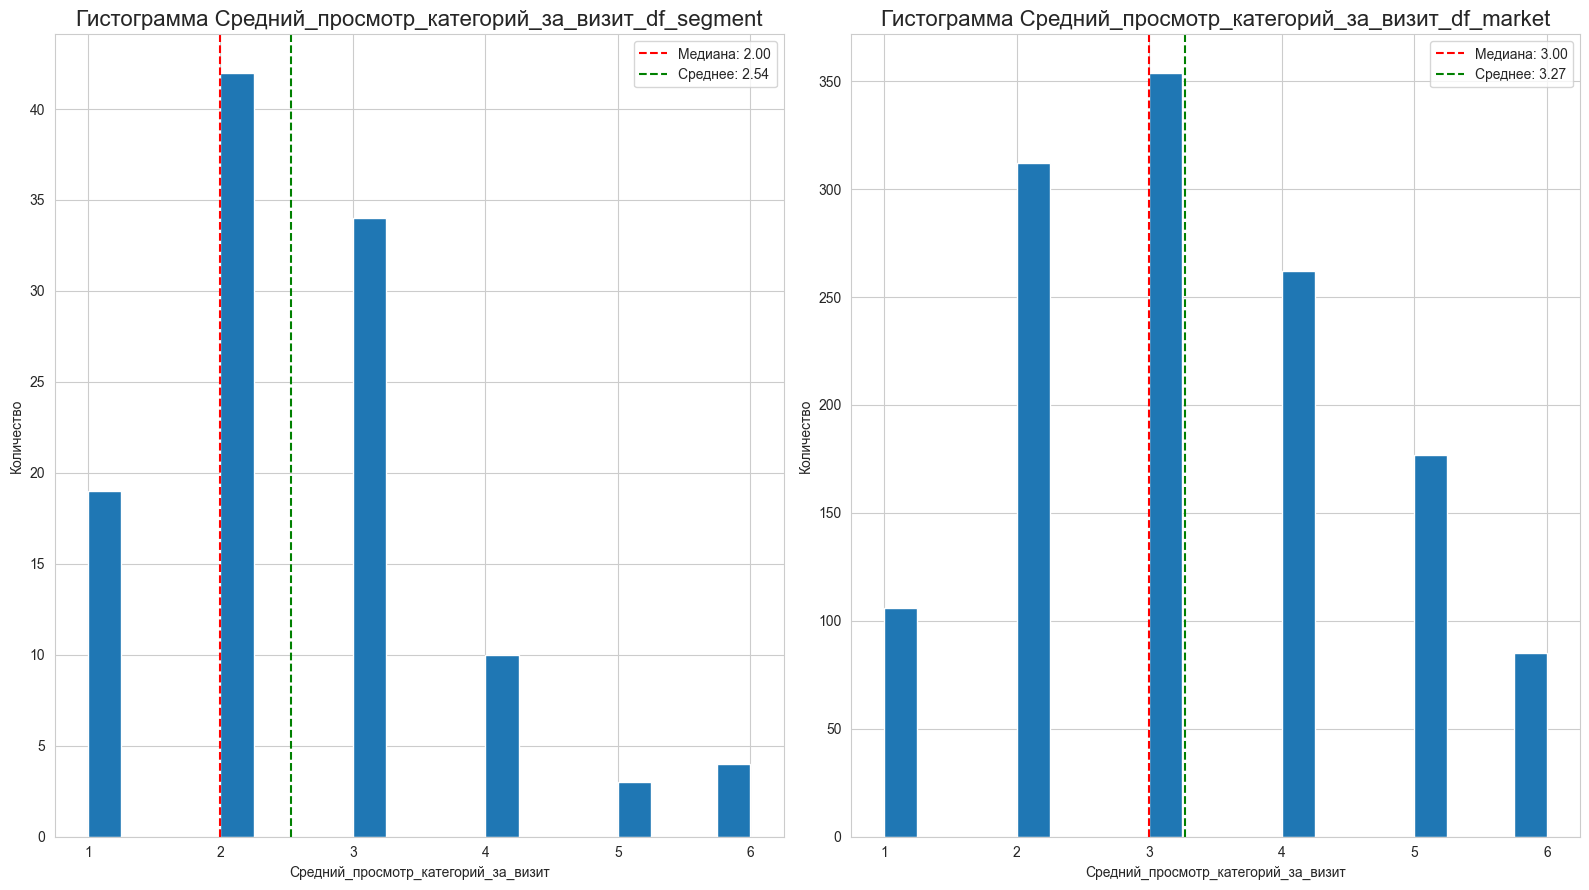

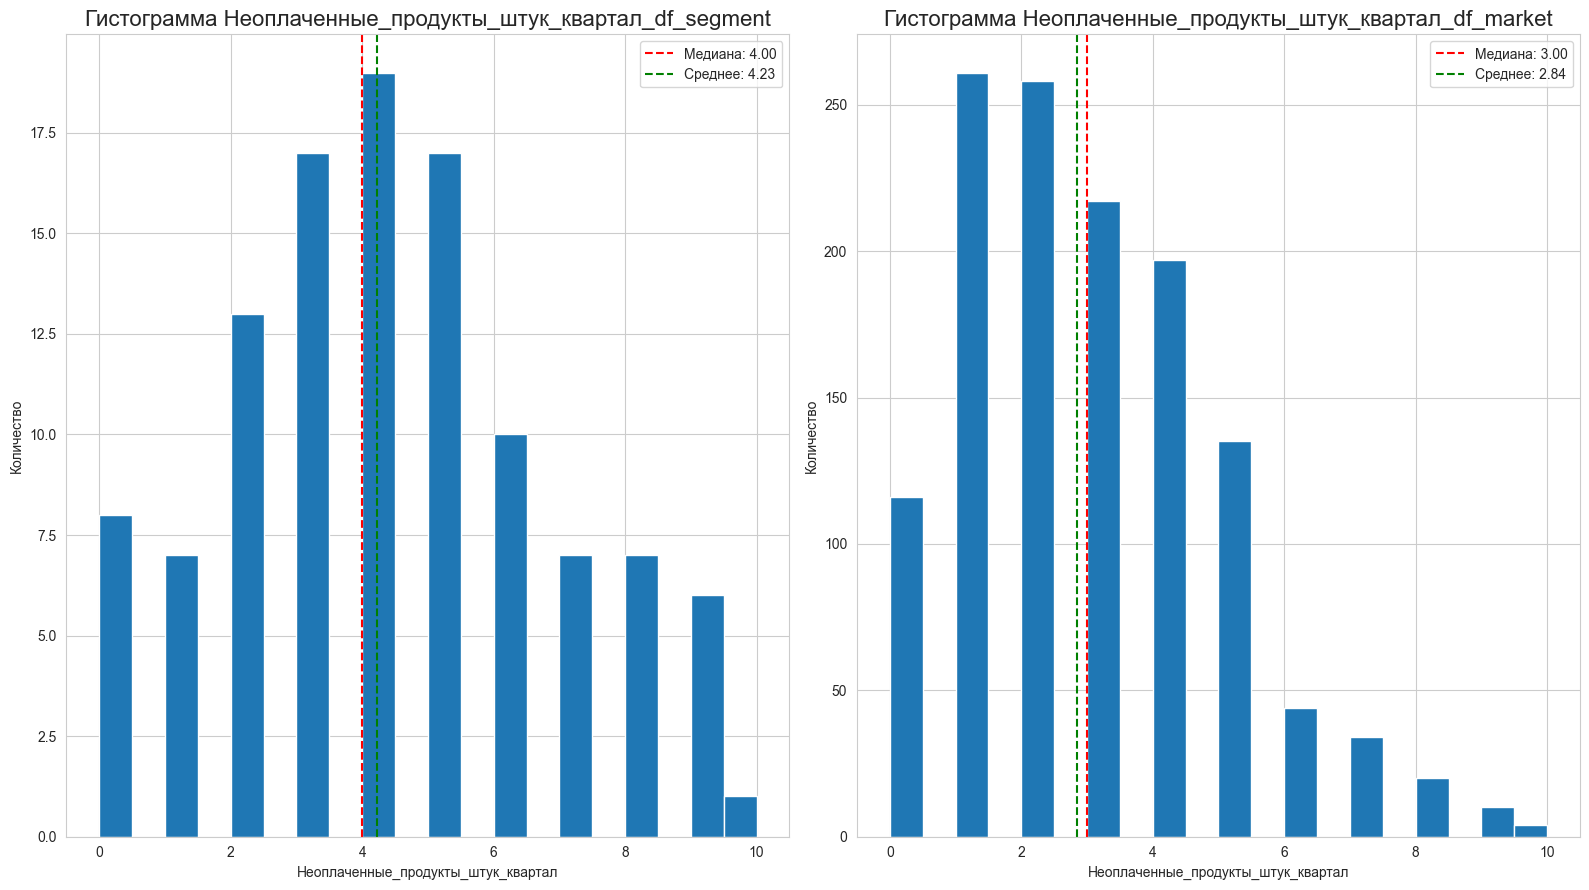

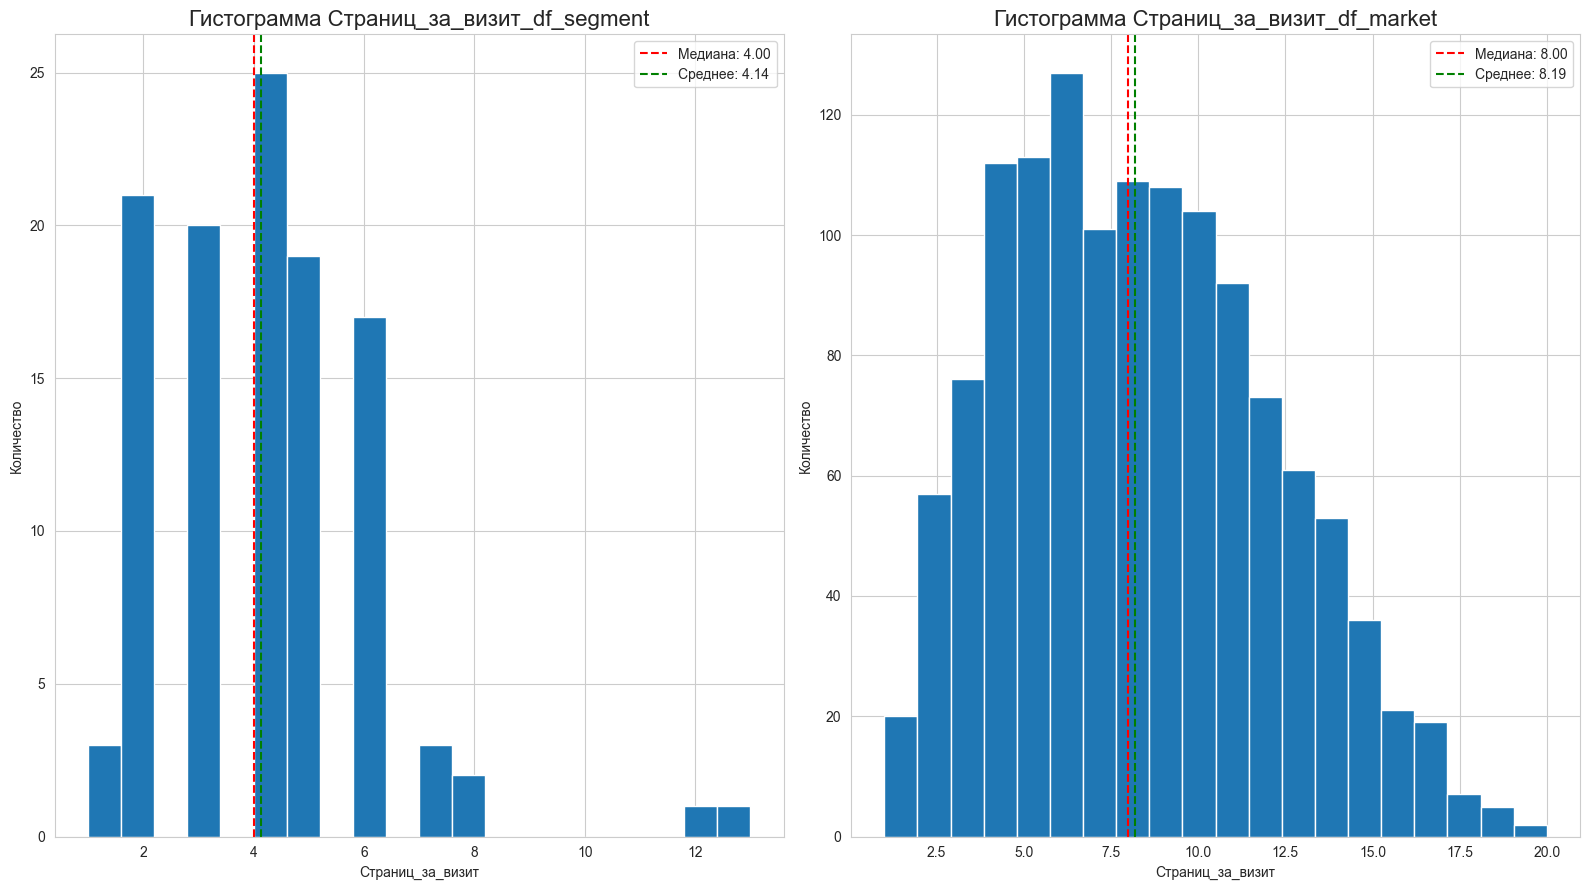

In [76]:
for column in segment_list:
    title1 = column + '_df_segment'
    title2 = column + '_df_market'
    subploted(df_segment, df_market, column, title1, title2)

In [77]:
print(f"Соотношение сегмента ко всем покупателям: {round(len(df_segment)/len(df_after_predict), 2)}") 

Соотношение сегмента ко всем покупателям: 0.09


In [78]:
print(f"Соотношение прибыли из сегмента ко всем покупателям: {sum(df_segment['Прибыль'])/sum(df_after_predict['Прибыль'])}") 
print(f"Прибыль сегмента: {sum(df_segment['Прибыль'])}")
print(f"Общая прибыль: {sum(df_after_predict['Прибыль'])}")
print(f"Количество людей из сегмента: {len(df_segment)}")
print(f"Количество людей в общем: {len(df_after_predict)}")

Соотношение прибыли из сегмента ко всем покупателям: 0.0837537782135564
Прибыль сегмента: 433.93
Общая прибыль: 5181.02
Количество людей из сегмента: 112
Количество людей в общем: 1296


**Вывод:** 
- Для исследования был выбран сегмент пользователей, у которых вероятностей снижения составляет более 0.8 и берут в основном по акции
- Исследуемый сегмент составляет 9% от общей массы

<p> </p>

- В целом говоря о анализе сегмента, он практически совподает с результами основоного анализа, но всё же есть различия
- Покупатели, просматривают в два раза меньше страниц за визит, если судить по среднему
- Покупок неоплаченных в среднем на одну меньше, чем в общем случае
- В среднем просматривают на одну категорию меньше, чем в общем 
- Маркетинговая активность у них примерно такая же, как у в среднем
- Соотношение покупателей по типу сервиса 62% и 38%

<p> </p>

**Предожение:**
- Возможно, чтобы удержать клиентов, которые покупают по акции, можно предлагать им товар, который только по акции, тогда они увеличат количество продаж и их покупательская активность останется прежняя

## Общий вывод

Основная задача проекта заключалась в том, чтобы построить модель, которая будет предсказывать снижение покупательской активности клиента по его действиям

**<p style = 'font-size: 16px'>Загрузка данных</p>**
- Было загржуено 4 файла
- market_file - основная информация о клиентах
- market_money - данные о выручки клиентов по периодам
- market_time - время проведённое на сайте по периодам
- money - информация о прибыли от клиентов


**<p style = 'font-size: 16px'>Предобработка данных</p>**
- Явных дубликатов не было обнаружено
- Были изменены названия столбцов
- Были исправлены орфографические ошибки в некоторых столбцах, чтобы соответсвовали своим категорям
- В целом с данными не было проблем

**<p style = 'font-size: 16px'>Исследовательский анализ</p>**

- Были удалены аномалии
- Были убраны клиенты, которые не соответсвовали условию активности за 3 месяца
<p></p>

- Пользователи в среднем просматривают 8 страниц за визит , чаще всего — 6 страниц . Распределение близко к нормальному, с небольшим смещением влево.
- В среднем у пользователя возникает 4 ошибки сервиса , что может влиять на удобство использования и, как следствие, на снижение активности.
- Количество неоплаченных товаров в квартале в основном составляет 1–2 штуки , при среднем значении около 3 . Распределение стремится к нормальному, с пиком в сторону меньших значений.
- Признак Акционные_покупки имеет два явных пика, что говорит о разделении пользователей на две группы: тех, кто предпочитает покупать по акциям, и тех, кому это не важно. Для модели этот признак был переведён в бинарный формат.
- Среднее количество просматриваемых категорий за визит — 3 .
- Частота взаимодействия с сайтом влияет на активность: при 1–2 разах в месяц активность чаще снижается, тогда как при 5–6 разах—остаётся стабильной. Данные по 7 посещениям ограничены выборкой.
- 74% пользователей разрешают сообщать о дополнительных предложениях.
- Самой популярной категорией является «Товары для детей» , однако именно в ней зафиксировано наибольшее снижение активности. Минимальное снижение наблюдается в категории «Мелкая бытовая техника и электроника» .

**<p style = 'font-size: 16px'> Корреляционный анализ </p>**

**Вывод по блоку:**
- Наблюдается хорошая корреляция между целевым признаком(Покупательская активность) и неколькоми колонками: 
    - Маркет_актив_6_мес
    - Акционные_покупки
    - Средний_просмотр_категорий_за_визит
    - Неоплаченные_продукты_штук_квартал
    - Страниц_за_визит
    - минут_предыдущий_месяц
    - минут_текущий_месяц 
    - предпредыдущий_месяцй_выручка
- Сильно высокой коллениарности нет
- Мультиколлинеарности  оттсуствует 

**<p style = 'font-size: 16px'>Обучение модели</p>**

- В данном этапе использовался пайплайн для модели и метод подбора гиперпараметров RandomSearchCV
- В ходе подбора была выбрана модели: `` LogisticRegression(C=8, penalty='l1', random_state=42,solver='liblinear')``
- У модели достаточно хорошие метрики:
    - f1: 0.89
    - roc_auc: 0.9


**<p style = 'font-size: 16px'> Анализ важности признаков (Shap анализ) </p>**

- Ключевые признаки:
    - num_предыдущий_месяц_выручка,
    - num_текущий_месяц_выручка,
    - num_предыдущих_6_месяцев_выручка,
    - num_минут_текущий_месяц,
    - num_минут_предыдущий_месяц.
- Положительное влияние:
- Высокие значения финансовых метрик и увеличение времени пребывания пользователя на сайте повышают вероятность сохранения его активности.
    - Отрицательное влияние:
    - Использование клиентом "стандартного" типа сервиса снижает вероятность сохранения активности.
- Маловлиятельные признаки:
    - ohe_Разрешить сообщать нет
    - num_Страниц_за_визит.
<br>Как использовать эти данные для бизнес-решений?
С помощью модели можно заранее прогнозировать снижение покупательской активности у пользователей. Это позволяет оперативно предлагать им бонусы, скидки или персонализированные предложения, чтобы не только удержать клиента, но и повысить его лояльность.


**<p style = 'font-size: 16px'> Сегментационный анализ</p>**
- Для анализа был выделен сегмент пользователей, которые:

    - часто совершают покупки по акциям,
    - имеют высокую вероятность снижения активности.

- Предложения
    - Для удержания клиентов, которые покупают по акции, возможно, стоит подобрать для них рекомендательную сисмету, которая будет предлагать товары по акции, в зависимости от их категорий, которые они больше всего просматривают


Основная задача проекта заключалась в том, чтобы построить модель, которая будет предсказывать снижение покупательской активности клиента по его действиям

**<p style = 'font-size: 16px'>Загрузка данных</p>**
- Было загржуено 4 файла
- market_file - основная информация о клиентах
- market_money - данные о выручки клиентов по периодам
- market_time - время проведённое на сайте по периодам
- money - информация о прибыли от клиентов


**<p style = 'font-size: 16px'>Предобработка данных</p>**
- Явных дубликатов не было обнаружено
- Были изменены названия столбцов
- Были исправлены орфографические ошибки в некоторых столбцах, чтобы соответсвовали своим категорям
- В целом с данными не было проблем

**<p style = 'font-size: 16px'>Исследовательский анализ</p>**

- Были удалены аномалии
- Были убраны клиенты, которые не соответсвовали условию активности за 3 месяца
<p></p>

- Пользователи в среднем просматривают 8 страниц за визит , чаще всего — 6 страниц . Распределение близко к нормальному, с небольшим смещением влево.
- В среднем у пользователя возникает 4 ошибки сервиса , что может влиять на удобство использования и, как следствие, на снижение активности.
- Количество неоплаченных товаров в квартале в основном составляет 1–2 штуки , при среднем значении около 3 . Распределение стремится к нормальному, с пиком в сторону меньших значений.
- Признак Акционные_покупки имеет два явных пика, что говорит о разделении пользователей на две группы: тех, кто предпочитает покупать по акциям, и тех, кому это не важно. Для модели этот признак был переведён в бинарный формат.
- Среднее количество просматриваемых категорий за визит — 3 .
- Частота взаимодействия с сайтом влияет на активность: при 1–2 разах в месяц активность чаще снижается, тогда как при 5–6 разах—остаётся стабильной. Данные по 7 посещениям ограничены выборкой.
- 74% пользователей разрешают сообщать о дополнительных предложениях.
- Самой популярной категорией является «Товары для детей» , однако именно в ней зафиксировано наибольшее снижение активности. Минимальное снижение наблюдается в категории «Мелкая бытовая техника и электроника» .

**<p style = 'font-size: 16px'> Корреляционный анализ </p>**

**Вывод по блоку:**
- Наблюдается хорошая корреляция между целевым признаком(Покупательская активность) и неколькоми колонками: 
    - Маркет_актив_6_мес
    - Акционные_покупки
    - Средний_просмотр_категорий_за_визит
    - Неоплаченные_продукты_штук_квартал
    - Страниц_за_визит
    - минут_предыдущий_месяц
    - минут_текущий_месяц 
    - предпредыдущий_месяцй_выручка
- Сильно высокой коллениарности нет
- Мультиколлинеарности  оттсуствует 

**<p style = 'font-size: 16px'>Обучение модели</p>**

- В данном этапе использовался пайплайн для модели и метод подбора гиперпараметров RandomSearchCV
- В ходе подбора была выбрана модели: ``RandomForestClassifier(max_depth=8, max_features=10, n_estimators=51, random_state=42)``
- У модели достаточно хорошие метрики:
    - f1: 0.91
    - roc_auc: 0.91


**<p style = 'font-size: 16px'> Анализ важности признаков (Shap анализ) </p>**

**Важные положительные признаки:**

- num_страниц_за_визит
- num_минут_предыдущий_месяц
- num_минут_текущий_месяц
- num_предыдущий_месяц_выручка
- num_маркет_актив_6_мес
- num_средний_просмотр_категорий_за_визит
- num_неоплаченные_продукты_штук_квартал
- ohe_акционные_покупки_любые_покупки
- num_длительность
- num_текущий_месяц_выручка
- num_маркет_актив_тек_мес
- ord_популярная_категория
- ohe_тип_сервиса_стандарт

**Важные негативные признаки:**

- num_ошибки_сервиса
- ohe_разрешить_сообщать_нет


**<p style = 'font-size: 16px'> Сегментационный анализ</p>**
- Для анализа был выделен сегмент пользователей, которые:

    - часто совершают покупки по акциям,
    - имеют высокую вероятность снижения активности.

- Предложения
    - Для удержания клиентов, которые покупают по акции, возможно, стоит подобрать для них рекомендательную сисмету, которая будет предлагать товары по акции, в зависимости от их категорий, которые они больше всего просматривают